# Learning a Nonlinear Operator with a Feed-Forward Neural Network

In this notebook, we use a feed-forward neural network (FFNN) to learn a nonlinear operator that maps between function spaces. The operator is defined by the integral:

$$g(y) = \int_{-1}^{1} \left( f(x)y + f(x)f'(x)\sin(\pi y^2)\cos(x) \right) dx$$


This notebook includes the following steps:
1. Generating training data using the defined operator.
2. Defining and training a feed-forward neural network to learn the operator.
3. Evaluating and plotting the results.

We use two helper scripts, `gll_discretize.jl` and `sample_operators.jl`, to handle data generation and preprocessing.

In [ ]:
include("../Scripts/utils/approx_formula.jl")
include("../Scripts/utils/create_model.jl")
include("../Scripts/data_generator.jl")
include("../Scripts/Discretizations/gll_discretize.jl")
include("../scripts/file_names.jl")
include("../Scripts/noise_generator.jl")
include("../Scripts/sample_operators.jl")
include("../Scripts/utils/plot_data.jl")
include("../Scripts/utils/unpack_params.jl")

# const fig_results_path = expanduser("~/UQ_NN/figures/Results/") # Define a path to store the results

In [ ]:
include("../Scripts/startup_NonlinOp.jl")

In [8]:
CairoMakie.activate!(type="svg")

In [9]:

set_theme!(theme_latexfonts())
CairoMakie.activate!()

# Verifying Analytic Formula

## Particular Function Perturbed by Small Noise

In [10]:
ℒ_op

ℒ_nonlin (generic function with 1 method)

In [11]:
# Generate training data of particular function
## test_func is a curve of randomly selected data points
function 𝒻ₚ(x)
  return exp.(sin.(5.0 * x))
end
nodesxₚ_gll, nodes_y_part, input_𝒻ₚ, output_𝒻ₚ = generate_data(Nx, Ny, 𝒻ₚ, ℒ_op)

𝒻ₚ_gll::Data_with_Grid{Float64} = Data_with_Grid(input_data=input_𝒻ₚ, output_data=output_𝒻ₚ, nodes=nodesxₚ_gll) # domain and codomain grid are the same size

Data_with_Grid{Float64}([2.6088885159207567, 2.6362497235774076, 2.6855200839832483, 2.7180875257514727, 2.6737282601097756, 2.4878377941777083, 2.1325750789316196, 1.6568869288219128, 1.1732881373231523, 0.7859001433297719  …  1.2724262853078392, 0.8523055575090807, 0.6035414865098999, 0.46891666787224273, 0.40195546604376775, 0.3740095861345845, 0.3679057390631778, 0.37236735110048713, 0.3793267348902719, 0.3833049951722714], [-2.562174332955322, -2.6428505229980153, -2.827316991751032, -3.0969745627794305, -3.4123161474340717, -3.707848440046156, -3.900235454886969, -3.911211786717782, -3.6965585944025037, -3.2651031535627384  …  -0.2947505842100216, -0.3123454589070276, -0.14901166033561078, 0.20007128148433148, 0.68710041266129, 1.2306868264097242, 1.7448645090362334, 2.1620303796536513, 2.4411021047563533, 2.562174332955322], [-1.0, -0.9921168443464811, -0.9736549358157365, -0.9448691702080393, -0.9060669514412698, -0.8576599952974556, -0.800161543192463, -0.7341811363090752, -0.

┌ Warning: Mixed-Precision `matmul_cpu_fallback!` detected and Octavian.jl cannot be used for this set of inputs (C [Matrix{Float64}]: A [Base.ReshapedArray{Float32, 2, SubArray{Float32, 1, Vector{Float32}, Tuple{UnitRange{Int64}}, true}, Tuple{}}] x B [Matrix{Float64}]). Falling back to generic implementation. This may be slow.
└ @ LuxLib.Impl /home/arrowmancer_labs/.julia/packages/LuxLib/EnsP3/src/impl/matmul.jl:190


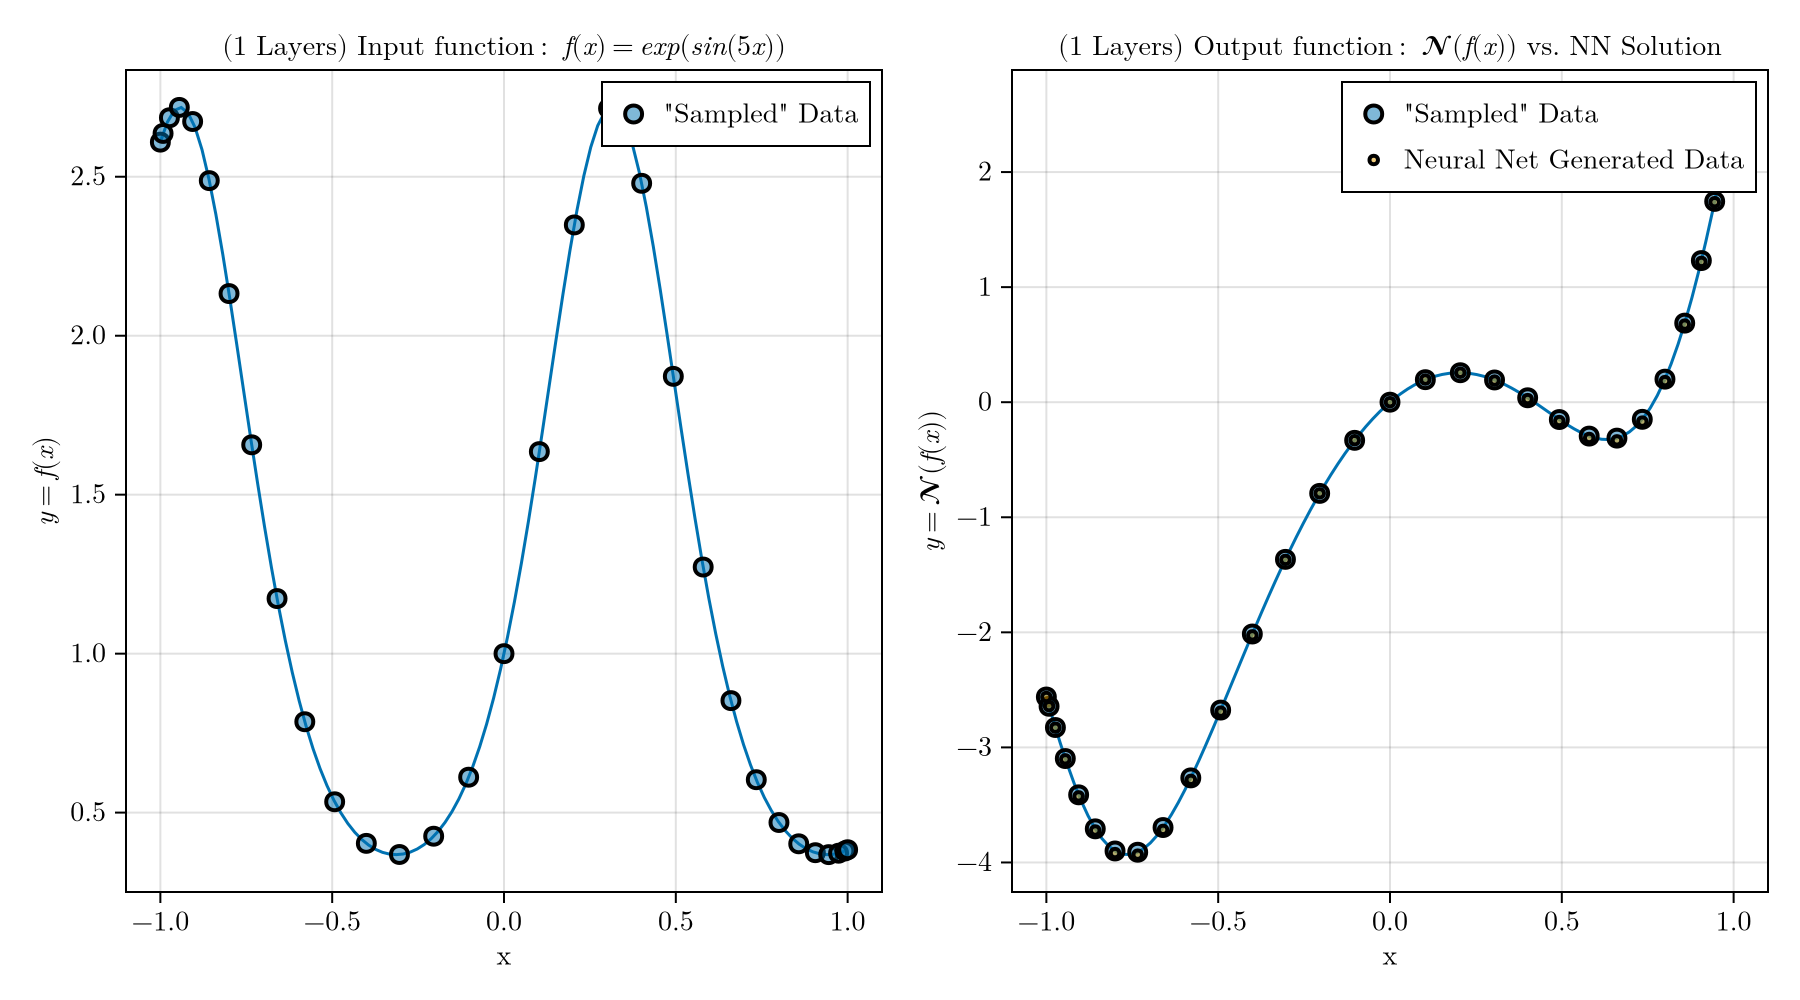

In [12]:
plot_inputoutput_curves(𝒻ₚ_gll, 𝒩ₙₙ1L, 𝚯_1L)

## Comparison of Input-Output Curves for Various Layer Sizes

### Input-Output for 2 Layers

In [ ]:
plot_inputoutput_curves(𝒻ₚ_gll, 𝒩ₙₙ2L, 𝚯_2L)

In [ ]:
𝒩ₙₙ2L(𝒻ₚ_gll.input_data)

In [ ]:
𝒩ₙₙ2L(𝒻ₚ_gll.input_data; ps=𝚯_2L::ComponentArray{<:Float32}, st=layer_states_2L) == 𝒩ₙₙ2L(𝒻ₚ_gll.input_data)

In [ ]:
selection::Int = rand(1:num_samples);
input_data::Vector = train_input_fns[:, selection]# |> cpu_device()
𝒩_of_μₚ::Vector = 𝒩ₙₙ2L(input_data)


print("Selection: ", selection)
begin

  fig = Makie.Figure()
  ax = Makie.Axis(fig[1, 1]; xlabel="x", ylabel=L"y = N(f(x))", title="Sample Curve $selection vs. Neural Net Solution, 2 Layers")

  add_interp_line(ax, train_output_fns[:, selection])
  Makie.scatter!(ax, nodes_x, train_output_fns[:, selection],
    label="\"Sampled\" Data";
    markersize=12,
    alpha=0.5,
    strokewidth=2)
  Makie.scatter!(ax, nodes_x, 𝒩_of_μₚ,
    label="Neural Net Generated Data";
    markersize=6,
    alpha=0.5,
    strokewidth=2)

  axislegend(ax)
  fig

end

### Input-Output for 3 Layers

In [ ]:
plot_inputoutput_curves(𝒻ₚ_gll, 𝒩ₙₙ3L, 𝚯_3L)

In [ ]:
selection::Int = rand(1:num_samples);
input_data::Vector = train_input_fns[:, selection]# |> cpu_device()
𝒩_of_μₚ::Vector = 𝒩ₙₙ3L(input_data)


print("Selection: ", selection)
begin

  fig = Makie.Figure()
  ax = Makie.Axis(fig[1, 1]; xlabel="x", ylabel=L"y = N(f(x))", title="Sample Curve $selection vs. Neural Net Solution, 3 Layers")

  add_interp_line(ax, train_output_fns[:, selection])
  Makie.scatter!(ax, nodes_x, train_output_fns[:, selection],
    label="\"Sampled\" Data";
    markersize=12,
    alpha=0.5,
    strokewidth=2)
  Makie.scatter!(ax, nodes_x, 𝒩_of_μₚ,
    label="Neural Net Generated Data";
    markersize=6,
    alpha=0.5,
    strokewidth=2)

  axislegend(ax)
  fig

end

In [ ]:
𝚯_7L

### Input-Output for 5 Layers

In [ ]:
plot_inputoutput_curves(𝒻ₚ_gll, 𝒩ₙₙ5L, 𝚯_5L)

### Input-Output for 7 Layers

In [ ]:
# plot_inputoutput_curves(𝒩ₙₙ5L, 𝚯_5L, layer_states_5L;
#   grid_nodes=nodesxₚ_gll,
#   input_data=input_𝒻ₚ,
#   output_data=output_𝒻ₚ)

plot_inputoutput_curves(𝒻ₚ_gll, 𝒩ₙₙ7L, 𝚯_7L)

In [ ]:
selection::Int = rand(1:num_samples);
input_data::Vector = train_input_fns[:, selection] |> cpu_device()
𝒩_of_μₚ::Vector = 𝒩ₙₙ5L(input_data)


print("Selection: ", selection)
begin

  fig = Makie.Figure()
  ax = Makie.Axis(fig[1, 1]; xlabel="x", ylabel=L"y = N(f(x))", title="Sample Curve $selection vs. Neural Net Solution, 5 Layers")

  add_interp_line(ax, train_output_fns[:, selection])
  Makie.scatter!(ax, nodes_x, train_output_fns[:, selection],
    label="\"Sampled\" Data";
    markersize=12,
    alpha=0.5,
    strokewidth=2)
  Makie.scatter!(ax, nodes_x, 𝒩_of_μₚ,
    label="Neural Net Generated Data";
    markersize=6,
    alpha=0.5,
    strokewidth=2)

  axislegend(ax)
  fig

end

In [ ]:
# plot_inputoutput_curves(𝒩ₙₙ5L, 𝚯_5L, layer_states_5L;
#   grid_nodes=nodesxₚ_gll,
#   input_data=input_𝒻ₚ,
#   output_data=output_𝒻ₚ)

plot_inputoutput_curves(𝒻ₚ_gll, 𝒩ₙₙ5L, 𝚯_5L)

In [ ]:
selection::Int = rand(1:num_samples);
input_data::Vector = train_input_fns[:, selection] |> cpu_device()
𝒩_of_μₚ::Vector = 𝒩ₙₙ7L(input_data)


print("Selection: ", selection)
begin

  fig = Makie.Figure()
  ax = Makie.Axis(fig[1, 1]; xlabel="x", ylabel=L"y = N(f(x))", title="Sample Curve $selection vs. Neural Net Solution, 7 Layers")

  add_interp_line(ax, train_output_fns[:, selection])
  Makie.scatter!(ax, nodes_x, train_output_fns[:, selection],
    label="\"Sampled\" Data";
    markersize=12,
    alpha=0.5,
    strokewidth=2)
  Makie.scatter!(ax, nodes_x, 𝒩_of_μₚ,
    label="Neural Net Generated Data";
    markersize=6,
    alpha=0.5,
    strokewidth=2)

  axislegend(ax)
  fig

end

### Input-Output for 10 Layers

In [ ]:
# plot_inputoutput_curves(𝒩ₙₙ10L, 𝚯_10L, layer_states_10L;
#   grid_nodes=nodesxₚ_gll,
#   input_data=input_𝒻ₚ,
#   output_data=output_𝒻ₚ)

plot_inputoutput_curves(𝒻ₚ_gll, 𝒩ₙₙ10L, 𝚯_10L)

In [ ]:
selection::Int = rand(1:num_samples);
input_data::Vector = train_input_fns[:, selection] |> cpu_device()
𝒩_of_μₚ::Vector = 𝒩ₙₙ10L(input_data)


print("Selection: ", selection)
begin

  fig = Makie.Figure()
  ax = Makie.Axis(fig[1, 1]; xlabel="x", ylabel=L"y = N(f(x))", title="Sample Curve $selection vs. Neural Net Solution, 10 Layers")

  add_interp_line(ax, train_output_fns[:, selection])
  Makie.scatter!(ax, nodes_x, train_output_fns[:, selection],
    label="\"Sampled\" Data";
    markersize=12,
    alpha=0.5,
    strokewidth=2)
  Makie.scatter!(ax, nodes_x, 𝒩_of_μₚ,
    label="Neural Net Generated Data";
    markersize=6,
    alpha=0.5,
    strokewidth=2)

  axislegend(ax)
  fig

end

### Input-Output for 12 Layers

In [ ]:
# plot_inputoutput_curves(𝒩ₙₙ10L, 𝚯_10L, layer_states_10L;
#   grid_nodes=nodesxₚ_gll,
#   input_data=input_𝒻ₚ,
#   output_data=output_𝒻ₚ)

plot_inputoutput_curves(𝒻ₚ_gll, 𝒩ₙₙ12L, 𝚯_12L)

In [ ]:
selection::Int = rand(1:num_samples);
input_data::Vector = train_input_fns[:, selection] |> cpu_device()
𝒩_of_μₚ::Vector = 𝒩ₙₙ12L(input_data)


print("Selection: ", selection)
begin

  fig = Makie.Figure()
  ax = Makie.Axis(fig[1, 1]; xlabel="x", ylabel=L"y = N(f(x))", title="Sample Curve $selection vs. Neural Net Solution, 12 Layers")

  add_interp_line(ax, train_output_fns[:, selection])
  Makie.scatter!(ax, nodes_x, train_output_fns[:, selection],
    label="\"Sampled\" Data";
    markersize=12,
    alpha=0.5,
    strokewidth=2)
  Makie.scatter!(ax, nodes_x, 𝒩_of_μₚ,
    label="Neural Net Generated Data";
    markersize=6,
    alpha=0.5,
    strokewidth=2)

  axislegend(ax)
  fig

end

### Input-Output for 20 Layers

In [ ]:
# plot_inputoutput_curves(𝒩ₙₙ20L, 𝚯_20L, layer_states_20L;
#   grid_nodes=nodesxₚ_gll,
#   input_data=input_𝒻ₚ,
#   output_data=output_𝒻ₚ)

plot_inputoutput_curves(𝒻ₚ_gll, 𝒩ₙₙ20L, 𝚯_20L)

In [ ]:
selection::Int = rand(1:num_samples);
input_data::Vector = train_input_fns[:, selection] |> cpu_device()
𝒩_of_μₚ::Vector = 𝒩ₙₙ20L(input_data)


print("Selection: ", selection)
begin

  fig = Makie.Figure()
  ax = Makie.Axis(fig[1, 1]; xlabel="x", ylabel=L"y = N(f(x))", title="Sample Curve $selection vs. Neural Net Solution, 20 Layers")

  add_interp_line(ax, train_output_fns[:, selection])
  scatter!(ax, nodes_x, train_output_fns[:, selection],
    label="\"Sampled\" Data";
    markersize=12,
    alpha=0.5,
    strokewidth=2)
  Makie.scatter!(ax, nodes_x, 𝒩_of_μₚ,
    label="Neural Net Generated Data";
    markersize=6,
    alpha=0.5,
    strokewidth=2)

  axislegend(ax)
  fig

end

In [ ]:
typeof(Uniform(-1.5, 1.5)) <: Uniform

## Plotting Marginals Computed Numerically

### Generating Noised Samples

In [13]:
# 5::Real = 1.5
β::Real = 1.5
μₚ::Vector = input_𝒻ₚ;
uniform_distrib::Uniform{Float64} = Uniform(-β, β);
num_nonHidden_layer::Int = 1;
num_layers::Int = length(keys(𝚯_3L)) - num_nonHidden_layer;

# selection = 14
selection = rand(1:31);
Selected𝒩ₙₙ = 𝒩ₙₙ3L;
𝒩_of_μₚ::Vector = Selected𝒩ₙₙ(μₚ);

input_noised_f_part_samples, output_noised_g_part_samples = generate_noised_samples(μₚ;
  𝒩ₙₙ=Selected𝒩ₙₙ,
  # input_data=input_𝒻ₚ,
  # output_data=output_𝒻ₚ,
  noise_pdf=uniform_distrib)

gₖ::Vector = output_noised_g_part_samples[selection, :]
mean_gk::Real = mean(gₖ)

gk_of_μ::Real = 𝒩_of_μₚ[selection];

In [ ]:

begin
  fig = Figure()
  ax = Makie.Axis(fig[1, 1];
    xlabel=L"g_{%$selection} = [\mathcal{N}(f(μ \pm \beta)]",
    ylabel=L"p(g_{%$selection})",
    title=L"\text{(%$num_layers layers) Histogram of } p(g_{%$selection})")
  hist!(ax, gₖ, normalization=:pdf, bins=100,
    label_formatter=x -> round(x, digits=2), label_size=15,
    strokewidth=0.5, strokecolor=(:black, 0.5), color=:values)
  CairoMakie.vlines!(ax, mean(gₖ), label="Mean g_k = $mean_gk", linestyle=:dash)
  # axislegend(ax)

  ax2 = Makie.Axis(fig[1, 2];
    xlabel=L"g_{%$selection} = [\mathcal{N}(f(μ \pm \beta)]",
    ylabel=L"p(g_j)",
    title=L"\text{(%$num_layers layers) KDE of } p(g_%$selection)")
  Makie.density!(gₖ)
  CairoMakie.vlines!(ax2, mean(gₖ), label="Mean g_k = $mean_gk", linestyle=:dash)
  # axislegend(ax2)
  CairoMakie.vlines!(ax2, 𝒩_of_μₚ[selection], label="Mean g_k = $gk_of_μ", linestyle=:dash)

  # legendax = Makie.Axis(fig[1, 3];
  #   xlabel="",
  #   ylabel="",
  #   title=L"\text{(%$num_layers layers) KDE of } p(g_%$selection)")
  # axislegend(legendax)

  fig
end

In [ ]:
σ_part::Vector = zeros(length(μₚ))
numericalMean_part::Vector = zeros(length(μₚ))
for k in 1:31
  gₖ::Vector = output_noised_g_part_samples[k, :]
  σ_part[k] = std(gₖ)
  numericalMean_part[k] = mean(gₖ)
end

c1 = Makie.wong_colors(0.5)[1]
c2 = Makie.wong_colors(0.5)[2]
c3 = Makie.wong_colors(0.5)[3]
c4 = Makie.wong_colors(0.5)[4]
c5 = Makie.wong_colors(0.5)[5]

selected_points = Point2f.([nodesxₚ_gll[8], nodesxₚ_gll[13], nodesxₚ_gll[17], nodesxₚ_gll[25]], [𝒩_of_μₚ[8], 𝒩_of_μₚ[13], 𝒩_of_μₚ[17], 𝒩_of_μₚ[25]])

begin

  fig = Makie.Figure(size=(1500, 1000), px_per_unit=2.5, fontsize=45)
  ax = Makie.Axis(fig[1, 1];
    limits=(-1.0, 1.1, -8, 5),
    xlabel=L"y",
    ylabel=L"g(y)")
  # title="Sample Curve f(x) = exp(sin(5x)) vs. Neural Net Solution, |β| ≤ $β, $num_layers Layers")


  Makie.band!(ax, nodesxₚ_gll, 𝒩_of_μₚ .- 3 * σ_part, 𝒩_of_μₚ .+ 3 * σ_part, label="3σ", alpha=0.6)
  Makie.band!(ax, nodesxₚ_gll, 𝒩_of_μₚ .- 2 * σ_part, 𝒩_of_μₚ .+ 2 * σ_part, label="2σ", color=:darkgoldenrod, alpha=0.8)
  Makie.band!(ax, nodesxₚ_gll, 𝒩_of_μₚ .- σ_part, 𝒩_of_μₚ .+ σ_part, label="σ", color=:indigo, alpha=0.9)

  for i in 1:length(nodesxₚ_gll)
    hist!(ax, output_noised_g_part_samples[i, :], scale_to=0.1, offset=nodesxₚ_gll[i], direction=:x)
  end
  Makie.errorbars!(nodesxₚ_gll, 𝒩_of_μₚ, σ_part, color=range(0, 1, length=length(nodesxₚ_gll)), whiskerwidth=10)

  add_interp_line(ax, output_𝒻ₚ, L"g(\mu)", 3, 1.0)

  add_interp_line(ax, output_noised_g_part_samples[:, first_samp], L"\mu + z_{%$first_samp}", 1.5, 0.8)
  add_interp_line(ax, output_noised_g_part_samples[:, second_samp], L"\mu + z_{%$second_samp}", 1.5, 0.8)
  add_interp_line(ax, output_noised_g_part_samples[:, third_samp], L"\mu + z_{%$third_samp}", 1.5, 0.8)

  Makie.scatter!(ax, nodesxₚ_gll, output_𝒻ₚ,
    label="\"Sampled\" Data";
    markersize=12,
    alpha=0.5,
    strokewidth=2)
  # Makie.scatter!(ax, nodesxₚ_gll, vec(𝒩_of_μₚ),
  #   label="Neural Net Generated Data";
  #   markersize=6,
  #   alpha=0.5,
  #   strokewidth=2)
  # axislegend(ax, position=:rb)
  Makie.scatter!(ax, selected_points,
    label="Four Samples";
    markersize=28,
    alpha=1.0,
    strokewidth=2,
    color=c2)
  fig[1, 2] = Legend(fig, ax, framevisible=false)
  fig
end

In [ ]:
input_noised_f_part_samples

In [ ]:
σ_part::Vector = zeros(length(μₚ))
numericalMean_part::Vector = zeros(length(μₚ))
for k in 1:31
  fₖ::Vector = input_noised_f_part_samples[k, :]
  σ_part[k] = std(fₖ)
  numericalMean_part[k] = mean(fₖ)
end

c1 = Makie.wong_colors(0.5)[1]
c2 = Makie.wong_colors(0.5)[2]
c3 = Makie.wong_colors(0.5)[3]
c4 = Makie.wong_colors(0.5)[4]
c5 = Makie.wong_colors(0.5)[5]

# selected_points = Point2f.([nodesxₚ_gll[8], nodesxₚ_gll[13], nodesxₚ_gll[17], nodesxₚ_gll[25]], [𝒩_of_μₚ[8], 𝒩_of_μₚ[13], 𝒩_of_μₚ[17], 𝒩_of_μₚ[25]])

begin

  fig = Makie.Figure(size=(1500, 1000), px_per_unit=2.5, fontsize=45)
  ax = Makie.Axis(fig[1, 1];
    xlabel=L"x",
    ylabel=L"f(x)")
  # title="Sample Curve f(x) = exp(sin(5x)) vs. Neural Net Solution, |β| ≤ $β, $num_layers Layers")


  Makie.band!(ax, nodesxₚ_gll, μₚ .- 3 * σ_part, μₚ .+ 3 * σ_part, label="3σ", alpha=0.6)
  Makie.band!(ax, nodesxₚ_gll, μₚ .- 2 * σ_part, μₚ .+ 2 * σ_part, label="2σ", color=:darkgoldenrod, alpha=0.8)
  Makie.band!(ax, nodesxₚ_gll, μₚ .- σ_part, μₚ .+ σ_part, label="σ", color=:indigo, alpha=0.9)
  # for i in 1:length(nodesxₚ_gll)
  #   hist!(ax, input_noised_f_part_samples[i, :], scale_to=0.1, offset=nodesxₚ_gll[i], direction=:x)
  # end
  Makie.errorbars!(nodesxₚ_gll, μₚ, σ_part,
    color=range(0, 1, length=length(nodesxₚ_gll)),
    whiskerwidth=10)
  add_interp_line(ax, input_𝒻ₚ, L"\mu", 3, 1.0)
  first_samp::Int = 7
  second_samp::Int = 130
  third_samp::Int = 51

  add_interp_line(ax, input_𝒻ₚ + input_noised_f_part_samples[:, first_samp], L"\mu + z_{%$first_samp}", 1.5, 0.8)
  add_interp_line(ax, input_𝒻ₚ + input_noised_f_part_samples[:, second_samp], L"\mu + z_{%$second_samp}", 1.5, 0.8)
  add_interp_line(ax, input_𝒻ₚ + input_noised_f_part_samples[:, third_samp], L"\mu + z_{%$third_samp}", 1.5, 0.8)
  Makie.scatter!(ax, nodesxₚ_gll, input_𝒻ₚ,
    label="\"Sampled\" Data";
    markersize=12,
    alpha=0.5,
    strokewidth=2)
  # Makie.scatter!(ax, nodesxₚ_gll, vec(𝒩_of_μₚ),
  #   label="Neural Net Generated Data";
  #   markersize=6,
  #   alpha=0.5,
  #   strokewidth=2)
  # axislegend(ax, position=:rb)
  # Makie.scatter!(ax, selected_points,
  #   label="Four Samples (in order of index)";
  #   markersize=16,
  #   alpha=1.0,
  #   strokewidth=2,
  #   color=c2)
  # axislegend(ax, position=:rb)
  fig[1, 2] = Legend(fig, ax, framevisible=false)
  fig
end

In [ ]:
typeof(:transparent)

In [ ]:
# function test_func(x)
#   return randn(length(x))
# end
# Nx = Ny = 10;
Nx = Ny = 30;
# num_samples = 10_000;
num_samples = 10_000;
# nodes_x, nodes_y, train_input_fns, train_output_fns = generate_data(Nx, Ny, test_func, test_operator, num_samples)
point_selection = rand(1:num_samples);

begin
  input_data = input_noised_f_part_samples[:, point_selection]
  # y_sol = train_output_fns[:, point_selection]
  # 𝒩_of_μₚ, _ = model_2L(input_data, Θ_2L, layer_states_2L)

  fig = Makie.Figure()
  ax = Makie.Axis(fig[1, 1];
    xlabel="x",
    ylabel=L"y = N(f(x))",
    title="Random Sample Curve $point_selection")

  add_interp_line(ax, input_data)
  Makie.scatter!(ax, nodes_x, input_data,
    label="\"Sampled\" Data";
    markersize=12,
    alpha=0.5,
    strokewidth=2)

  Makie.errorbars!(nodes_x, input_data, β * ones(31),
    color=range(0, 1, length=length(nodesxₚ_gll)),
    whiskerwidth=10)

  axislegend(ax)
  fig

end

In [ ]:
isapprox(numericalMean_part, 𝒩ₙₙ2L(μₚ), rtol=0.1)

In [ ]:
β::Real = 0.1
# β::Real = 1.5
μₚ::Vector = input_𝒻ₚLLin;
uniform_distrib::Uniform{Float64} = Uniform(-β, β);
num_nonHidden_layer::Int = 1;
num_layers::Int = length(keys(𝚯_localLin1L)) - num_nonHidden_layer;

In [ ]:
# selection = 14
selection = rand(1:31);
Selected𝒩ₙₙ = 𝒩ₙₙLLin1L;
𝒩_of_μₚ::Vector = Selected𝒩ₙₙ(μₚ);

input_noised_f_part_samples, output_noised_g_part_samples = generate_noised_samples(μₚ;
  𝒩ₙₙ=Selected𝒩ₙₙ,
  # input_data=input_𝒻ₚ,
  # output_data=output_𝒻ₚ,
  noise_pdf=uniform_distrib)

gₖ::Vector = output_noised_g_part_samples[selection, :]
mean_gk::Real = mean(gₖ)

gk_of_μ::Real = 𝒩_of_μₚ[selection];
begin
  fig = Figure()
  ax = Makie.Axis(fig[1, 1];
    xlabel=L"g_{%$selection} = [\mathcal{N}(f(μ \pm \beta)]",
    ylabel=L"p(g_{%$selection})",
    title=L"\text{(%$num_layers layers) Histogram of } p(g_{%$selection})")
  hist!(ax, gₖ, normalization=:pdf, bins=100,
    label_formatter=x -> round(x, digits=2), label_size=15,
    strokewidth=0.5, strokecolor=(:black, 0.5), color=:values)
  CairoMakie.vlines!(ax, mean(gₖ), label="Mean g_k = $mean_gk", linestyle=:dash)
  # axislegend(ax)

  ax2 = Makie.Axis(fig[1, 2];
    xlabel=L"g_{%$selection} = [\mathcal{N}(f(μ \pm \beta)]",
    ylabel=L"p(g_j)",
    title=L"\text{(%$num_layers layers) KDE of } p(g_%$selection)")
  Makie.density!(gₖ)
  CairoMakie.vlines!(ax2, mean(gₖ), label="Mean g_k = $mean_gk", linestyle=:dash)
  # axislegend(ax2)
  CairoMakie.vlines!(ax2, 𝒩_of_μₚ[selection], label="Mean g_k = $gk_of_μ", linestyle=:dash)

  # legendax = Makie.Axis(fig[1, 3];
  #   xlabel="",
  #   ylabel="",
  #   title=L"\text{(%$num_layers layers) KDE of } p(g_%$selection)")
  # axislegend(legendax)

  fig
end

In [ ]:
σ_part::Vector = zeros(length(input_data))
numericalMean_part::Vector = zeros(length(input_data))
for k in 1:31
  gₖ::Vector = output_noised_g_part_samples[k, :]
  σ_part[k] = std(gₖ)
  numericalMean_part[k] = mean(gₖ)
end

c1 = Makie.wong_colors(0.5)[1]
c2 = Makie.wong_colors(0.5)[2]
c3 = Makie.wong_colors(0.5)[3]
c4 = Makie.wong_colors(0.5)[4]
c5 = Makie.wong_colors(0.5)[5]

selected_points = Point2f.([nodesxₚ_gllLLin[8], nodesxₚ_gllLLin[13], nodesxₚ_gllLLin[17], nodesxₚ_gllLLin[25]], [𝒩_of_μₚ[8], 𝒩_of_μₚ[13], 𝒩_of_μₚ[17], 𝒩_of_μₚ[25]])

begin

  fig = Makie.Figure(px_per_unit=2.5, fontsize=12)
  ax = Makie.Axis(fig[1, 1];
    xlabel=L"y",
    ylabel=L"g(y) = N(f(x))",
    title="Sample Curve f(x) = exp(sin(5x)) vs. Neural Net Solution, |β| ≤ $β, $num_layers Layers")


  Makie.band!(ax, nodesxₚ_gllLLin, 𝒩_of_μₚ .- 3 * σ_part, 𝒩_of_μₚ .+ 3 * σ_part, label="3σ", alpha=0.6)
  Makie.band!(ax, nodesxₚ_gllLLin, 𝒩_of_μₚ .- 2 * σ_part, 𝒩_of_μₚ .+ 2 * σ_part, label="2σ", color=:darkgoldenrod, alpha=0.8)
  Makie.band!(ax, nodesxₚ_gllLLin, 𝒩_of_μₚ .- σ_part, 𝒩_of_μₚ .+ σ_part, label="σ", color=:indigo, alpha=0.9)
  for i in 1:length(nodesxₚ_gllLLin)
    hist!(ax, output_noised_g_part_samples[i, :], scale_to=0.1, offset=nodesxₚ_gllLLin[i], direction=:x)
  end
  Makie.errorbars!(nodesxₚ_gllLLin, 𝒩_of_μₚ, σ_part,
    color=range(0, 1, length=length(nodesxₚ_gllLLin)),
    whiskerwidth=10)
  add_interp_line(ax, output_𝒻ₚLLin)
  Makie.scatter!(ax, nodesxₚ_gllLLin, output_𝒻ₚLLin,
    label="\"Sampled\" Data";
    markersize=12,
    alpha=0.5,
    strokewidth=2)
  # Makie.scatter!(ax, nodesxₚ_gll, vec(𝒩_of_μₚ),
  #   label="Neural Net Generated Data";
  #   markersize=6,
  #   alpha=0.5,
  #   strokewidth=2)
  # axislegend(ax, position=:rb)
  Makie.scatter!(ax, selected_points,
    label="Four Samples (in order of index)";
    markersize=16,
    alpha=1.0,
    strokewidth=2,
    color=c2)
  axislegend(ax, position=:rb)
  fig
end

In [ ]:
[3:20] isa Vector{UnitRange{Int64}}

In [ ]:
plot_inputoutput_curves(𝒻ₚ_gllLLin, 𝒩ₙₙLLin1L, 𝚯_localLin1L)

In [ ]:
DataFrame("𝒩ₙₙ2L(μₚ)" => 𝒩ₙₙ2L(μₚ),
  "𝔼{g(μₚ)} = 𝔼{𝒩∘f(μₚ)}" => numericalMean_part,
  "Error" => abs.(𝒩ₙₙ2L(μₚ) .- numericalMean_part))

# Face Splitting product:

In [14]:
function ⊡(A::AbstractArray, B::AbstractArray)
  m = size(A, 1)
  nA = size(A, 2)
  nB = size(B, 2)

  # Preallocate the result matrix.
  result = Array{eltype(kron(A[1, :], B[1, :]))}(undef, m, nA * nB)

  # Compute the row-wise (face-splitting) product.
  for i in 1:m
    result[i, :] = kron(A[i, :], B[i, :])
  end

  return result
end


⊡ (generic function with 1 method)

### Testing Linear Term in Analytical Expression with Autodiff Results:

In [15]:
oftf(x, y) = oftype(float(x), y)
heaviside(x)::Float64 = x >= 0 ? 1.0 : 0.0
α_lrelu::Float64 = 0.01
ϕꜝ(x; a=oftf(x, α_lrelu)) = heaviside(x) - a * (1.0 - heaviside(x))

ϕꜝ (generic function with 1 method)

In [22]:
∂𝐳F₁ₗ(input_𝒻ₚ)

64×31 Matrix{Float64}:
  0.0131332     0.000550628  -0.00666092   …   0.000732569  -0.0221413
 -0.000468414   0.00190912   -0.00248478      -0.000666662  -0.0258379
 -0.000124663   0.000189579  -0.000193335     -0.00161589   -0.000310557
  0.000764932   0.00288957    0.000786915     -0.000174255  -8.81144e-5
 -0.39338      -0.0819604    -0.0289733        0.153607     -0.0100177
 -0.0115446    -0.00133968    0.00181429   …   0.00413887   -0.000778429
  0.000764106  -0.00388571    0.00496363       0.00108413   -0.0122087
 -0.0289887     0.000460119  -0.000520399     -0.00189717    0.00013864
  0.0488654     0.166214      0.209747        -0.00151006    0.00297712
 -0.00102642    0.00185466   -0.00314734       0.000101999  -6.25615e-5
  ⋮                                        ⋱                 ⋮
 -0.0274048     0.000412393  -0.000554096  …  -0.00178339    0.000169827
 -0.0605842     0.190206     -0.246077        -0.0635863    -2.58486
  0.0665374     0.417803      0.314623        -0.01809

In [23]:
⊡(ϕꜝ.(𝐖_1L[1] * input_𝒻ₚ + 𝐛_1L[1]), 𝐖_1L[1])

64×31 Matrix{Float64}:
 -0.0131332    -0.000550628   0.00666092   …  -0.000732569   0.0221413
  0.000468414  -0.00190912    0.00248478       0.000666662   0.0258379
  0.000124663  -0.000189579   0.000193335      0.00161589    0.000310557
 -0.000764932  -0.00288957   -0.000786915      0.000174255   8.81144e-5
 -0.39338      -0.0819604    -0.0289733        0.153607     -0.0100177
  0.0115446     0.00133968   -0.00181429   …  -0.00413887    0.000778429
 -0.000764106   0.00388571   -0.00496363      -0.00108413    0.0122087
  0.0289887    -0.000460119   0.000520399      0.00189717   -0.00013864
  0.0488654     0.166214      0.209747        -0.00151006    0.00297712
  0.00102642   -0.00185466    0.00314734      -0.000101999   6.25615e-5
  ⋮                                        ⋱                 ⋮
  0.0274048    -0.000412393   0.000554096  …   0.00178339   -0.000169827
 -0.0605842     0.190206     -0.246077        -0.0635863    -2.58486
  0.0665374     0.417803      0.314623        -0.01809

In [24]:
∂𝐳F₂ₗ(input_𝒻ₚ)

64×31 Matrix{Float64}:
 -3.30483e-5    2.25302e-5   -0.000115012  …  -4.43599e-5   -0.00040216
  0.00359669   -0.0399836     0.188164         0.0244741    -0.0830453
  5.0713        0.0515791    -0.0823493       -0.11693      -0.00894894
  4.61827       0.0161254    -0.039564        -0.00907689    0.00105101
  0.000405028   0.000740528  -0.000741433      0.000106682   0.0178156
  0.000220347   0.0021715     0.00939598   …   0.000110076  -0.000924968
 -0.0198044     0.0696691    -0.0763081       -0.147261      0.137418
 -0.000252024  -0.00118555    0.00146558      -7.63615e-5   -0.0338661
  0.0135661     0.0753135     0.134083         0.0750308     0.0100447
 -0.0152153     0.00720541   -0.0267534        0.704861      0.12925
  ⋮                                        ⋱                 ⋮
  8.00321e-5    6.32301e-5   -8.71247e-5   …   8.32506e-5   -0.000586025
 -0.0165683     0.0529571    -0.0543593       -0.114188      0.12622
  0.000319003  -5.45221e-6    0.000179958     -0.000149602  

In [25]:
⊡(ϕꜝ.(𝐖_2L[2] * ϕ.(𝐖_2L[1] * input_𝒻ₚ + 𝐛_2L[1]) + 𝐛_2L[2]), 𝐖_2L[2]) * ⊡(ϕꜝ.(𝐖_2L[1] * input_𝒻ₚ + 𝐛_2L[1]), 𝐖_2L[1])

64×31 Matrix{Float64}:
  3.30132e-5   -3.02436e-5    0.000123343  …   4.95455e-5    0.000370798
  0.0029988    -0.0397744     0.187918         0.0241393    -0.0836523
  4.98719       0.0491365    -0.0786843       -0.108978     -0.0124232
  4.68626       0.0166359    -0.0402869       -0.00957047    0.000452981
 -0.000411848  -0.000755421   0.000755154     -0.000107519  -0.0181486
 -0.000220919  -0.00217158   -0.00939829   …  -0.000106233   0.000936198
 -0.0203568     0.0696972    -0.0760386       -0.147523      0.134177
  0.0002367     0.00117129   -0.00145505       7.4686e-5     0.0334822
  0.0113169     0.0614788     0.109273         0.0611564     0.00794886
 -0.0154383     0.00743466   -0.026815         0.704696      0.129121
  ⋮                                        ⋱                 ⋮
 -9.06036e-5   -6.20538e-5    7.67787e-5   …  -7.95472e-5    0.000499911
 -0.017445      0.0530409    -0.0542027       -0.114375      0.124486
 -0.000331426  -2.92623e-5   -9.21416e-5       0.0001427

# This is the definition of leakyrelu activation function from the NNLib library that is used:

```julia
leakyrelu(x, a=oftf(x, leakyrelu_a)) = ifelse(x>0, float(x), oftf(x, a*x))  # max(a*x, x) is 3x slower

const leakyrelu_a = 0.01  # also used in gradient below
```


In [ ]:
# of type float (to allow for integer inputs)
oftf(x, y) = oftype(float(x), y)
const leakyrelu_a::Float64 = 0.01  # also used in gradient below
leakyrelu_deriv(x, a=oftf(x, leakyrelu_a)) = ifelse(x > 0, 1.0, oftf(1.0, a))  # max(a*x, x) is 3x slower
# """
# heaviside function definition inspired from:  https://mth229.github.io/functions.html
# """
# This is wrong:
# heaviside(x) =  x > 0 ? 1.0 :
#                 x == 0.0 ? 0.0 :
#                 -1.0
# rectangular(x, radius=1.0) = heaviside.(x .+ radius) - heaviside.(x .- radius)

### Now defining:
$\omega(g_j) = g_j - \bm{\alpha}_j'\bm{\phi}(\bm{W}_0\bm{\mu} + \bm{b}_0)$

$\bm{\phi}'(\bm{W}_0 \mu + \bm{b}_0) = \bm{\phi}'(\bm{W}_0 \mu + \bm{b}_0) $

$\bm{J} := \bm{\phi}'(\bm{W}_0 \mu + \bm{b}_0)\boxdot\bm{W}_0$

$\bm{\gamma} = \bm{\alpha}_j' \bm{J}$

or $\bm{J}_{\bm{z}}(\bm{F}_0(\bm{f}(\bm{0})))\bm{z}$,

where recall $\bm{F}_0(\bm{f}(\bm{0})) := \bm{\phi}(\bm{W}_0 \bm{f}(\bm{0}) + \bm{b}_0)$

$\bm{\ell} = \beta\bm{\gamma}$

Where e.g. for the activation function we are using - Leaky ReLU - is defined to be:

$$
\phi(x) = \begin{cases}
  x & x > 0, \\
  0.01x & \text{otherwise}.
\end{cases}
$$
and its derivative:
$$
\phi'(x) = \begin{cases}
  1 & x > 0, \\
  0.01 & \text{otherwise}.
\end{cases}
$$

In [ ]:
test_xAxis::LinRange = LinRange(-2.0, 2.0, 100)

lines(test_xAxis, heaviside.(test_xAxis))

In [ ]:
# F₁1L(𝐯)::Vector = ϕ.(W_01L * 𝐯 + b_01L)
# ∂zF0_1L(𝛍)::Matrix = Zygote.jacobian(𝛍 -> F₁1L(𝛍), 𝛍)[1]

selection = rand(1:31);

#===
Recall the parameters we have:
W_0 = Θ[:layer_1][:weight]  - First layer weight parameters
𝐛_0 = Θ[:layer_1][:bias]    - First layer bias parameters
A = Θ[:layer_2][:weight]    - Matrix of Output Weights
===#
# selection = 6
g_analyt::Real = 𝒩_of_μₚ[selection]
αⱼ::Vector = A1L[selection, :]

Π(x; radius=1.0)::Vector = heaviside.(x .+ radius) - heaviside.(x .- radius)
ω(gⱼ)::Real = gⱼ .- dot(αⱼ, ϕ.(W_01L * μₚ + b_01L))
# ∂ϕ = leakyrelu_deriv.(W_01L * μₚ + b_01L)
# J::Matrix = zeros(size(W_0))
J::Matrix = ∂zF0_1L(μₚ)
# for k in 1:(Nx+1)
#   wₖ = W_0[:, k]
#   J[:, k] = ∂ϕ .* wₖ
# end
Q::Matrix = A1L * J
gₖ::Vector = output_noised_g_part_samples[selection, :]
mean_gk::Real = mean(gₖ)

γ::Vector = vec(αⱼ' * J)
ℓ::Vector = β * γ

# Testing Moment Formulas

In [ ]:
# output_vec(v)::Vector = A1L * ϕ.(W_01L * v + b_01L)
output_vec(v)::Vector = A1L * F₁1L(v)
ρ_out::Vector = output_vec(vec(μₚ))

### Testing mean formula:

$\mathbb{E}\{g_j\} = \phi(\bm{w}'_j \bm{\mu} + \bm{b_0}) + \underbrace{\bm{q_j'}}_{\bm{\alpha_j'}\bm{J}}\cdot\bm{\mu}$

In [ ]:
𝔼gₖ::Real = ϕ(dot(W_01L[selection, :], μₚ) + b_01L[selection]) + dot(γ, μₚ)
# σ.(W_0 * μₚ + b_0)
# 𝔼gₖ = dot(A1L[selection, :], ϕ.(W_01L * μₚ + b_01L))

In [ ]:
mean_gk

In [ ]:
isapprox(mean_gk, 𝔼gₖ; rtol=1.0)

In [ ]:
q_J::Matrix = Q[selection, :]

### Product Formula:

$$\begin{aligned} \mathbb{E}\{g_i g_j\} &= \rho_i \rho_j + (\rho_i\bm{q'}_j + \rho_j\bm{q'}_i)\cdot\mathbb{E}\{z\} + \mathbb{E}\{[\bm{q'}_i\cdot\bm{z}][\bm{q'}_j\cdot\bm{z}] \} \\
&= \rho_i \rho_j + \frac{1}{3}\bm{q}_{i}\cdot\bm{q}_{j} \end{aligned}$$

### Testing variance: 

<!-- $\mathbb{E}\{g_j\} = \phi(\bm{w}'_j \bm{\mu} + \bm{b_0}) + \underbrace{\bm{q_j'}}_{\bm{\alpha_j'}\bm{J}}\cdot\bm{\mu}$ -->

<!-- $\langle g_j^2 \rangle_c &= \expt{g_j^2} - \expt{g_j}^2$ -->


$\langle g_j^2 \rangle_c = \mathbb{E}\{g_j^2\} - \mathbb{E}\{g_j\}^2$

In [ ]:
mean_from_formula(outputᵢ::Int)::Real = dot(A1L[outputᵢ, :], ϕ.(W_01L * μₚ + b_01L))

In [ ]:
mean_prod(outputᵢ::Int, outputⱼ::Int)::Real = ρ_out[outputᵢ] * ρ_out[outputⱼ] + ((β^2) / 3.0) * dot(Q[outputᵢ, :], Q[outputⱼ, :])

In [ ]:
# var_from_formula(outputᵢ::Int, outputⱼ::Int)::Real = ρ_out[outputᵢ] * ρ_out[outputⱼ] + ((β^2) / 3.0) * dot(Q[outputᵢ, :], Q[outputⱼ, :]) - 𝔼gₖ^2

var_from_formula(outputᵢ::Int)::Real = mean_prod(outputᵢ, outputᵢ) - mean_from_formula(outputᵢ)^2

In [ ]:
Cov_formula(outputᵢ::Int, outputⱼ::Int)::Real = mean_prod(outputᵢ, outputⱼ) - mean_from_formula(outputᵢ) * mean_from_formula(outputⱼ)

In [ ]:
mean_from_formula(selection)^2

In [ ]:
var_from_formula(selection)

In [ ]:
var_numerical = var(gₖ)

In [ ]:
σ_part[selection]^2

In [ ]:
Cov_formula(1, 1)

In [ ]:
isapprox(var_from_formula(selection), var_numerical; rtol=0.01)

In [ ]:
Cov_formula(selection, selection) == var_from_formula(selection)

In [ ]:
selectᵢ = selection - 1;
selectⱼ = selection + 1;

cov_from_formula = Cov_formula(selection - 1, selection + 1)

In [ ]:
gᵢ = output_noised_g_part_samples[selection-1, :]
gⱼ = output_noised_g_part_samples[selection+1, :]

cov_numerical = cov(gᵢ, gⱼ)

In [ ]:
isapprox(cov_numerical, cov_from_formula; rtol=0.01)

### Let's try fourier transform of product of sinc functions instead.

In [ ]:
# Define the sinc function (normalized by π)
sinc_func(x, γ) = sin(γ * x) / (γ * x)

In [ ]:
# N = 1000  # Assume some number of points
# x = LinRange(-100000, 100000, N)
# dx = (x[end] - x[1]) / (N - 1)

In [ ]:
length(x)

In [ ]:
# N = length(gₖ)
N = 1000
L = N
x = range(-L, L, length=N) #.+ dot(αⱼ, ϕ.(W_0 * μₚ + b_0))
# Define the sinc function (normalized by π)
sinc_func(x, γ) = sin(γ * x) / (γ * x)

test_sinc_func = sinc_func.(x, ℓ[1]);
# test_sinc_func = sinc_func.(x, (1.0 / π) * ℓ[1]);
# sinc_values_formula = ((1.0 / π) * (1 / 2 * β))*sinc_func.(a_j_range, ℓ[1]);
# amount = Nx+1
amount = Nx + 1
for k in 2:(amount)
  sinc_values_k = sinc_func.(x, ℓ[k])
  # sinc_values_k = sinc_func.(x, (1.0 / π) * ℓ[k])
  test_sinc_func = test_sinc_func .* sinc_values_k
end

test_sinc_func = (2 * N) * (1.0 / (2.0 * π)) * test_sinc_func

# test_sinc_func = (100 * N - 1) * (1.0 / (2.0 * π)) * test_sinc_func

# Step 2: Perform the inverse Fourier transform
inv_fourier = ift(test_sinc_func)

# N-layer Marginals Computation:
## - PDF via IDFT

## Noise-Amp Selection:

In [26]:
# ### === Noise Generation

# μₚ = input_𝒻ₚ;
# # β::Float64 = 0.095
# # β::Float64 = 0.9
β::Real = 1.5

uniform_distrib::Uniform{Float64} = Uniform(-β, β)

# sample_indices = 1:8:29;
# plot_positions = vec(collect(Iterators.product(1:2, 1:2)));




Uniform{Float64}(a=-1.5, b=1.5)

## For 1 layer:

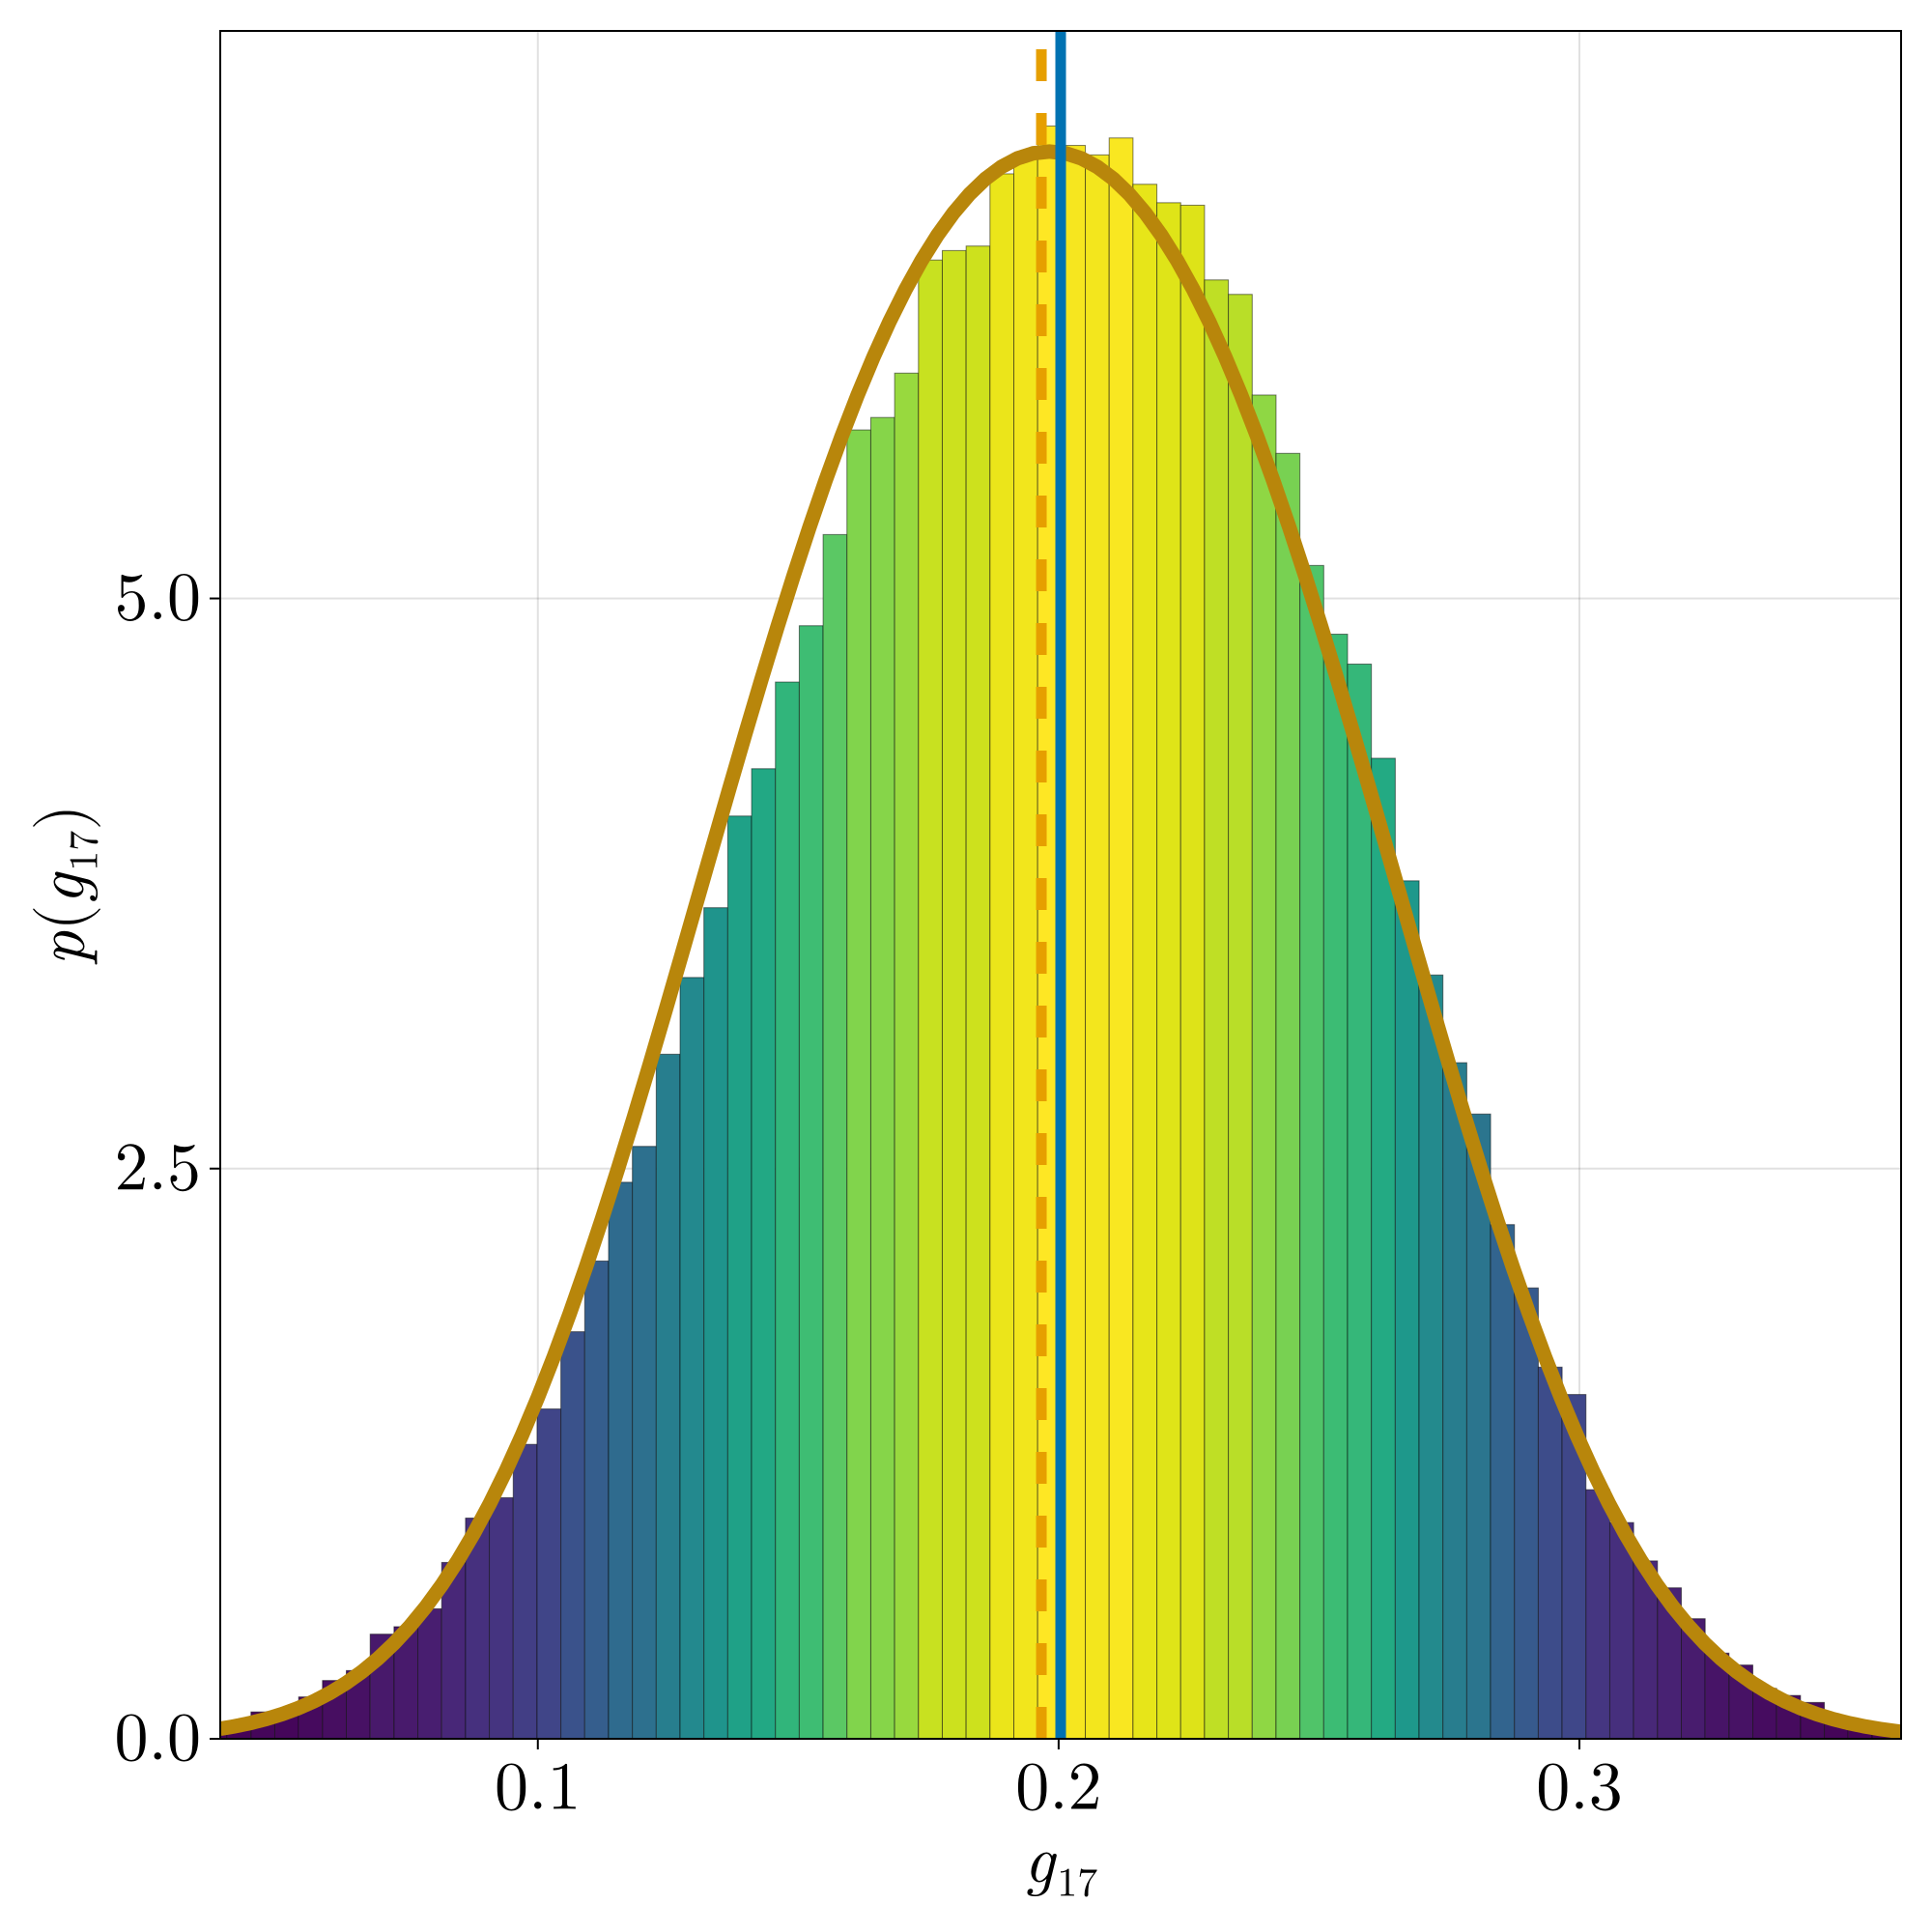

In [27]:
plot_output_marginals_noLegend(input_𝒻ₚ;
  selection=17,
  𝒩ₙₙNL=𝒩ₙₙ1L, 𝚯_NL=𝚯_1L, Fₙₗ=F₁1L, ∂𝐳Fₙₗ=∂𝐳F₁ₗ, β_noise=β, noise_distrib=uniform_distrib)

In [28]:
sample_indices = 1:9:19;
plot_positions = vec(collect(Iterators.product(1:3, 1)));

fig_1L::Makie.Figure, output_noised_g_part_samples_1L::Matrix = plot_output_marginals(input_𝒻ₚ, sample_indices, plot_positions;
  𝒩ₙₙNL=𝒩ₙₙ1L, 𝚯_NL=𝚯_1L, Fₙₗ=F₁1L, ∂𝐳Fₙₗ=∂𝐳F₁ₗ, β_noise=β, noise_distrib=uniform_distrib)

(Scene (1000px, 350px):
  0 Plots
  3 Child Scenes:
    ├ Scene (1000px, 350px)
    ├ Scene (1000px, 350px)
    └ Scene (1000px, 350px), [-2.875139947486993 -2.184118721505675 … -2.439538960618191 -1.9457911753581631; -2.8843782559203555 -2.253775146470037 … -2.4632764466307995 -1.990972206717399; … ; 2.818491699549345 2.0789981825148396 … 2.375392778998597 1.8695246311339093; 2.8751400041975583 2.1841187582755928 … 2.439539012929349 1.9457912132477495])

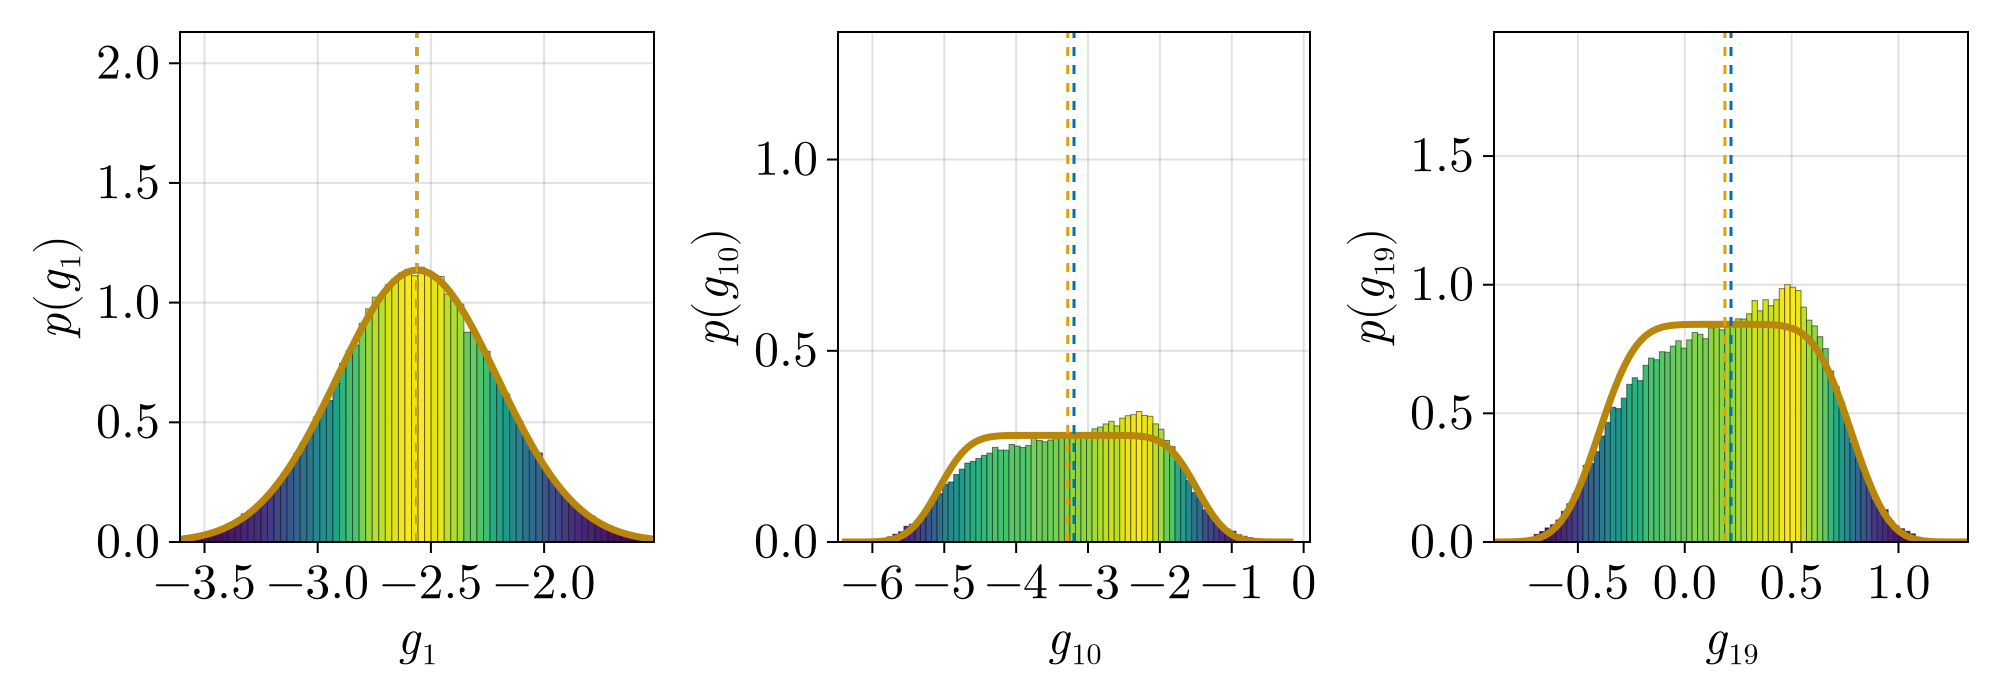

In [29]:
fig_1L

In [ ]:
save(joinpath(fig_results_path, "Lin_1L_1__5.pdf"), fig_1L; pt_per_unit=0.5)

In [ ]:
cornerplot_fig::Makie.Figure = plot_output_cornerPlot(input_𝒻ₚ;
  # selection=1,
  𝒩ₙₙNL=𝒩ₙₙ1L, 𝚯_NL=𝚯_1L, Fₙₗ=F₁1L, ∂𝐳Fₙₗ=∂𝐳F₁ₗ, β_noise=β, noise_distrib=uniform_distrib)

In [ ]:
save(joinpath(fig_results_path, "CornerPlotLinOp1L.pdf"), cornerplot_fig; pt_per_unit=0.5)

In [ ]:
sample_indices = 1:2:29;
plot_positions = vec(collect(Iterators.product(1:3, 1:3)));

fig_1L::Makie.Figure = plot_output_marginals(input_𝒻ₚ, sample_indices, plot_positions;
  𝒩ₙₙNL=𝒩ₙₙ1L, 𝚯_NL=𝚯_1L, Fₙₗ=F₁1L, ∂𝐳Fₙₗ=∂𝐳F₁ₗ, β_noise=β, noise_distrib=uniform_distrib)

In [ ]:
save(joinpath(fig_results_path, "Lin_1L_1__5.pdf"), fig_1L; pt_per_unit=0.5)

In [ ]:
plot_output_cornerPlot(input_𝒻ₚ;
  # selection=1,
  𝒩ₙₙNL=𝒩ₙₙ1L, 𝚯_NL=𝚯_1L, Fₙₗ=F₁1L, ∂𝐳Fₙₗ=∂𝐳F₁ₗ, β_noise=β, noise_distrib=uniform_distrib)

In [ ]:
# sample_indices = 1:2:29;
# plot_positions = vec(collect(Iterators.product(1:3, 1:5)));

sample_indices = 1:8:29;
plot_positions = vec(collect(Iterators.product(1:2, 1:2)));

plot_output_marginals(input_𝒻ₚ,
  sample_indices,
  plot_positions; 𝒩ₙₙNL=𝒩ₙₙ1L, 𝚯_NL=𝚯_1L, Fₙₗ=F₁1L, ∂𝐳Fₙₗ=∂𝐳F₁ₗ, β_noise=β, noise_distrib=uniform_distrib)

NOTE: Remove the titles from all figures, and put proper labels (the x-axis is correct, but p(g_j) should indicate the component)
- Note again: make sure the font size *at least* as big as the caption size
- Note: add 6-9 figures max to each plot
  - choose 3 g's (e.g. g_1, g_3, g_19), and use them as representatives for the different number of layers for both operators)
  - and plot the following: linear operator, nonlinear operator

In [ ]:
# g_samples = output_noised_g_part_samples
output_noised_g_part_samples_1L

In [ ]:
# using MATLAB

In [ ]:

# if ℒ_op == ℒ_lin
#   write_matfile("~/Documents/MATLAB/Copula_code/1layer_test.mat";
#     g_samp_data=output_noised_g_part_samples_1L)
# end

# if ℒ_op == ℒ_nonlin
#   write_matfile("~/Documents/MATLAB/Copula_code/1layer_test_firstNonlinear.mat";
#     g_samp_data=output_noised_g_part_samples_1L)
# end

In [ ]:
include("../Scripts/utils/plot_data.jl")

### 1 Layer - Local Linear Operator:

In [ ]:
β::Real = 0.09
uniform_distrib::Uniform{Float64} = Uniform(-β, β)

plot_output_marginals(input_𝒻ₚLLin;
  𝒩ₙₙNL=𝒩ₙₙLLin1L, 𝚯_NL=𝚯_localLin1L, Fₙₗ=FLLin₁ₗ, ∂𝐳Fₙₗ=∂𝐳FLLin₁ₗ, β_noise=β, noise_distrib=uniform_distrib)

In [ ]:
sample_indices = 1:2:29;
plot_positions = vec(collect(Iterators.product(1:3, 1:5)));

plot_output_marginals(input_𝒻ₚLLin, sample_indices, plot_positions;
  𝒩ₙₙNL=𝒩ₙₙLLin1L, 𝚯_NL=𝚯_localLin1L, Fₙₗ=FLLin₁ₗ, ∂𝐳Fₙₗ=∂𝐳FLLin₁ₗ, β_noise=β, noise_distrib=uniform_distrib)

## For 2 layers:

In [ ]:
plot_output_marginals(input_𝒻ₚ;
  𝒩ₙₙNL=𝒩ₙₙ2L, 𝚯_NL=𝚯_2L, Fₙₗ=F₂ₗ, ∂𝐳Fₙₗ=∂𝐳F₂ₗ, β_noise=β, noise_distrib=uniform_distrib)

In [ ]:
sample_indices = 1:2:29;
plot_positions = vec(collect(Iterators.product(1:3, 1:5)));

# sample_indices = 1:8:29;
# plot_positions = vec(collect(Iterators.product(1:2, 1:2)));

plot_output_marginals(input_𝒻ₚ, sample_indices, plot_positions;
  𝒩ₙₙNL=𝒩ₙₙ2L, 𝚯_NL=𝚯_2L, Fₙₗ=F₂ₗ, ∂𝐳Fₙₗ=∂𝐳F₂ₗ, β_noise=β, noise_distrib=uniform_distrib)

In [ ]:
plot_output_marginals(input_𝒻ₚ;
  selection=25, 𝒩ₙₙNL=𝒩ₙₙ2L, 𝚯_NL=𝚯_2L, Fₙₗ=F₂ₗ, ∂𝐳Fₙₗ=∂𝐳F₂ₗ, β_noise=β, noise_distrib=uniform_distrib)

In [ ]:
# fig = Figure(size=(1000, 1550));
fig = Makie.Figure(size=(1000, 1550), px_per_unit=2.5, fontsize=12)

# input_noise_𝒻ₚ_samples, output_noised_g_part_samples_2L = generate_noised_samples(𝒩ₙₙ2L;
#   input_data=input_𝒻ₚ,
#   output_data=output_𝒻ₚ,
#   noise_pdf=uniform_distrib)

_, output_noised_g_part_samples_2L = generate_noised_samples(input_𝒻ₚ;
  𝒩ₙₙ=𝒩ₙₙ2L,
  noise_pdf=uniform_distrib)


num_nonHidden_layers::Int = 1
num_layers::Int = length(keys(𝚯_2L)) - num_nonHidden_layers

#===
Recall the parameters we have:
===#
# selection = 5;
selection::Int = rand(1:length(input_𝒻ₚ))
# g_analyt::Real = 𝒩_of_μₚ[selection]
αⱼ2L::Vector = 𝐀_2L[selection, :]

Π(x; radius=1.0)::Vector = heaviside.(x .+ radius) - heaviside.(x .- radius)
ω(gⱼ)::Vector = gⱼ .- dot(αⱼ2L, F₂ₗ(μₚ))
J::Matrix = ∂𝐳F₂ₗ(μₚ)
Q::Matrix = 𝐀_2L * J
q_j::Vector = Q[selection, :]
gₖ::Vector = output_noised_g_part_samples_2L[selection, :]
# mean_gk::Float64 = mean(gₖ)

γ::Vector = vec(transpose(αⱼ2L) * J)
ℓ::Vector = β * γ
##=== Calculation of Approximated Moments

ρ_out::Vector = 𝐀_2L * F₂ₗ(μₚ)

mean_from_formula(outputᵢ::Int)::Real = dot(𝐀_2L[outputᵢ, :], F₂ₗ(μₚ))
mean_prod(outputᵢ::Int, outputⱼ::Int)::Real = ρ_out[outputᵢ] * ρ_out[outputⱼ] + ((β^2) / 3.0) * dot(Q[outputᵢ, :], Q[outputⱼ, :])
var_from_formula(outputᵢ::Int)::Real = mean_prod(outputᵢ, outputᵢ) - mean_from_formula(outputᵢ)^2
Cov_formula(outputᵢ::Int, outputⱼ::Int)::Real = mean_prod(outputᵢ, outputⱼ) - mean_from_formula(outputᵢ) * mean_from_formula(outputⱼ)

𝔼gₖ::Real = mean_from_formula(selection);
𝕍gₖ::Real = var_from_formula(selection);

##=== Calculation of Approximated Moments

##=== Calculation of IFT
N = 2048
L = N / 2
x = LinRange(-L, L, N)

# Define the sinc function (normalized by π)
sinc_func(x, γ) = sin(γ * x) / (γ * x)

𝒻::Vector = N * (1.0 / (2.0 * π)) * Πsinc(ℓ, x; Npoints=Nx);

# Step 2: Perform the inverse Fourier transform
𝒻̂ = ift(𝒻)
##=== Calculation of IFT

begin
  pdf_height = maximum(kde(gₖ).density)
  fig = Figure()
  ax = Makie.Axis(fig[1, 1];
    limits=(mean(gₖ) - 3.0 * std(gₖ), mean(gₖ) + 3.0 * std(gₖ), 0, pdf_height + 1.0),
    xlabel=L"g_{%$selection} = \mathcal{N}(f(μ_{%$selection} \pm \beta))",
    ylabel=L"p(g_j)",
    title=L"\text{PDF of component %$selection of the outout } g_j:\text{%$num_layers Layers}")
  hist!(ax, gₖ, normalization=:pdf, bins=100, label_formatter=x -> round(x, digits=2), label_size=15, strokewidth=0.5, strokecolor=(:black, 0.5), color=:values)

  Makie.density!(gₖ, label="KDE Estimation")

  CairoMakie.lines!(ax, x * (π / L) .+ dot(αⱼ2L, F₂ₗ(μₚ)), abs.(𝒻̂), label=L"\mathcal{F}^{-1}(\Pi_{k=1}^{%$(Nx+1)}sinc(\ell_k a_{%$selection}))", color=:darkgoldenrod, linewidth=3.5)
  mean_value = Format.format(mean(gₖ), precision=4)
  mean_val_from_formula = Format.format(𝔼gₖ, precision=4)
  var_value = Format.format(var(gₖ), precision=4)
  var_val_from_formula = Format.format(𝕍gₖ, precision=4)

  CairoMakie.vlines!(ax, mean(gₖ), label=L"\mathbb{E}[g_k]_{\text{num}} = %$mean_value", linestyle=:dash)
  CairoMakie.vlines!(ax, 𝔼gₖ, label=L"\mathbb{E}[g_k]_{\text{formula}} = %$mean_val_from_formula", linestyle=:dash)
  CairoMakie.vlines!(ax, 𝔼gₖ, label=L"\mathbb{V}[g_k]_{\text{num}} = %$var_value", linestyle=:dash, color=:transparent)
  CairoMakie.vlines!(ax, 𝔼gₖ, label=L"\mathbb{V}[g_k]_{\text{formula}} = %$var_val_from_formula", linestyle=:dash, color=:transparent)

  # CURRENTLY BROKEN, wait for update to provide plot legend
  # fig[1, 2] = Legend(fig, ax, "Trig Functions", framevisible = false)

  fig
end

In [ ]:
fig = Makie.Figure(size=(1000, 1550), px_per_unit=2.5, fontsize=14);

for (plot_coord, point_selection) in zip(plot_positions, sample_indices)
  row = plot_coord[1] # actually col
  col = plot_coord[2] # actually row

  selection = point_selection
  αⱼ2L::Vector = 𝐀_2L[selection, :]

  # Π(x; radius=1.0)::Vector = heaviside.(x .+ radius) - heaviside.(x .- radius)
  # ω(gⱼ)::Vector = gⱼ .- dot(αⱼ2L, F₂ₗ(μₚ))
  # J::Matrix = ∂𝐳F₂ₗ(μₚ)
  # Q::Matrix = 𝐀_2L * J
  q_j::Vector = Q[selection, :]
  gₖ::Vector = output_noised_g_part_samples_2L[selection, :]
  # mean_gk::Float64 = mean(gₖ)

  γ::Vector = vec(transpose(αⱼ2L) * J)
  ℓ::Vector = β * γ

  ##=== Calculation of Approximated Moments

  ρ_out::Vector = 𝐀_2L * F₂ₗ(μₚ)

  # 𝔼gₖ::Real = dot(𝐀_2L[selection, :], F₂ₗ(μₚ))
  # var_from_formula = ρ_out[selection] * ρ_out[selection] + (1.0 / 3.0) * dot(q_j, q_j) * β^2 - 𝔼gₖ^2
  𝔼gₖ::Real = mean_from_formula(selection)
  𝕍gₖ::Real = var_from_formula(selection)


  mean_from_formula(outputᵢ::Int)::Real = dot(𝐀_2L[outputᵢ, :], F₂ₗ(μₚ))
  mean_prod(outputᵢ::Int, outputⱼ::Int)::Real = ρ_out[outputᵢ] * ρ_out[outputⱼ] + ((β^2) / 3.0) * dot(Q[outputᵢ, :], Q[outputⱼ, :])
  var_from_formula(outputᵢ::Int)::Real = mean_prod(outputᵢ, outputᵢ) - mean_from_formula(outputᵢ)^2
  Cov_formula(outputᵢ::Int, outputⱼ::Int)::Real = mean_prod(outputᵢ, outputⱼ) - mean_from_formula(outputᵢ) * mean_from_formula(outputⱼ)

  # ##=== Calculation of Approximated Moments

  ##=== Calculation of IFT
  N = 2048
  L = N / 2
  x = LinRange(-L, L, N)

  # Define the sinc function (normalized by π)
  sinc_func(x, γ) = sin(γ * x) / (γ * x)

  test_sinc_func = sinc_func.(x, ℓ[1])
  amount = Nx + 1
  for k in 2:(amount)
    sinc_values_k = sinc_func.(x, ℓ[k])
    test_sinc_func = test_sinc_func .* sinc_values_k
  end

  test_sinc_func = N * (1.0 / (2.0 * π)) * test_sinc_func

  # Step 2: Perform the inverse Fourier transform
  inv_fourier = ift(test_sinc_func)
  ##=== Calculation of IFT

  begin
    pdf_height = maximum(kde(gₖ).density)
    ax = Makie.Axis(fig[col, row];
      # limits=(-0.6, 0.9, 0, 3),
      limits=(mean(gₖ) - 3.0 * std(gₖ), mean(gₖ) + 3.0 * std(gₖ), 0, pdf_height + 1.0),
      xlabel=L"g_{%$selection} = \mathcal{N}(f(μ_{%$selection} \pm \beta))",
      ylabel=L"p(g_j)",
      title=L"\text{PDF of component %$selection of the outout } g_j:\text{%$num_layers Layer}")
    hist!(ax, gₖ, normalization=:pdf, bins=100, label_formatter=x -> round(x, digits=2), label_size=15, strokewidth=0.5, strokecolor=(:black, 0.5), color=:values)

    Makie.density!(gₖ, label="KDE Estimation")

    CairoMakie.lines!(ax, x * (π / L) .+ dot(αⱼ2L, F₂ₗ(μₚ)), abs.(inv_fourier), label=L"\mathcal{F}^{-1}(\Pi_{k=1}^{%$(Nx+1)}sinc(\ell_k a_{%$selection}))", color=:darkgoldenrod, linewidth=3.5)
    mean_value = format(mean(gₖ), precision=4)
    mean_val_from_formula = format(𝔼gₖ, precision=4)
    var_value = format(var(gₖ), precision=4)
    var_val_from_formula = format(𝕍gₖ, precision=4)

    CairoMakie.vlines!(ax, mean(gₖ), label=L"\mathbb{E}[g_k]_{\text{num}} = %$mean_value", linestyle=:dash)
    CairoMakie.vlines!(ax, 𝔼gₖ, label=L"\mathbb{E}[g_k]_{\text{formula}} = %$mean_val_from_formula", linestyle=:dash)
    CairoMakie.vlines!(ax, 𝔼gₖ, label=L"\mathbb{V}[g_k]_{\text{num}} = %$var_value", linestyle=:dash, color=:transparent)
    CairoMakie.vlines!(ax, 𝔼gₖ, label=L"\mathbb{V}[g_k]_{\text{formula}} = %$var_val_from_formula", linestyle=:dash, color=:transparent)
  end
end
fig

In [ ]:
# g_samples = output_noised_g_part_samples
output_noised_g_part_samples_2L

In [ ]:
# # write_matfile("~/Documents/MATLAB/Copula_code/2layer_test.mat";
# #   g_samp_data=output_noised_g_part_samples_2L)

# if ℒ_op == ℒ_lin
#   write_matfile("~/Documents/MATLAB/Copula_code/2layer_test.mat";
#     g_samp_data=output_noised_g_part_samples_1L)
# end

# if ℒ_op == ℒ_nonlin
#   write_matfile("~/Documents/MATLAB/Copula_code/2layer_test_firstNonlinear.mat";
#     g_samp_data=output_noised_g_part_samples_1L)
# end

## For 3 layers:

In [ ]:
β::Real = 2.0

uniform_distrib::Uniform{Float64} = Uniform(-β, β)

μₚ::Vector = input_𝒻ₚ;
num_nonHidden_layer::Int = 1;
num_layers::Int = length(keys(𝚯_3L)) - num_nonHidden_layer;

# selection = 14
selection = rand(1:31);
Selected𝒩ₙₙ = 𝒩ₙₙ3L;
𝒩_of_μₚ::Vector = Selected𝒩ₙₙ(μₚ);

input_noised_f_part_samples, output_noised_g_part_samples = generate_noised_samples(μₚ;
  𝒩ₙₙ=Selected𝒩ₙₙ,
  # input_data=input_𝒻ₚ,
  # output_data=output_𝒻ₚ,
  noise_pdf=uniform_distrib)

σ_part::Vector = zeros(length(μₚ))
numericalMean_part::Vector = zeros(length(μₚ))
for k in 1:31
  gₖ::Vector = output_noised_g_part_samples[k, :]
  σ_part[k] = std(gₖ)
  numericalMean_part[k] = mean(gₖ)
end


fig_twocol = Makie.Figure(size=(1500, 1000), px_per_unit=0.5, fontsize=35);
fig_3L_13, ax13 = plot_output_marginals_noLegend(fig_twocol, 1, 1, input_𝒻ₚ;
  selection=13,
  𝒩ₙₙNL=𝒩ₙₙ3L, 𝚯_NL=𝚯_3L, Fₙₗ=F₃ₗ, ∂𝐳Fₙₗ=∂𝐳F₃ₗ, β_noise=β, noise_distrib=uniform_distrib, chosen_offset=0.01)

fig_3L_25, ax25 = plot_output_marginals_noLegend(fig_twocol, 2, 1, input_𝒻ₚ;
  selection=25,
  𝒩ₙₙNL=𝒩ₙₙ3L, 𝚯_NL=𝚯_3L, Fₙₗ=F₃ₗ, ∂𝐳Fₙₗ=∂𝐳F₃ₗ, β_noise=β, noise_distrib=uniform_distrib, chosen_offset=0.01)

selected_points = Point2f.([nodesxₚ_gll[13], nodesxₚ_gll[25]], [𝒩_of_μₚ[13], 𝒩_of_μₚ[25]])
# output_perturb_fig = Makie.Figure(size=(1500, 1000), px_per_unit=0.5, fontsize=35);

begin
  ax = Makie.Axis(fig_twocol[1:2, 2];
    # limits=(-1.0, 1.1, -8, 5),
    xlabel=L"y",
    ylabel=L"g(y)")
  # title="Sample Curve f(x) = exp(sin(5x)) vs. Neural Net Solution, |β| ≤ $β, $num_layers Layers")


  Makie.band!(ax, nodesxₚ_gll, 𝒩_of_μₚ .- 3 * σ_part, 𝒩_of_μₚ .+ 3 * σ_part, label="3σ", alpha=0.55)
  Makie.band!(ax, nodesxₚ_gll, 𝒩_of_μₚ .- 2 * σ_part, 𝒩_of_μₚ .+ 2 * σ_part, label="2σ", color=:darkgoldenrod, alpha=0.55)
  Makie.band!(ax, nodesxₚ_gll, 𝒩_of_μₚ .- σ_part, 𝒩_of_μₚ .+ σ_part, label="σ", color=:indigo, alpha=0.55)

  for i in 1:length(nodesxₚ_gll)
    hist!(ax, output_noised_g_part_samples[i, :], scale_to=0.1, offset=nodesxₚ_gll[i], direction=:x)
  end
  Makie.errorbars!(nodesxₚ_gll, 𝒩_of_μₚ, σ_part, color=range(0, 1, length=length(nodesxₚ_gll)), whiskerwidth=10)

  add_interp_line(ax, output_𝒻ₚ, L"g(\mu)", 10.0, (:dash, :dense), :darkblue)

  # add_interp_line(ax, output_noised_g_part_samples[:, first_samp], 3.0, 0.8; selected_color=:black)
  # add_interp_line(ax, output_noised_g_part_samples[:, second_samp], 3.0, 0.8; selected_color=:black)
  # add_interp_line(ax, output_noised_g_part_samples[:, third_samp], 3.0, 0.8; selected_color=:black)
  first_samp::Int = 7
  second_samp::Int = 130
  third_samp::Int = 51

  Makie.scatter!(ax, nodesxₚ_gll, output_𝒻ₚ,
    label="\"Sampled\" Data";
    markersize=8,
    alpha=0.5,
    strokewidth=2)
  # Makie.scatter!(ax, nodesxₚ_gll, vec(𝒩_of_μₚ),
  #   label="Neural Net Generated Data";
  #   markersize=6,
  #   alpha=0.5,
  #   strokewidth=2)
  # axislegend(ax, position=:rb)
  Makie.scatter!(ax, selected_points,
    label="Four Samples";
    markersize=35,
    # alpha=10.0,
    strokewidth=2,
    color=c2)
  # fig[1, 2] = Legend(fig, ax, framevisible=false)
  fig_twocol
end

In [ ]:
save(joinpath(fig_results_path, "Lin_3L_Comp1325_2__0.pdf"), fig_twocol; pt_per_unit=0.5)

In [ ]:
plot_output_marginals_noLegend(input_𝒻ₚ;
  selection=8,
  𝒩ₙₙNL=𝒩ₙₙ3L, 𝚯_NL=𝚯_3L, Fₙₗ=F₃ₗ, ∂𝐳Fₙₗ=∂𝐳F₃ₗ, β_noise=β, noise_distrib=uniform_distrib, chosen_offset=0.01)

In [ ]:
sample_indices = 1:2:29;
plot_positions = vec(collect(Iterators.product(1:3, 1:5)));

# sample_indices = 1:8:29;
# plot_positions = vec(collect(Iterators.product(1:2, 1:2)));

plot_output_marginals(input_𝒻ₚ,
  sample_indices,
  plot_positions;
  𝒩ₙₙNL=𝒩ₙₙ3L, 𝚯_NL=𝚯_3L, Fₙₗ=F₃ₗ, ∂𝐳Fₙₗ=∂𝐳F₃ₗ, β_noise=β, noise_distrib=uniform_distrib)

In [ ]:
fig = Makie.Figure(size=(1000, 1550), px_per_unit=2.5, fontsize=14);

input_noise_𝒻ₚ_samples, output_noised_g_part_samples_3L = generate_noised_samples(𝒩ₙₙ3L;
  input_data=input_𝒻ₚ,
  output_data=output_𝒻ₚ,
  noise_pdf=uniform_distrib)

num_nonHidden_layers::Int = 1
num_layers::Int = length(keys(𝚯_3L)) - num_nonHidden_layers

#===
Recall the parameters we have:
===#
# selection = 14
selection::Int = rand(1:length(input_𝒻ₚ))
# g_analyt::Real = 𝒩_of_μₚ[selection]
αⱼ3L::Vector = 𝐀_3L[selection, :]

Π(x; radius=1.0)::Vector = heaviside.(x .+ radius) - heaviside.(x .- radius)
ω(gⱼ)::Vector = gⱼ .- dot(αⱼ3L, F₃ₗ(μₚ))
J::Matrix = ∂𝐳F₃ₗ(μₚ)
Q::Matrix = 𝐀_3L * J
q_j::Vector = Q[selection, :]
gₖ::Vector = output_noised_g_part_samples_3L[selection, :]

γ::Vector = vec(transpose(αⱼ3L) * J)
ℓ::Vector = β * γ
##=== Calculation of Approximated Moments

ρ_out::Vector = 𝐀_3L * F₃ₗ(μₚ)

mean_from_formula(outputᵢ::Int)::Real = dot(𝐀_3L[outputᵢ, :], F₃ₗ(μₚ))
mean_prod(outputᵢ::Int, outputⱼ::Int)::Real = ρ_out[outputᵢ] * ρ_out[outputⱼ] + ((β^2) / 3.0) * dot(Q[outputᵢ, :], Q[outputⱼ, :])
var_from_formula(outputᵢ::Int)::Real = mean_prod(outputᵢ, outputᵢ) - mean_from_formula(outputᵢ)^2
Cov_formula(outputᵢ::Int, outputⱼ::Int)::Real = mean_prod(outputᵢ, outputⱼ) - mean_from_formula(outputᵢ) * mean_from_formula(outputⱼ)

𝔼gₖ::Real = mean_from_formula(selection);
𝕍gₖ::Real = var_from_formula(selection);

##=== Calculation of Approximated Moments

##=== Calculation of IFT
N = 2048
L = N / 2
x = LinRange(-L, L, N)

# Define the sinc function (normalized by π)
sinc_func(x, γ) = sin(γ * x) / (γ * x)

𝒻::Vector = N * (1.0 / (2.0 * π)) * Πsinc(ℓ, x; Npoints=Nx);

# Step 2: Perform the inverse Fourier transform
𝒻̂ = ift(𝒻)
##=== Calculation of IFT

begin
  fig = Figure()
  ax = Makie.Axis(fig[1, 1];
    # limits=(-5.0, 5.0, 0, 3),
    xlabel=L"g_{%$selection} = \mathcal{N}(f(μ_{%$selection} \pm \beta))",
    ylabel=L"p(g_j)",
    title=L"\text{PDF of component %$selection of the outout } g_j:\text{%$num_layers Layers}")
  hist!(ax, gₖ, normalization=:pdf, bins=100, label_formatter=x -> round(x, digits=2), label_size=15, strokewidth=0.5, strokecolor=(:black, 0.5), color=:values)

  Makie.density!(gₖ, label="KDE Estimation")

  CairoMakie.lines!(ax, x * (π / L) .+ dot(αⱼ3L, F₃ₗ(μₚ)), abs.(𝒻̂), label=L"\mathcal{F}^{-1}(\Pi_{k=1}^{%$(Nx+1)}sinc(\ell_k a_{%$selection}))", color=:darkgoldenrod, linewidth=3.5)
  mean_value = format(mean(gₖ), precision=4)
  mean_val_from_formula = format(𝔼gₖ, precision=4)
  var_value = format(var(gₖ), precision=4)
  var_val_from_formula = format(𝕍gₖ, precision=4)

  CairoMakie.vlines!(ax, mean(gₖ), label=L"\mathbb{E}[g_k]_{\text{num}} = %$mean_value", linestyle=:dash)
  CairoMakie.vlines!(ax, 𝔼gₖ, label=L"\mathbb{E}[g_k]_{\text{formula}} = %$mean_val_from_formula", linestyle=:dash)
  CairoMakie.vlines!(ax, 𝔼gₖ, label=L"\mathbb{V}[g_k]_{\text{num}} = %$var_value", linestyle=:dash)
  CairoMakie.vlines!(ax, 𝔼gₖ, label=L"\mathbb{V}[g_k]_{\text{formula}} = %$var_val_from_formula", linestyle=:dash)


  # CURRENTLY BROKEN, wait for update to provide plot legend
  # fig[1, 2] = Legend(fig, ax, "Trig Functions", framevisible = false)

  fig
end

In [ ]:
fig = Makie.Figure(size=(1000, 1550), px_per_unit=2.5, fontsize=14);

for (plot_coord, point_selection) in zip(plot_positions, sample_indices)
  row = plot_coord[1] # actually col
  col = plot_coord[2] # actually row

  selection = point_selection
  αⱼ3L::Vector = 𝐀_3L[selection, :]

  Π(x; radius=1.0)::Vector = heaviside.(x .+ radius) - heaviside.(x .- radius)
  ω(gⱼ)::Vector = gⱼ .- dot(αⱼ3L, F₃ₗ(μₚ))
  J::Matrix = ∂𝐳F₃ₗ(μₚ)
  Q::Matrix = 𝐀_3L * J
  q_j::Vector = Q[selection, :]
  gₖ::Vector = output_noised_g_part_samples_3L[selection, :]
  # mean_gk::Float64 = mean(gₖ)

  γ::Vector = vec(transpose(αⱼ3L) * J)
  ℓ::Vector = β * γ
  ##=== Calculation of Approximated Moments

  ρ_out::Vector = 𝐀_3L * F₃ₗ(μₚ)

  # 𝔼gₖ::Real = dot(𝐀_3L[selection, :], F₃ₗ(μₚ))
  # var_from_formula = ρ_out[selection] * ρ_out[selection] + (1.0 / 3.0) * dot(q_j, q_j) * β^2 - 𝔼gₖ^2

  # mean_from_formula(outputᵢ::Int)::Real = dot(𝐀_3L[outputᵢ, :], F₃ₗ(μₚ))
  # mean_prod(outputᵢ::Int, outputⱼ::Int)::Real = ρ_out[outputᵢ] * ρ_out[outputⱼ] + ((β^2) / 3.0) * dot(Q[outputᵢ, :], Q[outputⱼ, :])
  # var_from_formula(outputᵢ::Int)::Real = mean_prod(outputᵢ, outputᵢ) - mean_from_formula(outputᵢ)^2
  # Cov_formula(outputᵢ::Int, outputⱼ::Int)::Real = mean_prod(outputᵢ, outputⱼ) - mean_from_formula(outputᵢ) * mean_from_formula(outputⱼ)

  𝔼gₖ::Real = mean_from_formula(selection)
  𝕍gₖ::Real = var_from_formula(selection)

  ##=== Calculation of Approximated Moments

  ##=== Calculation of IFT
  N = 2048
  L = N / 2
  x = LinRange(-L, L, N)

  # Define the sinc function (normalized by π)
  sinc_func(x, γ) = sin(γ * x) / (γ * x)

  test_sinc_func = sinc_func.(x, ℓ[1])
  amount = Nx + 1
  for k in 2:(amount)
    sinc_values_k = sinc_func.(x, ℓ[k])
    test_sinc_func = test_sinc_func .* sinc_values_k
  end

  test_sinc_func = N * (1.0 / (2.0 * π)) * test_sinc_func

  # Step 2: Perform the inverse Fourier transform
  inv_fourier = ift(test_sinc_func)
  ##=== Calculation of IFT

  begin
    pdf_height = maximum(kde(gₖ).density)
    ax = Makie.Axis(fig[col, row];
      # limits=(-0.6, 0.9, 0, 3),
      limits=(mean(gₖ) - 3.0 * std(gₖ), mean(gₖ) + 3.0 * std(gₖ), 0, pdf_height + 1.0),
      xlabel=L"g_{%$selection} = \mathcal{N}(f(μ_{%$selection} \pm \beta))",
      ylabel=L"p(g_j)",
      title=L"\text{PDF of component %$selection of the outout } g_j:\text{%$num_layers Layer}")
    hist!(ax, gₖ, normalization=:pdf, bins=100, label_formatter=x -> round(x, digits=2), label_size=15, strokewidth=0.5, strokecolor=(:black, 0.5), color=:values)

    Makie.density!(gₖ, label="KDE Estimation")

    CairoMakie.lines!(ax, x * (π / L) .+ dot(αⱼ3L, F₃ₗ(μₚ)), abs.(inv_fourier), label=L"\mathcal{F}^{-1}(\Pi_{k=1}^{%$(Nx+1)}sinc(\ell_k a_{%$selection}))", color=:darkgoldenrod, linewidth=3.5)
    mean_value = format(mean(gₖ), precision=4)
    mean_val_from_formula = format(𝔼gₖ, precision=4)
    var_value = format(var(gₖ), precision=4)
    var_val_from_formula = format(𝕍gₖ, precision=4)

    CairoMakie.vlines!(ax, mean(gₖ), label=L"\mathbb{E}[g_k]_{\text{num}} = %$mean_value", linestyle=:dash)
    CairoMakie.vlines!(ax, 𝔼gₖ, label=L"\mathbb{E}[g_k]_{\text{formula}} = %$mean_val_from_formula", linestyle=:dash)
    CairoMakie.vlines!(ax, 𝔼gₖ, label=L"\mathbb{V}[g_k]_{\text{num}} = %$var_value", linestyle=:dash)
    CairoMakie.vlines!(ax, 𝔼gₖ, label=L"\mathbb{V}[g_k]_{\text{formula}} = %$var_val_from_formula", linestyle=:dash)

  end
end
fig

In [ ]:
# g_samples = output_noised_g_part_samples
output_noised_g_part_samples_3L

In [ ]:
# # write_matfile("~/Documents/MATLAB/Copula_code/3layer_test.mat";
# #   g_samp_data=output_noised_g_part_samples_3L)
# if ℒ_op == ℒ_lin
#   write_matfile("~/Documents/MATLAB/Copula_code/3layer_test.mat";
#     g_samp_data=output_noised_g_part_samples_1L)
# end

# if ℒ_op == ℒ_nonlin
#   write_matfile("~/Documents/MATLAB/Copula_code/3layer_test_firstNonlinear.mat";
#     g_samp_data=output_noised_g_part_samples_1L)
# end

In [ ]:
ℒ_op

## For 5 layers:

In [ ]:
plot_output_marginals_noLegend(input_𝒻ₚ;
  selection=1,
  𝒩ₙₙNL=𝒩ₙₙ5L, 𝚯_NL=𝚯_5L, Fₙₗ=F₅ₗ, ∂𝐳Fₙₗ=∂𝐳F₅ₗ, β_noise=β, noise_distrib=uniform_distrib)

In [ ]:
sample_indices = 1:2:29;
plot_positions = vec(collect(Iterators.product(1:3, 1:5)));



plot_output_marginals(input_𝒻ₚ, sample_indices, plot_positions;
  𝒩ₙₙNL=𝒩ₙₙ10L, 𝚯_NL=𝚯_10L, Fₙₗ=F₁₀ₗ, ∂𝐳Fₙₗ=∂𝐳F₁₀ₗ, β_noise=β, noise_distrib=uniform_distrib)

In [ ]:
plot_output_marginals_noLegend(input_𝒻ₚ;
  selection=1,
  𝒩ₙₙNL=𝒩ₙₙ5L, 𝚯_NL=𝚯_5L, Fₙₗ=F₅ₗ, ∂𝐳Fₙₗ=∂𝐳F₅ₗ, β_noise=β, noise_distrib=uniform_distrib)

In [ ]:
plot_output_marginals(input_𝒻ₚ,
  sample_indices,
  plot_positions;
  𝒩ₙₙNL=𝒩ₙₙ5L, 𝚯_NL=𝚯_5L, Fₙₗ=F₅ₗ, ∂𝐳Fₙₗ=∂𝐳F₅ₗ, β_noise=β, noise_distrib=uniform_distrib)

In [ ]:
fig = Makie.Figure(size=(1000, 1550), px_per_unit=2.5, fontsize=32);

input_noise_𝒻ₚ_samples, output_noised_g_part_samples_5L = generate_noised_samples(𝒩ₙₙ5L;
  input_data=input_𝒻ₚ,
  output_data=output_𝒻ₚ,
  noise_pdf=uniform_distrib)

num_nonHidden_layers::Int = 1
num_layers::Int = length(keys(𝚯_5L)) - num_nonHidden_layers

#===
Recall the parameters we have:
===#
# selection = 14
# selection::Int = rand(1:length(input_𝒻ₚ))
selection::Int = 22;
# g_analyt::Real = 𝒩_of_μₚ[selection]
αⱼ5L::Vector = 𝐀_5L[selection, :]

Π(x; radius=1.0)::Vector = heaviside.(x .+ radius) - heaviside.(x .- radius)
ω(gⱼ)::Vector = gⱼ .- dot(αⱼ5L, F₅ₗ(μₚ))
J::Matrix = ∂𝐳F₅ₗ(μₚ)
Q::Matrix = 𝐀_5L * J
q_j::Vector = Q[selection, :]
gₖ::Vector = output_noised_g_part_samples_5L[selection, :]

γ::Vector = vec(transpose(αⱼ5L) * J)
ℓ::Vector = β * γ
##=== Calculation of Approximated Moments

ρ_out::Vector = 𝐀_5L * F₅ₗ(μₚ)

mean_from_formula(outputᵢ::Int)::Real = dot(𝐀_5L[outputᵢ, :], F₅ₗ(μₚ))
mean_prod(outputᵢ::Int, outputⱼ::Int)::Real = ρ_out[outputᵢ] * ρ_out[outputⱼ] + ((β^2) / 3.0) * dot(Q[outputᵢ, :], Q[outputⱼ, :])
var_from_formula(outputᵢ::Int)::Real = mean_prod(outputᵢ, outputᵢ) - mean_from_formula(outputᵢ)^2
Cov_formula(outputᵢ::Int, outputⱼ::Int)::Real = mean_prod(outputᵢ, outputⱼ) - mean_from_formula(outputᵢ) * mean_from_formula(outputⱼ)

𝔼gₖ::Real = mean_from_formula(selection);
𝕍gₖ::Real = var_from_formula(selection);

##=== Calculation of Approximated Moments

##=== Calculation of IFT
N = 2048
L = N / 2
x = LinRange(-L, L, N)

# Define the sinc function (normalized by π)
sinc_func(x, γ) = sin(γ * x) / (γ * x)

𝒻::Vector = N * (1.0 / (2.0 * π)) * Πsinc(ℓ, x; Npoints=Nx);

# Step 2: Perform the inverse Fourier transform
𝒻̂ = ift(𝒻)
##=== Calculation of IFT

begin
  pdf_height = maximum(kde(gₖ).density)
  fig = Figure()
  ax = Makie.Axis(fig[1, 1];
    # limits=(-5.0, 5.0, 0, 3),
    limits=(mean(gₖ) - 3.0 * std(gₖ), mean(gₖ) + 3.0 * std(gₖ), 0, pdf_height + 0.5),
    xlabel=L"g_{%$selection} = \mathcal{N}(f(μ_{%$selection} \pm \beta))",
    ylabel=L"p(g_j)",
    title=L"\text{PDF of component %$selection of the outout } g_j:\text{ %$num_layers Layer}")
  hist!(ax, gₖ, normalization=:pdf, bins=100, label_formatter=x -> round(x, digits=2), label_size=15, strokewidth=0.5, strokecolor=(:black, 0.5), color=:values)

  Makie.density!(gₖ, label="KDE Estimation")

  CairoMakie.lines!(ax, x * (π / L) .+ dot(αⱼ5L, F₅ₗ(μₚ)), abs.(𝒻̂), label=L"\mathcal{F}^{-1}(\Pi_{k=1}^{%$(Nx+1)}sinc(\ell_k a_{%$selection}))", color=:darkgoldenrod, linewidth=3.5)
  mean_value = format(mean(gₖ), precision=4)
  mean_val_from_formula = format(𝔼gₖ, precision=4)
  var_value = format(var(gₖ), precision=4)
  var_val_from_formula = format(𝕍gₖ, precision=4)

  CairoMakie.vlines!(ax, mean(gₖ), label=L"\mathbb{E}[g_k]_{\text{num}} = %$mean_value", linestyle=:dash)
  CairoMakie.vlines!(ax, 𝔼gₖ, label=L"\mathbb{E}[g_k]_{\text{formula}} = %$mean_val_from_formula", linestyle=:dash)
  CairoMakie.vlines!(ax, 𝔼gₖ, label=L"\mathbb{V}[g_k]_{\text{num}} = %$var_value", linestyle=:dash, color=:transparent)
  CairoMakie.vlines!(ax, 𝔼gₖ, label=L"\mathbb{V}[g_k]_{\text{formula}} = %$var_val_from_formula", linestyle=:dash, color=:transparent)

  # axislegend(ax; position=:lt)
  # axislegend()

  # CURRENTLY BROKEN, wait for update to provide plot legend
  # fig[1, 2] = Legend(fig, ax, "Trig Functions", framevisible = false)

  fig
end

In [ ]:
fig = Makie.Figure(size=(1000, 1550), px_per_unit=2.5, fontsize=14);

for (plot_coord, point_selection) in zip(plot_positions, sample_indices)
  row = plot_coord[1] # actually col
  col = plot_coord[2] # actually row

  selection = point_selection
  αⱼ5L::Vector = 𝐀_5L[selection, :]

  Π(x; radius=1.0)::Vector = heaviside.(x .+ radius) - heaviside.(x .- radius)
  ω(gⱼ)::Vector = gⱼ .- dot(αⱼ5L, F₅ₗ(μₚ))
  J::Matrix = ∂𝐳F₅ₗ(μₚ)
  Q::Matrix = 𝐀_5L * J
  q_j::Vector = Q[selection, :]
  gₖ::Vector = output_noised_g_part_samples_5L[selection, :]
  # mean_gk::Float64 = mean(gₖ)

  γ::Vector = vec(transpose(αⱼ5L) * J)
  ℓ::Vector = β * γ
  ##=== Calculation of Approximated Moments

  ρ_out::Vector = 𝐀_5L * F₅ₗ(μₚ)

  𝔼gₖ::Real = mean_from_formula(selection)
  𝕍gₖ::Real = var_from_formula(selection)

  mean_from_formula(outputᵢ::Int)::Real = dot(𝐀_5L[outputᵢ, :], F₅ₗ(μₚ))
  mean_prod(outputᵢ::Int, outputⱼ::Int)::Real = ρ_out[outputᵢ] * ρ_out[outputⱼ] + ((β^2) / 3.0) * dot(Q[outputᵢ, :], Q[outputⱼ, :])
  var_from_formula(outputᵢ::Int)::Real = mean_prod(outputᵢ, outputᵢ) - mean_from_formula(outputᵢ)^2
  Cov_formula(outputᵢ::Int, outputⱼ::Int)::Real = mean_prod(outputᵢ, outputⱼ) - mean_from_formula(outputᵢ) * mean_from_formula(outputⱼ)

  ##=== Calculation of Approximated Moments

  ##=== Calculation of IFT
  N = 2048
  L = N / 2
  x = LinRange(-L, L, N)

  # Define the sinc function (normalized by π)
  sinc_func(x, γ) = sin(γ * x) / (γ * x)

  𝒻::Vector = N * (1.0 / (2.0 * π)) * Πsinc(ℓ, x; Npoints=Nx)

  # Step 2: Perform the inverse Fourier transform
  𝒻̂ = ift(𝒻)
  ##=== Calculation of IFT

  begin
    pdf_height = maximum(kde(gₖ).density)
    ax = Makie.Axis(fig[col, row];
      # limits=(-0.6, 0.9, 0, 3),
      limits=(mean(gₖ) - 3.0 * std(gₖ), mean(gₖ) + 3.0 * std(gₖ), 0, pdf_height + 1.0),
      # limits=(-0.6, 0.9, 0, 3),
      xlabel=L"g_{%$selection} = \mathcal{N}(f(μ_{%$selection} \pm \beta))",
      ylabel=L"p(g_j)",
      title=L"\text{PDF of component %$selection of the outout } g_j:\text{%$num_layers Layer}")
    hist!(ax, gₖ, normalization=:pdf, bins=100, label_formatter=x -> round(x, digits=2), label_size=15, strokewidth=0.5, strokecolor=(:black, 0.5), color=:values)

    Makie.density!(gₖ, label="KDE Estimation")

    CairoMakie.lines!(ax, x * (π / L) .+ dot(αⱼ5L, F₅ₗ(μₚ)), abs.(𝒻̂), label=L"\mathcal{F}^{-1}(\Pi_{k=1}^{%$(Nx+1)}sinc(\ell_k a_{%$selection}))", color=:darkgoldenrod, linewidth=3.5)
    mean_value = format(mean(gₖ), precision=4)
    mean_val_from_formula = format(𝔼gₖ, precision=4)
    var_value = format(var(gₖ), precision=4)
    var_val_from_formula = format(𝕍gₖ, precision=4)

    CairoMakie.vlines!(ax, mean(gₖ), label=L"\mathbb{E}[g_k]_{\text{num}} = %$mean_value", linestyle=:dash)
    CairoMakie.vlines!(ax, 𝔼gₖ, label=L"\mathbb{E}[g_k]_{\text{formula}} = %$mean_val_from_formula", linestyle=:dash)
    CairoMakie.vlines!(ax, 𝔼gₖ, label=L"\mathbb{V}[g_k]_{\text{num}} = %$var_value", linestyle=:dash, color=:transparent)
    CairoMakie.vlines!(ax, 𝔼gₖ, label=L"\mathbb{V}[g_k]_{\text{formula}} = %$var_val_from_formula", linestyle=:dash, color=:transparent)
  end
end
fig

In [ ]:
# g_samples = output_noised_g_part_samples
output_noised_g_part_samples_5L

In [ ]:
write_matfile("~/Documents/MATLAB/Copula_code/5layer_test.mat";
  g_samp_data=output_noised_g_part_samples_5L)

## For 7 layers:

In [ ]:
fig = Makie.Figure(size=(1000, 1550), px_per_unit=2.5, fontsize=32);

input_noise_𝒻ₚ_samples, output_noised_g_part_samples_7L = generate_noised_samples(𝒩ₙₙ7L;
  input_data=input_𝒻ₚ,
  output_data=output_𝒻ₚ,
  noise_pdf=uniform_distrib)

num_nonHidden_layers::Int = 1
num_layers::Int = length(keys(𝚯_7L)) - num_nonHidden_layers

#===
Recall the parameters we have:
===#
# selection = 14
# selection::Int = rand(1:length(input_𝒻ₚ))
selection::Int = 22;
# g_analyt::Real = 𝒩_of_μₚ[selection]
αⱼ7L::Vector = 𝐀_7L[selection, :]

Π(x; radius=1.0)::Vector = heaviside.(x .+ radius) - heaviside.(x .- radius)
ω(gⱼ)::Vector = gⱼ .- dot(αⱼ7L, F₇ₗ(μₚ))
J::Matrix = ∂𝐳F₇ₗ(μₚ)
Q::Matrix = 𝐀_7L * J
q_j::Vector = Q[selection, :]
gₖ::Vector = output_noised_g_part_samples_7L[selection, :]

γ::Vector = vec(transpose(αⱼ7L) * J)
ℓ::Vector = β * γ
##=== Calculation of Approximated Moments

ρ_out::Vector = 𝐀_7L * F₇ₗ(μₚ)

mean_from_formula(outputᵢ::Int)::Real = dot(𝐀_7L[outputᵢ, :], F₇ₗ(μₚ))
mean_prod(outputᵢ::Int, outputⱼ::Int)::Real = ρ_out[outputᵢ] * ρ_out[outputⱼ] + ((β^2) / 3.0) * dot(Q[outputᵢ, :], Q[outputⱼ, :])
var_from_formula(outputᵢ::Int)::Real = mean_prod(outputᵢ, outputᵢ) - mean_from_formula(outputᵢ)^2
Cov_formula(outputᵢ::Int, outputⱼ::Int)::Real = mean_prod(outputᵢ, outputⱼ) - mean_from_formula(outputᵢ) * mean_from_formula(outputⱼ)

𝔼gₖ::Real = mean_from_formula(selection);
𝕍gₖ::Real = var_from_formula(selection);

##=== Calculation of Approximated Moments

##=== Calculation of IFT
N = 2048
L = N / 2
x = LinRange(-L, L, N)

# Define the sinc function (normalized by π)
sinc_func(x, γ) = sin(γ * x) / (γ * x)

𝒻::Vector = N * (1.0 / (2.0 * π)) * Πsinc(ℓ, x; Npoints=Nx);

# Step 2: Perform the inverse Fourier transform
𝒻̂ = ift(𝒻)
##=== Calculation of IFT

begin
  pdf_height = maximum(kde(gₖ).density)
  fig = Figure()
  ax = Makie.Axis(fig[1, 1];
    # limits=(-5.0, 5.0, 0, 3),
    limits=(mean(gₖ) - 3.0 * std(gₖ), mean(gₖ) + 3.0 * std(gₖ), 0, pdf_height + 0.5),
    xlabel=L"g_{%$selection} = \mathcal{N}(f(μ_{%$selection} \pm \beta))",
    ylabel=L"p(g_j)",
    title=L"\text{PDF of component %$selection of the outout } g_j:\text{ %$num_layers Layer}")
  hist!(ax, gₖ, normalization=:pdf, bins=100, label_formatter=x -> round(x, digits=2), label_size=15, strokewidth=0.5, strokecolor=(:black, 0.5), color=:values)

  Makie.density!(gₖ, label="KDE Estimation")

  CairoMakie.lines!(ax, x * (π / L) .+ dot(αⱼ7L, F₇ₗ(μₚ)), abs.(𝒻̂), label=L"\mathcal{F}^{-1}(\Pi_{k=1}^{%$(Nx+1)}sinc(\ell_k a_{%$selection}))", color=:darkgoldenrod, linewidth=3.5)
  mean_value = format(mean(gₖ), precision=4)
  mean_val_from_formula = format(𝔼gₖ, precision=4)
  var_value = format(var(gₖ), precision=4)
  var_val_from_formula = format(𝕍gₖ, precision=4)

  CairoMakie.vlines!(ax, mean(gₖ), label=L"\mathbb{E}[g_k]_{\text{num}} = %$mean_value", linestyle=:dash)
  CairoMakie.vlines!(ax, 𝔼gₖ, label=L"\mathbb{E}[g_k]_{\text{formula}} = %$mean_val_from_formula", linestyle=:dash)
  CairoMakie.vlines!(ax, 𝔼gₖ, label=L"\mathbb{V}[g_k]_{\text{num}} = %$var_value", linestyle=:dash, color=:transparent)
  CairoMakie.vlines!(ax, 𝔼gₖ, label=L"\mathbb{V}[g_k]_{\text{formula}} = %$var_val_from_formula", linestyle=:dash, color=:transparent)

  # axislegend(ax; position=:lt)
  # axislegend()

  # CURRENTLY BROKEN, wait for update to provide plot legend
  # fig[1, 2] = Legend(fig, ax, "Trig Functions", framevisible = false)

  fig
end

In [ ]:
fig = Makie.Figure(size=(1000, 1550), px_per_unit=2.5, fontsize=14);

for (plot_coord, point_selection) in zip(plot_positions, sample_indices)
  row = plot_coord[1] # actually col
  col = plot_coord[2] # actually row

  selection = point_selection
  αⱼ7L::Vector = 𝐀_7L[selection, :]

  Π(x; radius=1.0)::Vector = heaviside.(x .+ radius) - heaviside.(x .- radius)
  ω(gⱼ)::Vector = gⱼ .- dot(αⱼ7L, F₇ₗ(μₚ))
  J::Matrix = ∂𝐳F₇ₗ(μₚ)
  Q::Matrix = 𝐀_7L * J
  q_j::Vector = Q[selection, :]
  gₖ::Vector = output_noised_g_part_samples_7L[selection, :]
  # mean_gk::Float64 = mean(gₖ)

  γ::Vector = vec(transpose(αⱼ7L) * J)
  ℓ::Vector = β * γ
  ##=== Calculation of Approximated Moments

  ρ_out::Vector = 𝐀_7L * F₇ₗ(μₚ)

  𝔼gₖ::Real = mean_from_formula(selection)
  𝕍gₖ::Real = var_from_formula(selection)

  mean_from_formula(outputᵢ::Int)::Real = dot(𝐀_7L[outputᵢ, :], F₇ₗ(μₚ))
  mean_prod(outputᵢ::Int, outputⱼ::Int)::Real = ρ_out[outputᵢ] * ρ_out[outputⱼ] + ((β^2) / 3.0) * dot(Q[outputᵢ, :], Q[outputⱼ, :])
  var_from_formula(outputᵢ::Int)::Real = mean_prod(outputᵢ, outputᵢ) - mean_from_formula(outputᵢ)^2
  Cov_formula(outputᵢ::Int, outputⱼ::Int)::Real = mean_prod(outputᵢ, outputⱼ) - mean_from_formula(outputᵢ) * mean_from_formula(outputⱼ)

  ##=== Calculation of Approximated Moments

  ##=== Calculation of IFT
  N = 2048
  L = N / 2
  x = LinRange(-L, L, N)

  # Define the sinc function (normalized by π)
  sinc_func(x, γ) = sin(γ * x) / (γ * x)

  𝒻::Vector = N * (1.0 / (2.0 * π)) * Πsinc(ℓ, x; Npoints=Nx)

  # Step 2: Perform the inverse Fourier transform
  𝒻̂ = ift(𝒻)
  ##=== Calculation of IFT

  begin
    pdf_height = maximum(kde(gₖ).density)
    ax = Makie.Axis(fig[col, row];
      # limits=(-0.6, 0.9, 0, 3),
      limits=(mean(gₖ) - 3.0 * std(gₖ), mean(gₖ) + 3.0 * std(gₖ), 0, pdf_height + 1.0),
      # limits=(-0.6, 0.9, 0, 3),
      xlabel=L"g_{%$selection} = \mathcal{N}(f(μ_{%$selection} \pm \beta))",
      ylabel=L"p(g_j)",
      title=L"\text{PDF of component %$selection of the outout } g_j:\text{%$num_layers Layer}")
    hist!(ax, gₖ, normalization=:pdf, bins=100, label_formatter=x -> round(x, digits=2), label_size=15, strokewidth=0.5, strokecolor=(:black, 0.5), color=:values)

    Makie.density!(gₖ, label="KDE Estimation")

    CairoMakie.lines!(ax, x * (π / L) .+ dot(αⱼ7L, F₇ₗ(μₚ)), abs.(𝒻̂), label=L"\mathcal{F}^{-1}(\Pi_{k=1}^{%$(Nx+1)}sinc(\ell_k a_{%$selection}))", color=:darkgoldenrod, linewidth=3.5)
    mean_value = format(mean(gₖ), precision=4)
    mean_val_from_formula = format(𝔼gₖ, precision=4)
    var_value = format(var(gₖ), precision=4)
    var_val_from_formula = format(𝕍gₖ, precision=4)

    CairoMakie.vlines!(ax, mean(gₖ), label=L"\mathbb{E}[g_k]_{\text{num}} = %$mean_value", linestyle=:dash)
    CairoMakie.vlines!(ax, 𝔼gₖ, label=L"\mathbb{E}[g_k]_{\text{formula}} = %$mean_val_from_formula", linestyle=:dash)
    CairoMakie.vlines!(ax, 𝔼gₖ, label=L"\mathbb{V}[g_k]_{\text{num}} = %$var_value", linestyle=:dash, color=:transparent)
    CairoMakie.vlines!(ax, 𝔼gₖ, label=L"\mathbb{V}[g_k]_{\text{formula}} = %$var_val_from_formula", linestyle=:dash, color=:transparent)
  end
end
fig

In [ ]:
# g_samples = output_noised_g_part_samples
output_noised_g_part_samples_7L

In [ ]:
write_matfile("~/Documents/MATLAB/Copula_code/7layer_test.mat";
  g_samp_data=output_noised_g_part_samples_7L)

In [ ]:
ℒ_op

In [ ]:
plot_output_marginals_noLegend(input_𝒻ₚ;
  selection=25,
  𝒩ₙₙNL=𝒩ₙₙ10L, 𝚯_NL=𝚯_10L, Fₙₗ=F₁₀ₗ, ∂𝐳Fₙₗ=∂𝐳F₁₀ₗ, β_noise=β, noise_distrib=uniform_distrib, chosen_offset=0.05)

## For 10 layers:

In [ ]:
# sample_indices = 1:2:29;
# plot_positions = vec(collect(Iterators.product(1:3, 1:3)));
sample_indices = 1:9:19;
plot_positions = vec(collect(Iterators.product(1:3, 1)));

fig_10L::Makie.Figure, output_noised_g_part_samples_10L = plot_output_marginals(input_𝒻ₚ, sample_indices, plot_positions;
  𝒩ₙₙNL=𝒩ₙₙ10L, 𝚯_NL=𝚯_10L, Fₙₗ=F₁₀ₗ, ∂𝐳Fₙₗ=∂𝐳F₁₀ₗ, β_noise=β, noise_distrib=uniform_distrib)

In [ ]:
fig_10L

In [ ]:
save(joinpath(fig_results_path, "Lin_10L_1__5.pdf"), fig_10L; pt_per_unit=0.5)

In [ ]:
# g_samples = output_noised_g_part_samples
output_noised_g_part_samples_10L

In [ ]:
write_matfile("~/Documents/MATLAB/Copula_code/10layer_test.mat";
  g_samp_data=output_noised_g_part_samples_10L)

## For 12 layers:

In [ ]:
fig = Makie.Figure(size=(1000, 1550), px_per_unit=2.5, fontsize=14);

input_noise_𝒻ₚ_samples, output_noised_g_part_samples_12L = generate_noised_samples(𝒩ₙₙ12L;
  input_data=input_𝒻ₚ,
  output_data=output_𝒻ₚ,
  noise_pdf=uniform_distrib)

num_nonHidden_layers::Int = 1
num_layers::Int = length(keys(𝚯_12L)) - num_nonHidden_layers

#===
Recall the parameters we have:
===#
# selection = 12;
selection::Int = rand(1:length(input_𝒻ₚ))
# g_analyt::Real = 𝒩_of_μₚ[selection]
αⱼ12L::Vector = 𝐀_12L[selection, :]

Π(x; radius=1.0)::Vector = heaviside.(x .+ radius) - heaviside.(x .- radius)
ω(gⱼ)::Vector = gⱼ .- dot(αⱼ12L, F₁₂ₗ(μₚ))
J::Matrix = ∂𝐳F₁₂ₗ(μₚ)
Q::Matrix = 𝐀_12L * J
q_j::Vector = Q[selection, :]
gₖ::Vector = output_noised_g_part_samples_12L[selection, :]

γ::Vector = vec(transpose(αⱼ12L) * J)
ℓ::Vector = β * γ
##=== Calculation of Approximated Moments

ρ_out::Vector = 𝐀_12L * F₁₂ₗ(μₚ)

mean_from_formula(outputᵢ::Int)::Real = dot(𝐀_12L[outputᵢ, :], F₁₂ₗ(μₚ))
mean_prod(outputᵢ::Int, outputⱼ::Int)::Real = ρ_out[outputᵢ] * ρ_out[outputⱼ] + ((β^2) / 3.0) * dot(Q[outputᵢ, :], Q[outputⱼ, :])
var_from_formula(outputᵢ::Int)::Real = mean_prod(outputᵢ, outputᵢ) - mean_from_formula(outputᵢ)^2
Cov_formula(outputᵢ::Int, outputⱼ::Int)::Real = mean_prod(outputᵢ, outputⱼ) - mean_from_formula(outputᵢ) * mean_from_formula(outputⱼ)

𝔼gₖ::Real = mean_from_formula(selection);
𝕍gₖ::Real = var_from_formula(selection);

##=== Calculation of Approximated Moments

##=== Calculation of IFT
N = 2048
L = N / 2
x = LinRange(-L, L, N)

# Define the sinc function (normalized by π)
sinc_func(x, γ) = sin(γ * x) / (γ * x)

𝒻::Vector = N * (1.0 / (2.0 * π)) * Πsinc(ℓ, x; Npoints=Nx);

# Step 2: Perform the inverse Fourier transform
𝒻̂ = ift(𝒻)
##=== Calculation of IFT

begin
  pdf_height = maximum(kde(gₖ).density)
  ax = Makie.Axis(fig[1, 1];
    # limits=(-0.6, 0.9, 0, 3),
    limits=(mean(gₖ) - 3.0 * std(gₖ), mean(gₖ) + 3.0 * std(gₖ), 0, pdf_height + 1.0),
    xlabel=L"g_{%$selection} = \mathcal{N}(f(μ_{%$selection} \pm \beta))",
    ylabel=L"p(g_j)",
    title=L"\text{PDF of component %$selection of the outout } g_j:\text{%$num_layers Layers}")
  hist!(ax, gₖ, normalization=:pdf, bins=100, label_formatter=x -> round(x, digits=2), label_size=15, strokewidth=0.5, strokecolor=(:black, 0.5), color=:values)

  Makie.density!(gₖ, label="KDE Estimation")

  CairoMakie.lines!(ax, x * (π / L) .+ dot(αⱼ12L, F₁₂ₗ(μₚ)), abs.(𝒻̂), label=L"\mathcal{F}^{-1}(\Pi_{k=1}^{%$(Nx+1)}sinc(\ell_k a_{%$selection}))", color=:darkgoldenrod, linewidth=3.5)
  mean_value = format(mean(gₖ), precision=4)
  mean_val_from_formula = format(𝔼gₖ, precision=4)
  var_value = format(var(gₖ), precision=4)
  var_val_from_formula = format(𝕍gₖ, precision=4)

  CairoMakie.vlines!(ax, mean(gₖ), label=L"\mathbb{E}[g_k]_{\text{num}} = %$mean_value", linestyle=:dash)
  CairoMakie.vlines!(ax, 𝔼gₖ, label=L"\mathbb{E}[g_k]_{\text{formula}} = %$mean_val_from_formula", linestyle=:dash)
  CairoMakie.vlines!(ax, 𝔼gₖ, label=L"\mathbb{V}[g_k]_{\text{num}} = %$var_value", linestyle=:dash, color=:transparent)
  CairoMakie.vlines!(ax, 𝔼gₖ, label=L"\mathbb{V}[g_k]_{\text{formula}} = %$var_val_from_formula", linestyle=:dash, color=:transparent)


  # CURRENTLY BROKEN, wait for update to provide plot legend
  # fig[1, 2] = Legend(fig, ax, "Trig Functions", framevisible = false)

  fig
end

In [ ]:
fig = Makie.Figure(size=(1000, 1550), px_per_unit=2.5, fontsize=14);

for (plot_coord, point_selection) in zip(plot_positions, sample_indices)
  row = plot_coord[1] # actually col
  col = plot_coord[2] # actually row

  selection = point_selection
  αⱼ12L::Vector = 𝐀_12L[selection, :]

  Π(x; radius=1.0)::Vector = heaviside.(x .+ radius) - heaviside.(x .- radius)
  ω(gⱼ)::Vector = gⱼ .- dot(αⱼ12L, F₁₂ₗ(μₚ))
  J::Matrix = ∂𝐳F₁₂ₗ(μₚ)
  Q::Matrix = 𝐀_12L * J
  q_j::Vector = Q[selection, :]
  gₖ::Vector = output_noised_g_part_samples_12L[selection, :]
  # mean_gk::Float64 = mean(gₖ)

  γ::Vector = vec(transpose(αⱼ12L) * J)
  ℓ::Vector = β * γ
  ##=== Calculation of Approximated Moments

  ρ_out::Vector = 𝐀_12L * F₁₂ₗ(μₚ)

  mean_from_formula(outputᵢ::Int)::Real = dot(𝐀_12L[outputᵢ, :], F₁₂ₗ(μₚ))
  mean_prod(outputᵢ::Int, outputⱼ::Int)::Real = ρ_out[outputᵢ] * ρ_out[outputⱼ] + ((β^2) / 3.0) * dot(Q[outputᵢ, :], Q[outputⱼ, :])
  var_from_formula(outputᵢ::Int)::Real = mean_prod(outputᵢ, outputᵢ) - mean_from_formula(outputᵢ)^2
  Cov_formula(outputᵢ::Int, outputⱼ::Int)::Real = mean_prod(outputᵢ, outputⱼ) - mean_from_formula(outputᵢ) * mean_from_formula(outputⱼ)

  𝔼gₖ::Real = mean_from_formula(selection)
  𝕍gₖ::Real = var_from_formula(selection)

  ##=== Calculation of Approximated Moments

  ##=== Calculation of IFT
  N = 2048
  L = N / 2
  x = LinRange(-L, L, N)

  # Define the sinc function (normalized by π)
  sinc_func(x, γ) = sin(γ * x) / (γ * x)

  𝒻::Vector = N * (1.0 / (2.0 * π)) * Πsinc(ℓ, x; Npoints=Nx)

  # Step 2: Perform the inverse Fourier transform
  𝒻̂ = ift(𝒻)
  ##=== Calculation of IFT

  begin
    pdf_height = maximum(kde(gₖ).density)
    ax = Makie.Axis(fig[col, row];
      # limits=(-0.6, 0.9, 0, 3),
      limits=(mean(gₖ) - 3.0 * std(gₖ), mean(gₖ) + 3.0 * std(gₖ), 0, pdf_height + 1.0),
      xlabel=L"g_{%$selection} = \mathcal{N}(f(μ_{%$selection} \pm \beta))",
      ylabel=L"p(g_j)",
      title=L"\text{PDF of component %$selection of the outout } g_j:\text{%$num_layers Layer}")
    hist!(ax, gₖ, normalization=:pdf, bins=100, label_formatter=x -> round(x, digits=2), label_size=15, strokewidth=0.5, strokecolor=(:black, 0.5), color=:values)

    Makie.density!(gₖ, label="KDE Estimation")

    CairoMakie.lines!(ax, x * (π / L) .+ dot(αⱼ12L, F₁₂ₗ(μₚ)), abs.(𝒻̂), label=L"\mathcal{F}^{-1}(\Pi_{k=1}^{%$(Nx+1)}sinc(\ell_k a_{%$selection}))", color=:darkgoldenrod, linewidth=3.5)
    mean_value = format(mean(gₖ), precision=4)
    mean_val_from_formula = format(𝔼gₖ, precision=4)
    var_value = format(var(gₖ), precision=4)
    var_val_from_formula = format(𝕍gₖ, precision=4)

    CairoMakie.vlines!(ax, mean(gₖ), label=L"\mathbb{E}[g_k]_{\text{num}} = %$mean_value", linestyle=:dash)
    CairoMakie.vlines!(ax, 𝔼gₖ, label=L"\mathbb{E}[g_k]_{\text{formula}} = %$mean_val_from_formula", linestyle=:dash)
    CairoMakie.vlines!(ax, 𝔼gₖ, label=L"\mathbb{V}[g_k]_{\text{num}} = %$var_value", linestyle=:dash, color=:transparent)
    CairoMakie.vlines!(ax, 𝔼gₖ, label=L"\mathbb{V}[g_k]_{\text{formula}} = %$var_val_from_formula", linestyle=:dash, color=:transparent)

  end
end
fig

In [ ]:
# g_samples = output_noised_g_part_samples

In [ ]:
write_matfile("~/Documents/MATLAB/Copula_code/12layer_test.mat";
  g_samp_data=output_noised_g_part_samples_12L)

## For 18 layers:

In [ ]:
fig = Makie.Figure(size=(1000, 1550), px_per_unit=2.5, fontsize=14);

input_noise_𝒻ₚ_samples, output_noised_g_part_samples_18L = generate_noised_samples(𝒩ₙₙ18L;
  input_data=input_𝒻ₚ,
  output_data=output_𝒻ₚ,
  noise_pdf=uniform_distrib)

num_nonHidden_layers::Int = 1
num_layers::Int = length(keys(𝚯_12L)) - num_nonHidden_layers

#===
Recall the parameters we have:
===#
# selection = 12;
selection::Int = rand(1:length(input_𝒻ₚ))
# g_analyt::Real = 𝒩_of_μₚ[selection]
αⱼ18L::Vector = 𝐀_18L[selection, :]

Π(x; radius=1.0)::Vector = heaviside.(x .+ radius) - heaviside.(x .- radius)
ω(gⱼ)::Vector = gⱼ .- dot(αⱼ18L, F₁₈ₗ(μₚ))
J::Matrix = ∂𝐳F₁₈ₗ(μₚ)
Q::Matrix = 𝐀_18L * J
q_j::Vector = Q[selection, :]
gₖ::Vector = output_noised_g_part_samples_12L[selection, :]

γ::Vector = vec(transpose(αⱼ18L) * J)
ℓ::Vector = β * γ
##=== Calculation of Approximated Moments

ρ_out::Vector = 𝐀_18L * F₁₈ₗ(μₚ)

mean_from_formula(outputᵢ::Int)::Real = dot(𝐀_18L[outputᵢ, :], F₁₈ₗ(μₚ))
mean_prod(outputᵢ::Int, outputⱼ::Int)::Real = ρ_out[outputᵢ] * ρ_out[outputⱼ] + ((β^2) / 3.0) * dot(Q[outputᵢ, :], Q[outputⱼ, :])
var_from_formula(outputᵢ::Int)::Real = mean_prod(outputᵢ, outputᵢ) - mean_from_formula(outputᵢ)^2
Cov_formula(outputᵢ::Int, outputⱼ::Int)::Real = mean_prod(outputᵢ, outputⱼ) - mean_from_formula(outputᵢ) * mean_from_formula(outputⱼ)

𝔼gₖ::Real = mean_from_formula(selection);
𝕍gₖ::Real = var_from_formula(selection);

##=== Calculation of Approximated Moments

##=== Calculation of IFT
N = 2048
L = N / 2
x = LinRange(-L, L, N)

# Define the sinc function (normalized by π)
sinc_func(x, γ) = sin(γ * x) / (γ * x)

𝒻::Vector = N * (1.0 / (2.0 * π)) * Πsinc(ℓ, x; Npoints=Nx);

# Step 2: Perform the inverse Fourier transform
𝒻̂ = ift(𝒻)
##=== Calculation of IFT

begin
  pdf_height = maximum(kde(gₖ).density)
  ax = Makie.Axis(fig[1, 1];
    # limits=(-0.6, 0.9, 0, 3),
    limits=(mean(gₖ) - 3.0 * std(gₖ), mean(gₖ) + 3.0 * std(gₖ), 0, pdf_height + 1.0),
    xlabel=L"g_{%$selection} = \mathcal{N}(f(μ_{%$selection} \pm \beta))",
    ylabel=L"p(g_j)",
    title=L"\text{PDF of component %$selection of the outout } g_j:\text{%$num_layers Layers}")
  hist!(ax, gₖ, normalization=:pdf, bins=100, label_formatter=x -> round(x, digits=2), label_size=15, strokewidth=0.5, strokecolor=(:black, 0.5), color=:values)

  Makie.density!(gₖ, label="KDE Estimation")

  CairoMakie.lines!(ax, x * (π / L) .+ dot(αⱼ18L, F₁₈ₗ(μₚ)), abs.(𝒻̂), label=L"\mathcal{F}^{-1}(\Pi_{k=1}^{%$(Nx+1)}sinc(\ell_k a_{%$selection}))", color=:darkgoldenrod, linewidth=3.5)
  mean_value = format(mean(gₖ), precision=4)
  mean_val_from_formula = format(𝔼gₖ, precision=4)
  var_value = format(var(gₖ), precision=4)
  var_val_from_formula = format(𝕍gₖ, precision=4)

  CairoMakie.vlines!(ax, mean(gₖ), label=L"\mathbb{E}[g_k]_{\text{num}} = %$mean_value", linestyle=:dash)
  CairoMakie.vlines!(ax, 𝔼gₖ, label=L"\mathbb{E}[g_k]_{\text{formula}} = %$mean_val_from_formula", linestyle=:dash)
  CairoMakie.vlines!(ax, 𝔼gₖ, label=L"\mathbb{V}[g_k]_{\text{num}} = %$var_value", linestyle=:dash, color=:transparent)
  CairoMakie.vlines!(ax, 𝔼gₖ, label=L"\mathbb{V}[g_k]_{\text{formula}} = %$var_val_from_formula", linestyle=:dash, color=:transparent)


  # CURRENTLY BROKEN, wait for update to provide plot legend
  # fig[1, 2] = Legend(fig, ax, "Trig Functions", framevisible = false)

  fig
end

In [ ]:
fig = Makie.Figure(size=(1000, 1550), px_per_unit=2.5, fontsize=14);

for (plot_coord, point_selection) in zip(plot_positions, sample_indices)
  row = plot_coord[1] # actually col
  col = plot_coord[2] # actually row

  selection = point_selection
  αⱼ18L::Vector = 𝐀_18L[selection, :]

  Π(x; radius=1.0)::Vector = heaviside.(x .+ radius) - heaviside.(x .- radius)
  ω(gⱼ)::Vector = gⱼ .- dot(αⱼ18L, F₁₈ₗ(μₚ))
  J::Matrix = ∂𝐳F₁₈ₗ(μₚ)
  Q::Matrix = 𝐀_18L * J
  q_j::Vector = Q[selection, :]
  gₖ::Vector = output_noised_g_part_samples_12L[selection, :]
  # mean_gk::Float64 = mean(gₖ)

  γ::Vector = vec(transpose(αⱼ18L) * J)
  ℓ::Vector = β * γ
  ##=== Calculation of Approximated Moments

  ρ_out::Vector = 𝐀_18L * F₁₈ₗ(μₚ)

  mean_from_formula(outputᵢ::Int)::Real = dot(𝐀_18L[outputᵢ, :], F₁₈ₗ(μₚ))
  mean_prod(outputᵢ::Int, outputⱼ::Int)::Real = ρ_out[outputᵢ] * ρ_out[outputⱼ] + ((β^2) / 3.0) * dot(Q[outputᵢ, :], Q[outputⱼ, :])
  var_from_formula(outputᵢ::Int)::Real = mean_prod(outputᵢ, outputᵢ) - mean_from_formula(outputᵢ)^2
  Cov_formula(outputᵢ::Int, outputⱼ::Int)::Real = mean_prod(outputᵢ, outputⱼ) - mean_from_formula(outputᵢ) * mean_from_formula(outputⱼ)

  𝔼gₖ::Real = mean_from_formula(selection)
  𝕍gₖ::Real = var_from_formula(selection)

  ##=== Calculation of Approximated Moments

  ##=== Calculation of IFT
  N = 2048
  L = N / 2
  x = LinRange(-L, L, N)

  # Define the sinc function (normalized by π)
  sinc_func(x, γ) = sin(γ * x) / (γ * x)

  𝒻::Vector = N * (1.0 / (2.0 * π)) * Πsinc(ℓ, x; Npoints=Nx)

  # Step 2: Perform the inverse Fourier transform
  𝒻̂ = ift(𝒻)
  ##=== Calculation of IFT

  begin
    pdf_height = maximum(kde(gₖ).density)
    ax = Makie.Axis(fig[col, row];
      # limits=(-0.6, 0.9, 0, 3),
      limits=(mean(gₖ) - 3.0 * std(gₖ), mean(gₖ) + 3.0 * std(gₖ), 0, pdf_height + 1.0),
      xlabel=L"g_{%$selection} = \mathcal{N}(f(μ_{%$selection} \pm \beta))",
      ylabel=L"p(g_j)",
      title=L"\text{PDF of component %$selection of the outout } g_j:\text{%$num_layers Layer}")
    hist!(ax, gₖ, normalization=:pdf, bins=100, label_formatter=x -> round(x, digits=2), label_size=15, strokewidth=0.5, strokecolor=(:black, 0.5), color=:values)

    Makie.density!(gₖ, label="KDE Estimation")

    CairoMakie.lines!(ax, x * (π / L) .+ dot(αⱼ18L, F₁₈ₗ(μₚ)), abs.(𝒻̂), label=L"\mathcal{F}^{-1}(\Pi_{k=1}^{%$(Nx+1)}sinc(\ell_k a_{%$selection}))", color=:darkgoldenrod, linewidth=3.5)
    mean_value = format(mean(gₖ), precision=4)
    mean_val_from_formula = format(𝔼gₖ, precision=4)
    var_value = format(var(gₖ), precision=4)
    var_val_from_formula = format(𝕍gₖ, precision=4)

    CairoMakie.vlines!(ax, mean(gₖ), label=L"\mathbb{E}[g_k]_{\text{num}} = %$mean_value", linestyle=:dash)
    CairoMakie.vlines!(ax, 𝔼gₖ, label=L"\mathbb{E}[g_k]_{\text{formula}} = %$mean_val_from_formula", linestyle=:dash)
    CairoMakie.vlines!(ax, 𝔼gₖ, label=L"\mathbb{V}[g_k]_{\text{num}} = %$var_value", linestyle=:dash, color=:transparent)
    CairoMakie.vlines!(ax, 𝔼gₖ, label=L"\mathbb{V}[g_k]_{\text{formula}} = %$var_val_from_formula", linestyle=:dash, color=:transparent)

  end
end
fig

In [ ]:
# g_samples = output_noised_g_part_samples

## For 20 layers:

In [ ]:
\

In [ ]:
# sample_indices = 1:2:29;
# plot_positions = vec(collect(Iterators.product(1:3, 1:3)));
sample_indices = 1:9:19;
plot_positions = vec(collect(Iterators.product(1:3, 1)));

fig_20L::Makie.Figure, output_noised_g_part_samples_20L::Matrix = plot_output_marginals(input_𝒻ₚ, sample_indices, plot_positions;
  𝒩ₙₙNL=𝒩ₙₙ20L, 𝚯_NL=𝚯_20L, Fₙₗ=F₂₀ₗ, ∂𝐳Fₙₗ=∂𝐳F₂₀ₗ, β_noise=β, noise_distrib=uniform_distrib)

In [ ]:
fig_20L

In [ ]:
save(joinpath(fig_results_path, "Lin_20L_1__5.pdf"), fig_20L; pt_per_unit=0.5)

In [ ]:
ℒ_op

In [ ]:
output_noised_g_part_samples_20L

In [ ]:
using MATLAB

In [ ]:
write_matfile("~/Documents/MATLAB/Copula_code/LinOp_20L_1__5Amp_samples.mat";
  g_samp_data=output_noised_g_part_samples_20L)

In [ ]:
write_matfile("~/Documents/MATLAB/Copula_code/20layer_test.mat";
  g_samp_data=output_noised_g_part_samples_20L)

## Old Ways of Plotting:

In [ ]:
# fig = Figure(size=(1000, 1550));
fig = Makie.Figure(size=(1000, 1550), px_per_unit=2.5, fontsize=14);

###==== Noise Generation

# input_noise_𝒻ₚ_samples, output_noised_g_part_samples_1L = generate_noised_samples(𝒩ₙₙ1L;
#   input_data=input_𝒻ₚ,
#   output_data=output_𝒻ₚ,
#   noise_pdf=uniform_distrib)
###==== Noise Generation

_, output_noised_g_part_samples_1L = generate_noised_samples(input_𝒻ₚ;
  𝒩ₙₙ=𝒩ₙₙ1L,
  noise_pdf=uniform_distrib)

num_nonHidden_layers::Int = 1
num_layers::Int = length(keys(𝚯_1L)) - num_nonHidden_layers

#===
Recall the parameters we have:
W_01L = Θ[:layer_1][:weight]  - First layer weight parameters
𝐛_01L = Θ[:layer_1][:bias]    - First layer bias parameters
A1L = Θ[:layer_2][:weight]    - Matrix of Output Weights
===#

# sample_indices = 1:2:29;
# plot_positions = vec(collect(Iterators.product(1:3, 1:5)));

# sample_indices = 1:8:29;
# plot_positions = vec(collect(Iterators.product(1:2, 1:2)));
μₚ = input_𝒻ₚ;
𝒩_of_μₚ::Vector = 𝒩ₙₙ1L(μₚ);

for (plot_coord, point_selection) in zip(plot_positions, sample_indices)
  row = plot_coord[1] # actually col
  col = plot_coord[2] # actually row

  selection = point_selection
  g_analyt::Real = 𝒩_of_μₚ[selection]
  αⱼ::Vector = 𝐀_1L[selection, :]

  Π(x; radius=1.0)::Function = heaviside.(x .+ radius) - heaviside.(x .- radius)
  ω(gⱼ)::Function = gⱼ .- dot(αⱼ, F₁1L(μₚ))
  J::Matrix = ∂𝐳F₁ₗ(μₚ)
  Q::Matrix = 𝐀_1L * J
  q_j::Vector = Q[selection, :]
  gₖ::Vector = output_noised_g_part_samples_1L[selection, :]

  γ::Vector = vec(transpose(αⱼ) * J)
  ℓ::Vector = β * γ

  ##=== Calculation of Approximated Moments

  ρ_out::Vector = 𝐀_1L * F₁1L(μₚ)

  mean_from_formula(outputᵢ::Int)::Real = dot(𝐀_1L[outputᵢ, :], F₁1L(μₚ))
  mean_prod(outputᵢ::Int, outputⱼ::Int)::Real = ρ_out[outputᵢ] * ρ_out[outputⱼ] + ((β^2) / 3.0) * dot(Q[outputᵢ, :], Q[outputⱼ, :])
  var_from_formula(outputᵢ::Int)::Real = mean_prod(outputᵢ, outputᵢ) - mean_from_formula(outputᵢ)^2
  Cov_formula(outputᵢ::Int, outputⱼ::Int)::Real = mean_prod(outputᵢ, outputⱼ) - mean_from_formula(outputᵢ) * mean_from_formula(outputⱼ)

  𝔼gₖ::Real = mean_from_formula(selection)
  𝕍gₖ::Real = var_from_formula(selection)

  # 𝔼gₖ::Real = dot(𝐀_1L[selection, :], F₁1L(μₚ))
  # var_from_formula = ρ_out[selection] * ρ_out[selection] + (1.0 / 3.0) * dot(q_j, q_j) * β^2 - 𝔼gₖ^2

  # ##=== Calculation of Approximated Moments

  N = 2048
  L = N / 2
  x = LinRange(-L, L, N)

  # Define the sinc function (normalized by π)
  sinc_func(x, γ) = sin(γ * x) / (γ * x)

  𝒻::Vector = N * (1.0 / (2.0 * π)) * Πsinc(ℓ, x; Npoints=Nx)

  # Step 2: Perform the inverse Fourier transform
  𝒻̂ = ift(𝒻)
  ##=== Calculation of IFT

  begin
    pdf_height = maximum(kde(gₖ).density)
    ax = Makie.Axis(fig[col, row];
      # limits=(-0.6, 0.9, 0, 3),
      limits=(mean(gₖ) - 3.0 * std(gₖ), mean(gₖ) + 3.0 * std(gₖ), 0, pdf_height + 1.0),
      xlabel=L"g_{%$selection} = \mathcal{N}(f(μ_{%$selection} \pm \beta))",
      ylabel=L"p(g_j)",
      title=L"\text{PDF of component %$selection of the outout } g_j:\text{%$num_layers Layer}")
    hist!(ax, gₖ, normalization=:pdf, bins=100, label_formatter=x -> round(x, digits=2), label_size=15, strokewidth=0.5, strokecolor=(:black, 0.5), color=:values)

    Makie.density!(gₖ, label="KDE Estimation")

    CairoMakie.lines!(ax, x * (π / L) .+ dot(αⱼ, F₁1L(μₚ)), abs.(𝒻̂), label=L"\mathcal{F}^{-1}(\Pi_{k=1}^{%$(Nx+1)}sinc(\ell_k a_{%$selection}))", color=:darkgoldenrod, linewidth=3.5)
    mean_value = format(mean(gₖ), precision=4)
    mean_val_from_formula = format(𝔼gₖ, precision=4)
    var_value = format(var(gₖ), precision=4)
    var_val_from_formula = format(𝕍gₖ, precision=4)

    CairoMakie.vlines!(ax, mean(gₖ), label=L"\mathbb{E}[g_k]_{\text{num}} = %$mean_value", linestyle=:dash)
    CairoMakie.vlines!(ax, 𝔼gₖ, label=L"\mathbb{E}[g_k]_{\text{formula}} = %$mean_val_from_formula", linestyle=:dash)
    CairoMakie.vlines!(ax, 𝔼gₖ, label=L"\mathbb{V}[g_k]_{\text{num}} = %$var_value", linestyle=:dash)
    CairoMakie.vlines!(ax, 𝔼gₖ, label=L"\mathbb{V}[g_k]_{\text{formula}} = %$var_val_from_formula", linestyle=:dash)

    # axislegend(ax)
    # fig
  end
end
fig

### Note: There was a scaling factor introduced - analogous to a conversion of units that needed to be done - that was screwing with the plots previously.

One can determine that by integrating the function (This explains the $\frac{L}{\pi}$ factor that we scale the x-grid by):

In [ ]:
L / π

In [ ]:
using Integrals

In [ ]:
unscaled_x = LinRange(-L, L, N)

In [ ]:
test_problem = SampledIntegralProblem(real(inv_fourier), unscaled_x)
method = TrapezoidalRule()
solve(test_problem, method)

In [ ]:
test_problem = SampledIntegralProblem(real(inv_fourier), (π / L) * unscaled_x)
method = TrapezoidalRule()
solve(test_problem, method)

In [ ]:
N

# Covariance and Correlation Plots

In [ ]:
output_noised_g_part_samples_1L

In [ ]:
df2 = DataFrame(transpose(output_noised_g_part_samples_1L), :auto)

In [ ]:
pairplot(df2[:, 1:5:21], fullgrid=true)

In [ ]:
df_select = DataFrame(g₁=df2[:, 1], g₆=df2[:, 6], g₁₁=df2[:, 11], g₁₆=df2[:, 16], g₂₁=df2[:, 21])

In [ ]:
mean_from_formula(1)

In [ ]:
c1 = Makie.wong_colors(0.5)[1]
c2 = Makie.wong_colors(0.5)[2]
c3 = Makie.wong_colors(0.5)[3]
c4 = Makie.wong_colors(0.5)[4]
c5 = Makie.wong_colors(0.5)[5]


In [ ]:
# selection = point_selection
# g_analyt::Real = 𝒩_of_μₚ[selection]
# αⱼ::Vector = 𝐀_1L[selection, :]

# ω(gⱼ)::Function = gⱼ .- dot(αⱼ, F₁1L(μₚ))
J::Matrix = ∂𝐳F₁ₗ(μₚ)
Q::Matrix = 𝐀_1L * J
# q_j::Vector = Q[selection, :]
# gₖ::Vector = output_noised_g_part_samples_1L[selection, :]

# γ::Vector = vec(transpose(αⱼ) * J)
# ℓ::Vector = β * γ

##=== Calculation of Approximated Moments

ρ_out::Vector = 𝐀_1L * F₁1L(μₚ)

mean_from_formula(outputᵢ::Int)::Real = dot(𝐀_1L[outputᵢ, :], F₁1L(μₚ))
mean_prod(outputᵢ::Int, outputⱼ::Int)::Real = ρ_out[outputᵢ] * ρ_out[outputⱼ] + ((β^2) / 3.0) * dot(Q[outputᵢ, :], Q[outputⱼ, :])
var_from_formula(outputᵢ::Int)::Real = mean_prod(outputᵢ, outputᵢ) - mean_from_formula(outputᵢ)^2
Cov_formula(outputᵢ::Int, outputⱼ::Int)::Real = mean_prod(outputᵢ, outputⱼ) - mean_from_formula(outputᵢ) * mean_from_formula(outputⱼ)

# 𝔼gₖ::Real = mean_from_formula(selection)
# 𝕍gₖ::Real = var_from_formula(selection)

## Full Plot

In [ ]:
pairplot_fig::Makie.Figure = Figure(size=(1000, 1050), px_per_unit=2.5, fontsize=20)

pairplot(pairplot_fig[1, 1],
  df_select => (
    PairPlots.HexBin(colormap=Makie.cgrad([:transparent, c1]),),
    PairPlots.Scatter(filtersigma=2, color=c1),
    PairPlots.Contour(color=:white),
    # New:
    PairPlots.MarginHist(color=c1),
    PairPlots.MarginDensity(color=:white),
    PairPlots.Truth(
      (;
        g₁=[mean_from_formula(1)],
        g₆=[mean_from_formula(6)],
        g₁₁=[mean_from_formula(11)],
        g₁₆=[mean_from_formula(16)],
        g₂₁=[mean_from_formula(21)],
      ),
      label=L"\mathbb{E}[g_k]_{\text{formula}}",
      color=c2,
      fontsize=20
    ),
    PairPlots.TrendLine(color=c2),
    # PairPlots.Correlation(),
    PairPlots.PearsonCorrelation(position=Makie.Point2f(0.2, 0.2), fontsize=18),
    # bottomleft=false, topright=true
  ),
  bottomleft=false, topright=true
)
pairplot_fig

In [ ]:
Corr_Coeff(selectᵢ::Int, selectⱼ::Int)::Real = Cov_formula(selectᵢ, selectⱼ) / (sqrt(var_from_formula(selectᵢ) * var_from_formula(selectⱼ)))

In [ ]:
Corr_Coeff(1, 6)

In [ ]:
Corr_Coeff(1, 11)

In [ ]:
Corr_Coeff(1, 16)

In [ ]:
Corr_Coeff(1, 21)

In [ ]:
Corr_Coeff(6, 11)

In [ ]:
Corr_Coeff(6, 16)

In [ ]:
Corr_Coeff(6, 21)

In [ ]:
Corr_Coeff(11, 16)

In [ ]:
Corr_Coeff(11, 21)

In [ ]:
Corr_Coeff(16, 21)

In [ ]:
Corr_Coeff(21, 16)

In [ ]:
g_samples = output_noised_g_part_samples

In [ ]:
write_matfile("test.mat";
  g_samp_data=g_samples)

In [ ]:
g_samples_nodes = 𝒻ₚ_gll.nodes

In [ ]:
write_matfile("test_nodes.mat";
  g_samps=g_samples_nodes)

# Error Analysis

In [ ]:
# of type float (to allow for integer inputs)
oftf(x, y) = oftype(float(x), y)
# const leakyrelu_a::Float64 = 0.01  # also used in gradient below
leakyrelu_deriv(x, a=oftf(x, α_lrelu)) = ifelse(x > 0, 1.0, oftf(1.0, a))  # max(a*x, x) 

β::Real = 1.5
uniform_distrib::Uniform{Float64} = Uniform(-β, β); # Already defined above
α_lrelu::Float64 = 0.01

In [ ]:
function right_err_limit(𝐞_vect::Vector)
  return mean(𝐞_vect) + 3.0 * std(𝐞_vect)
end

In [ ]:
heaviside(x)::Float64 = x >= 0 ? 1.0 : 0.0

In [ ]:
α_lrelu

In [ ]:
ϕꜝ(x; a=oftf(x, α_lrelu)) = heaviside(x) - a * (1.0 - heaviside(x))

In [ ]:
leakyrelu_deriv(-1.0)

In [ ]:
lines(LinRange(-1.0, 1.0, 100), leakyrelu_deriv.(LinRange(-1.0, 1.0, 100)))

In [ ]:
function sci_formatter(x)
  if iszero(x)
    return "0"
  else
    exponent = floor(Int, log10(abs(x)))
    mantissa = x / 10^exponent
    # Construct a string in math mode: e.g. "$5.00 \times 10^{-4}$"
    return "\$" * @sprintf("%.2f \\times 10^{%d}", mantissa, exponent) * "\$"
  end
end

In [ ]:
exp(1)

### 1-Layer Rejection Sampling

In [ ]:
# Φ_norm(z::Float64) = (1.0 / 2.0) * (1.0 + erf(z / sqrt(2.0)));
# ϕ_norm(z::Float64) = (1.0 / sqrt(2.0 * π)) * exp(-(z^2) / 2.0);

In [ ]:
# function rej_sampling(𝐱::Vector, 𝐡::Vector)
#   𝐫ꜛ::Vector = float(sign.(𝐱) .!= sign.(𝐡))
#   𝐱 = 𝐫ꜛ .* 𝐱
# end

β = 1.5
uniform_distrib::Uniform{Float64} = Uniform(-β, β); # Already defined above
α_lrelu::Float64 = 0.01
num_nonHidden_layer::Int = 1;
num_layers::Int = length(keys(𝚯_1L)) - num_nonHidden_layer;
input_data = input_𝒻ₚ;

function 𝔼approx(i::Int, 𝐡::Vector)
  σᵢ::Float64 = ((β^2) / 3.0) * (norm(𝐖_1L[0][i, :])^2)
  𝔼rᵢ::Float64 = 𝐡[i] + (α_lrelu - 1.0) * (𝐡[i] * Φ_norm(-𝐡[i] / σᵢ) - σᵢ * ϕ_norm(𝐡[i] / σᵢ))
  return 𝔼rᵢ
end

𝛍::Vector = input_data;
# 𝐱ꜛ::Vector = zeros(length(𝛍));
𝐳_noise::Vector = rand(uniform_distrib, length(𝛍))
𝛎1 = 𝐖_1L[1] * 𝛍 + 𝐛_1L[1]
# 𝐬ꜛ::Vector = (1.0 - α_lrelu) * sign.(𝐡)
input_z_samples::Matrix = zeros(length(input_data), num_samples)
𝐞_mat_samples::Matrix = zeros(size(input_z_samples));

for n in 1:num_samples
  𝐳_noise = rand(uniform_distrib, length(𝛍))
  # input_z_samples[:, i] = (𝛍 .+ 𝐳_noise)
  input_z_samples[:, n] = 𝐳_noise
end

for n in 1:num_samples
  𝐳ₙ = input_z_samples[:, n]

  𝚫𝛟1 = (ϕꜝ.(𝛎1 + 𝐖_1L[1] * 𝐳ₙ) - ϕꜝ.(𝛎1)) .* (𝛎1 + 𝐖_1L[1] * 𝐳ₙ)

  𝐞_mat_samples[:, n] = abs.(𝐀_1L * 𝚫𝛟1)
end

# fig = Figure(size=(1000, 1550), px_per_unit=2.5, fontsize=13);

fig_err_1L::Makie.Figure = Figure(size=(1000, 350), pt_per_unit=0.5, fontsize=25)

# sample_indices = 1:3:29;
# plot_positions = vec(collect(Iterators.product(1:3, 1:3)));
sample_indices = 1:9:19;
plot_positions = vec(collect(Iterators.product(1:3, 1)));

for (plot_coord, point_selection) in zip(plot_positions, sample_indices)
  row = plot_coord[1] # actually col
  col = plot_coord[2] # actually row

  selection = point_selection
  # g_analyt::Real = 𝒩_of_μₚ[selection]
  # αⱼ::Vector = 𝐀_1L[selection, :]


  J_selection::Int = selection
  𝛂ᴶ::Vector = 𝐀_1L[J_selection, :]
  𝔼ᴶ::Float64 = 0.0
  𝕍ᴶ::Float64 = 0.0

  𝔼xixi::Float64 = (β^2) / 3.0


  # for i in 1:M_neurons
  #   # 𝔼ᴶ += 𝛂ᴶ[i] * 𝐬ꜛ[i] * 𝔼approx(i, 𝐡)
  #   # 𝔼ᴶ += 𝛂ᴶ[i] * 𝐬ꜛ[i] * 𝐡[i]
  #   𝔼ᴶ += 𝛂ᴶ[i] * (1.0 - α_lrelu) * sign.(𝐡[i]) * 𝐡[i]
  # end

  # 𝔼ᴶ = (1.0 - α_lrelu) * (abs(β - 𝛎1[J_selection])^2) / (4.0 * β)
  𝔼ᴶ = (1.0 - α_lrelu) * dot(𝛂ᴶ, 𝛎1)

  # for i in 1:64
  #   for k in 1:64
  #     𝕍ᴶ += 𝔼xixi*(((1.0-α_lrelu)^2)*𝛂ᴶ[i]*𝛂ᴶ[k]*sign(𝐡[i])*sign(𝐡[k]));
  #   end
  # end

  # for k in 1:M_neurons
  #   𝕍ᴶ += 𝔼xixi * (((1.0 - α_lrelu)^2) * 𝛂ᴶ[k] * 𝛂ᴶ[k] * sign(𝐡[k]) * sign(𝐡[k])) * rej_sampling(𝐱ꜛ, 𝐡)[k]
  # end

  𝐞gᵢ::Vector = 𝐞_mat_samples[selection, :]

  begin
    # fig = Figure()
    pdf_height = maximum(kde(𝐞gᵢ).density)
    if selection == 10
      ax = Makie.Axis(fig_err_1L[col, row];
        # limits=(mean(𝐞gᵢ) - 3.0 * std(𝐞gᵢ), right_err_limit(𝐞gᵢ), 0, pdf_height + 2.0),
        # limits=(-0.01, 1.1, mean(𝐞gᵢ) + 3.0 * std(𝐞gᵢ), 0, pdf_height + 2.0),
        # xlabel=L"e_{%$selection} = \phi_{Lin}(x_{%$selection}^\ast) - \phi_{\Delta}(x_{%$selection}^\ast) )",
        xticks=[0.0, 0.0075, 0.015],
        xtickformat=values -> [L"0.0", L"0.7\times 10^{-3}", L"1.5\times 10^{-3}"],
        xticklabelrotation=-195.25,
        xlabel=L"e_{%$selection}",
        ylabel=L"p(e_{%$selection})"
        # title=L"\text{PDF of component %$selection of the outout error } e_i:\text{%$num_layers Layer}"
      )
    elseif selection == 19
      ax = Makie.Axis(fig_err_1L[col, row];
        # limits=(mean(𝐞gᵢ) - 3.0 * std(𝐞gᵢ), right_err_limit(𝐞gᵢ), 0, pdf_height + 2.0),
        # limits=(-0.01, 1.1, mean(𝐞gᵢ) + 3.0 * std(𝐞gᵢ), 0, pdf_height + 2.0),
        # xlabel=L"e_{%$selection} = \phi_{Lin}(x_{%$selection}^\ast) - \phi_{\Delta}(x_{%$selection}^\ast) )",
        xticks=[0.0, 0.0025, 0.0050],
        xtickformat=values -> [L"0.0", L"2.5\times 10^{-3}", L"5.0\times 10^{-3}"],
        xticklabelrotation=-195.25,
        xlabel=L"e_{%$selection}",
        ylabel=L"p(e_{%$selection})"
        # title=L"\text{PDF of component %$selection of the outout error } e_i:\text{%$num_layers Layer}"
      )
    else
      ax = Makie.Axis(fig_err_1L[col, row];
        # limits=(mean(𝐞gᵢ) - 3.0 * std(𝐞gᵢ), right_err_limit(𝐞gᵢ), 0, pdf_height + 2.0),
        # limits=(-0.01, 1.1, mean(𝐞gᵢ) + 3.0 * std(𝐞gᵢ), 0, pdf_height + 2.0),
        # xlabel=L"e_{%$selection} = \phi_{Lin}(x_{%$selection}^\ast) - \phi_{\Delta}(x_{%$selection}^\ast) )",
        xtickformat=values -> [L"0.0", L"2.5\times 10^{-3}", L"5.0\times 10^{-3}"],
        xticklabelrotation=-195.25,
        xlabel=L"e_{%$selection}",
        ylabel=L"p(e_{%$selection})"
        # title=L"\text{PDF of component %$selection of the outout error } e_i:\text{%$num_layers Layer}"
      )
    end

    xlims!(ax, mean(𝐞gᵢ) - 1.3 * std(𝐞gᵢ), right_err_limit(𝐞gᵢ))
    hist!(ax, 𝐞gᵢ, normalization=:pdf, bins=100, label_formatter=x -> round(x, digits=2), label_size=15, strokewidth=0.5, strokecolor=(:black, 0.5), color=:values)

    # 𝔼eₖ = 𝐡[selection] + (α_lrelu - 1.0)
    # 𝕍eₖ = var(𝐞gᵢ)
    mean_value = format(mean(𝐞gᵢ), precision=4)
    mean_val_from_formula = format(𝔼ᴶ, precision=4)
    var_value = format(var(𝐞gᵢ), precision=4)
    var_val_from_formula = format(𝕍ᴶ, precision=4)

    # CairoMakie.vlines!(ax, mean(𝐞gᵢ), label=L"\mathbb{E}[e_i]_{\text{num}} = %$mean_value", linestyle=:dash)
    #     # CairoMakie.vlines!(ax, 𝔼ᴶ, label=L"\mathbb{E}[e_i]_{\text{formula}} = %$mean_val_from_formula", linestyle=:dash)
    # CairoMakie.vlines!(ax, 𝔼gₖ, label=L"\mathbb{E}[e_i]_{\text{formula}} = %$mean_val_from_formula", linestyle=:dash)
    # CairoMakie.vlines!(ax, 𝔼ᴶ, label=L"\mathbb{V}[e_i]_{\text{num}} = %$var_value", linestyle=:dash, color=:transparent)
    # CairoMakie.vlines!(ax, 𝔼ᴶ, label=L"\mathbb{V}[e_i]_{\text{formula}} = %$var_val_from_formula", linestyle=:dash, color=:transparent)

    # radii_std::Int = 1
    # vlines!(ax, radii_std * σ_fit, label=L"a = %$radii_std\sigma", linestyle=:dash)

    # axislegend(ax)
    # fig
  end
end
fig_err_1L

In [ ]:
# save(joinpath(fig_results_path, "Lin_ErrResid_1L_1__5.pdf"), fig_ErrResid_1L; pt_per_unit=0.5)
save(joinpath(fig_results_path, "Lin_1L_err_1__5.pdf"), fig_err_1L; pt_per_unit=0.5)

In [ ]:
𝐡⨀𝐡::Vector = zeros(length(𝛍))

### 2-layer rejection sampling:

In [ ]:
function rej_sampling(𝐱::Vector, 𝐡::Vector)
  𝐫ꜛ::Vector = float(sign.(𝐱) .!= sign.(𝐡))
  𝐱 = 𝐫ꜛ .* 𝐱
end

# function same_sign_test(𝐱::Vector, 𝐡::Vector)
#   𝐫ꜛ::Vector = float(sign.(𝐱) .== sign.(𝐡))
#   𝐱 = 𝐫ꜛ .* 𝐱
# end

# function diff_sign_test(𝐱::Vector, 𝐡::Vector)
#   𝐫ꜛ::Vector = float(.!(sign.(𝐱) .== sign.(𝐡)))
#   𝐱 = 𝐫ꜛ .* 𝐱
# end

β::Float64 = 1.5
uniform_distrib::Uniform{Float64} = Uniform(-β, β); # Already defined above
α_lrelu::Float64 = 0.01;
num_nonHidden_layer::Int = 1;
num_layers::Int = length(keys(𝚯_2L)) - num_nonHidden_layer;
input_data = input_𝒻ₚ;

𝛍::Vector = input_data;
𝐱ꜛ::Vector = zeros(length(𝛍));
𝐳_noise::Vector = rand(uniform_distrib, length(𝛍));
𝛎1 = 𝐖_2L[1] * 𝛍 + 𝐛_2L[1];
# 𝛎2 = 𝐖_2L[1] * ϕ.(𝐡1) + 𝐛_2L[1];
input_z_samples::Matrix = zeros(length(input_data), num_samples);
𝐞_mat_samples::Matrix = zeros(size(input_z_samples));

# Temporary:
# 𝐬ꜛ::Vector = (1.0 - α_lrelu) * sign.(𝐡2)

for n in 1:num_samples
  𝐳_noise = rand(uniform_distrib, length(𝛍))
  input_z_samples[:, n] = 𝐳_noise
end

for n in 1:num_samples
  𝐳ₙ = input_z_samples[:, n]
  # 𝐳2 = ϕ.(𝐖_2L[1] * 𝐳ₙ)

  𝛎ꜛ2 = 𝐖_2L[2] * (ϕꜝ.(𝛎1) .* 𝛎1) + 𝐛_2L[2]
  𝚫𝛟1 = (ϕꜝ.(𝛎1 + 𝐖_2L[1] * 𝐳ₙ) - ϕꜝ.(𝛎1)) .* (𝛎1 + 𝐖_2L[1] * 𝐳ₙ)
  𝐳2 = (ϕꜝ.(𝛎1) .* (𝐖_2L[1] * 𝐳ₙ) + 𝚫𝛟1)

  𝚫𝛟2 = (ϕꜝ.(𝛎ꜛ2 + 𝐖_2L[2] * 𝐳2) - ϕꜝ.(𝛎ꜛ2)) .* (𝛎ꜛ2 + 𝐖_2L[2] * 𝐳2)

  # Δ𝛟::Vector = diff_sign_test(ϕ.(𝐡1 + 𝐖_2L[0] * 𝐳ₙ) - ϕ.(𝐡1), 𝐡1)
  #=
  If sign hᵢ == sign (hᵢ + zᵢ), then zᵢ₊₁ = ϕ.(𝐡1 + 𝐖_2L[0] * 𝐳ₙ) - ϕ.(𝐡1)

  Else if sign hᵢ != sign (hᵢ + zᵢ), then zᵢ₊₁ = ϕ.(𝐡1 + 𝐖_2L[0] * 𝐳ₙ) - ϕ.(𝐡1)
  # =#
  # Δ𝛟::Vector = float.(sign.(𝐡1 + 𝐖_2L[0] * 𝐳ₙ) .== sign.(𝐡1)) .* (ϕ.(𝐡1 + 𝐖_2L[0] * 𝐳ₙ) - ϕ.(𝐡1))
  # # Δ𝛟::Vector = (ϕ.(𝐡1 + 𝐖_2L[0] * 𝐳ₙ) - ϕ.(𝐡1))
  # # 𝐳r::Vector = (ϕ.(𝐖_2L[0] * 𝐳ₙ))
  # 𝐳r::Vector = float.(sign.(𝐡1 + 𝐖_2L[0] * 𝐳ₙ) .!= sign.(𝐡1)) .* (ϕ.(𝐖_2L[0] * 𝐳ₙ))
  # # 𝐳r::Vector = float.(sign.(𝐡1 + 𝐖_2L[0] * 𝐳ₙ) .!= sign.(𝐡1)) .* (ϕ.(𝐖_2L[0] * 𝐳ₙ) + (α_lrelu - 1.0) * float.(sign.(𝐡1)) .* ϕ.(𝐡1))
  # # Δ𝛟::Vector = ϕ.(𝐡1 + 𝐖_2L[0] * 𝐳ₙ) - ϕ.(𝐡1)
  # # 𝐳r::Vector = zeros(length(ϕ.(𝐡1)))
  # # 𝐱ꜛ_2 = 𝐖_2L[1] * ϕ.(𝐱ꜛ_1) + 𝐛_2L[1]
  # # 𝐱ꜛ_2 = 𝐖_2L[1] * ϕ.(𝐡1) + 𝐛_2L[1] + 𝐖_2L[1] * 𝐳2
  # 𝛎ꜛ_2 = 𝐖_2L[1] * ϕ.(𝐡1) + 𝐛_2L[1] + 𝐖_2L[1] * 𝐳r + 𝐖_2L[1] * Δ𝛟
  # # 𝛎ꜛ_2 = 𝐖_2L[1] * ϕ.(𝐡1) + 𝐛_2L[1] + 𝐖_2L[1] * Δ𝛟

  # 𝐞_mat_samples[:, n] = (1.0 - α_lrelu) * abs.(𝐀_2L * rej_sampling(𝛎ꜛ_2, 𝐡2))
  𝐞_mat_samples[:, n] = abs.(𝐀_2L * 𝚫𝛟2)
end

fig = Figure(size=(1000, 1250), px_per_unit=2.5, fontsize=18)

# sample_indices = 1:2:29;
# plot_positions = vec(collect(Iterators.product(1:3, 1:5)));

sample_indices = 1:8:29;
plot_positions = vec(collect(Iterators.product(1:2, 1:2)));

for (plot_coord, point_selection) in zip(plot_positions, sample_indices)
  row = plot_coord[1] # actually col
  col = plot_coord[2] # actually row

  # selection = point_selection
  # g_analyt::Real = 𝒩_of_μₚ[selection]
  # αⱼ::Vector = 𝐀_1L[selection, :]


  # J_selection::Int = selection
  𝛂ᴶ::Vector = 𝐀_2L[point_selection, :]
  𝔼ᴶ::Float64 = 0.0
  𝕍ᴶ::Float64 = 0.0

  𝔼xixi::Float64 = (β^2) / 3.0


  # for i in 1:M_neurons
  #   # 𝔼ᴶ += 𝛂ᴶ[i] * 𝐬ꜛ[i] * 𝔼approx(i, 𝐡)
  #   # 𝔼ᴶ += 𝛂ᴶ[i] * 𝐬ꜛ[i] * 𝐡[i]
  #   𝔼ᴶ += abs(𝛂ᴶ[i] * (1.0 - α_lrelu) * 𝐡2[i])
  # end
  # 𝔼ᴶ = (1.0 - α_lrelu) * abs.(𝛂ᴶ ⋅ 𝐡2)
  # 𝔼ᴶ = (1.0 - α_lrelu) * 𝛂ᴶ ⋅ (sign.(𝐡2 + 𝐖_2L[J_selection, 1]*))

  # for i in 1:64
  #   for k in 1:64
  #     𝕍ᴶ += 𝔼xixi*(((1.0-α_lrelu)^2)*𝛂ᴶ[i]*𝛂ᴶ[k]*sign(𝐡[i])*sign(𝐡[k]));
  #   end
  # end

  # for k in 1:M_neurons
  #   𝕍ᴶ += 𝔼xixi * (((1.0 - α_lrelu)^2) * 𝛂ᴶ[k] * 𝛂ᴶ[k] * sign(𝐡[k]) * sign(𝐡[k])) * rej_sampling(𝐱ꜛ, 𝐡)[k]
  # end

  𝐞gᵢ::Vector = 𝐞_mat_samples[point_selection, :]

  # stdegj=std(𝐞gᵢ);
  begin
    # fig = Figure()
    pdf_height = maximum(kde(𝐞gᵢ).density)
    ax = Makie.Axis(fig[col, row];
      limits=(mean(𝐞gᵢ) - 3.0 * std(𝐞gᵢ), mean(𝐞gᵢ) + 3.0 * std(𝐞gᵢ), 0, pdf_height + 1.0),
      xlabel=L"e_{%$selection} = \mathbf{\alpha'}_{%$selection}^{(%$num_layers)} \cdot \mathbf{\phi}_{\Delta}^{(%$num_layers)}",
      ylabel=L"p(e_i)",
      title=L"\text{PDF of component %$point_selection of the outout error } e_i:\text{%$num_layers Layer}")
    hist!(ax, 𝐞gᵢ, normalization=:pdf, bins=100, label_formatter=x -> round(x, digits=2), label_size=15, strokewidth=0.5, strokecolor=(:black, 0.5), color=:values)

    # 𝔼eₖ = 𝐡[selection] + (α_lrelu - 1.0)
    # 𝕍eₖ = var(𝐞gᵢ)
    mean_value = format(mean(𝐞gᵢ), precision=4)
    mean_val_from_formula = format(𝔼ᴶ, precision=4)
    var_value = format(var(𝐞gᵢ), precision=4)
    var_val_from_formula = format(𝕍ᴶ, precision=4)

    CairoMakie.vlines!(ax, mean(𝐞gᵢ), label=L"\mathbb{E}[e_i]_{\text{num}} = %$mean_value", linestyle=:dash)
    # CairoMakie.vlines!(ax, 𝔼ᴶ, label=L"\mathbb{E}[e_i]_{\text{formula}} = %$mean_val_from_formula", linestyle=:dash)
    # CairoMakie.vlines!(ax, 𝔼gₖ, label=L"\mathbb{E}[e_i]_{\text{formula}} = %$mean_val_from_formula", linestyle=:dash)
    CairoMakie.vlines!(ax, 𝔼ᴶ, label=L"\mathbb{V}[e_i]_{\text{num}} = %$var_value", linestyle=:dash, color=:transparent)
    CairoMakie.vlines!(ax, 𝔼ᴶ, label=L"\mathbb{V}[e_i]_{\text{formula}} = %$var_val_from_formula", linestyle=:dash, color=:transparent)

    # radii_std::Int = 1
    # vlines!(ax, radii_std * σ_fit, label=L"a = %$radii_std\sigma", linestyle=:dash)
    # radii_std = 2
    # vlines!(ax, radii_std * σ_fit, label=L"a = %$radii_std\sigma", linestyle=:dash)
    # radii_std::Int = 3;
    # vlines!(ax, radii_std * σ_fit, label=L"a = %$radii_std\sigma", linestyle=:dash);

    axislegend(ax)
    # fig
  end
end
fig

In [ ]:
𝐖_5L[6] == 𝐀_5L

In [ ]:
[1, 2, 3] ⊙ [1, 2, 3]

In [ ]:
σ_fit

In [ ]:
2 * σ_fit

### 3-Layer Rejection Sampling

In [ ]:
saved_egi = []

In [ ]:
# function rej_sampling(𝐱::Vector, 𝐡::Vector)
#   𝐫ꜛ::Vector = float(.!(sign.(𝐱) .== sign.(𝐡)))
#   𝐱 = 𝐫ꜛ .* 𝐱
# end

β::Real = 1.5
uniform_distrib::Uniform{Float64} = Uniform(-β, β); # Already defined above
α_lrelu::Float64 = 0.01
num_nonHidden_layer::Int = 1;
num_layers::Int = length(keys(𝚯_3L)) - num_nonHidden_layer;
input_data = input_𝒻ₚ;

𝛍::Vector = input_data;
𝐳_noise::Vector = rand(uniform_distrib, length(𝛍))
𝛎1 = 𝐖_3L[1] * 𝛍 + 𝐛_3L[1];
input_z_samples::Matrix = zeros(length(input_data), num_samples)
𝐞_mat_samples::Matrix = zeros(size(input_z_samples));

for n in 1:num_samples
  𝐳_noise = rand(uniform_distrib, length(𝛍))
  input_z_samples[:, n] = 𝐳_noise
end

for n in 1:num_samples
  𝐳ₙ = input_z_samples[:, n]

  𝛎ꜛ2 = 𝐖_3L[2] * (ϕꜝ.(𝛎1) .* 𝛎1) + 𝐛_3L[2]
  𝚫𝛟1 = (ϕꜝ.(𝛎1 + 𝐖_3L[1] * 𝐳ₙ) - ϕꜝ.(𝛎1)) .* (𝛎1 + 𝐖_3L[1] * 𝐳ₙ)
  𝐳2 = (ϕꜝ.(𝛎1) .* (𝐖_3L[1] * 𝐳ₙ) + 𝚫𝛟1)

  𝛎ꜛ3 = 𝐖_3L[3] * (ϕꜝ.(𝛎ꜛ2) .* 𝛎ꜛ2) + 𝐛_3L[3]
  𝚫𝛟2 = (ϕꜝ.(𝛎ꜛ2 + 𝐖_3L[2] * 𝐳2) - ϕꜝ.(𝛎ꜛ2)) .* (𝛎ꜛ2 + 𝐖_3L[2] * 𝐳2)
  𝐳3 = (ϕꜝ.(𝛎ꜛ2) .* (𝐖_3L[2] * 𝐳2) + 𝚫𝛟2)

  𝚫𝛟3 = (ϕꜝ.(𝛎ꜛ3 + 𝐖_3L[3] * 𝐳3) - ϕꜝ.(𝛎ꜛ3)) .* (𝛎ꜛ3 + 𝐖_3L[3] * 𝐳3)
  𝐞_mat_samples[:, n] = abs.(𝐀_3L * 𝚫𝛟3)
end

fig_err_3L::Makie.Figure = Figure(size=(1000, 350), pt_per_unit=0.5, fontsize=25)

# sample_indices = 1:3:29;
# plot_positions = vec(collect(Iterators.product(1:3, 1:3)));
sample_indices = 1:9:19;
plot_positions = vec(collect(Iterators.product(1:3, 1)));

# sample_indices = 1:2:29;
# plot_positions = vec(collect(Iterators.product(1:3, 1:5)));

# sample_indices = 1:8:29;
# plot_positions = vec(collect(Iterators.product(1:2, 1:2)));

for (plot_coord, point_selection) in zip(plot_positions, sample_indices)
  row = plot_coord[1] # actually col
  col = plot_coord[2] # actually row

  selection = point_selection
  # g_analyt::Real = 𝒩_of_μₚ[selection]
  # αⱼ::Vector = 𝐀_1L[selection, :]


  J_selection::Int = selection
  𝛂ᴶ::Vector = 𝐀_2L[J_selection, :]
  𝔼ᴶ::Float64 = 0.0
  𝕍ᴶ::Float64 = 0.0

  𝔼xixi::Float64 = (β^2) / 3.0

  𝐞gᵢ::Vector = 𝐞_mat_samples[selection, :]

  begin
    # fig = Figure()
    pdf_height = maximum(kde(𝐞gᵢ).density)
    if selection == 1
      ax = Makie.Axis(fig_err_3L[col, row];
        # limits=(mean(𝐞gᵢ) - 3.0 * std(𝐞gᵢ), right_err_limit(𝐞gᵢ), 0, pdf_height + 2.0),
        # xlabel=L"e_{%$selection} = \mathbf{\alpha'}_{%$selection}^{(%$num_layers)} \cdot \mathbf{\phi}_{\Delta}^{(%$num_layers)}",
        xticks=[0.0, 0.005, 0.010],
        xtickformat=values -> [L"0.0", L"0.5\times 10^{-2}", L"1.0\times 10^{-2}"],
        xticklabelrotation=-195.25,
        xlabel=L"e_{%$selection}",
        ylabel=L"p(e_{%$selection})")
    elseif selection == 19
      ax = Makie.Axis(fig_err_3L[col, row];
        # limits=(mean(𝐞gᵢ) - 3.0 * std(𝐞gᵢ), right_err_limit(𝐞gᵢ), 0, pdf_height + 2.0),
        # xlabel=L"e_{%$selection} = \mathbf{\alpha'}_{%$selection}^{(%$num_layers)} \cdot \mathbf{\phi}_{\Delta}^{(%$num_layers)}",
        xticks=[0.0, 0.0002, 0.0004],
        xtickformat=values -> [L"0.0", L"0.2\times 10^{-3}", L"0.4\times 10^{-3}"],
        xticklabelrotation=-195.25,
        xlabel=L"e_{%$selection}",
        ylabel=L"p(e_{%$selection})")
    else
      ax = Makie.Axis(fig_err_3L[col, row];
        # limits=(mean(𝐞gᵢ) - 3.0 * std(𝐞gᵢ), right_err_limit(𝐞gᵢ), 0, pdf_height + 2.0),
        # xlabel=L"e_{%$selection} = \mathbf{\alpha'}_{%$selection}^{(%$num_layers)} \cdot \mathbf{\phi}_{\Delta}^{(%$num_layers)}",
        # xtickformat = values -> [L"0.0", L"0.5\times 10^{-2}", L"1.0\times 10^{-2}"],
        xticklabelrotation=-195.25,
        xlabel=L"e_{%$selection}",
        ylabel=L"p(e_{%$selection})")
    end
    xlims!(ax, mean(𝐞gᵢ) - 1.3 * std(𝐞gᵢ), right_err_limit(𝐞gᵢ))
    # title=L"\text{PDF of component %$selection of the outout error } e_i:\text{%$num_layers Layer}")
    hist!(ax, 𝐞gᵢ, normalization=:pdf, bins=100, label_size=15, strokewidth=0.5, strokecolor=(:black, 0.5), color=:values)

    # 𝔼eₖ = 𝐡[selection] + (α_lrelu - 1.0)
    # 𝕍eₖ = var(𝐞gᵢ)
    mean_value = format(mean(𝐞gᵢ), precision=4)
    mean_val_from_formula = format(𝔼ᴶ, precision=4)
    var_value = format(var(𝐞gᵢ), precision=4)
    var_val_from_formula = format(𝕍ᴶ, precision=4)

    # CairoMakie.vlines!(ax, mean(𝐞gᵢ), label=L"\mathbb{E}[e_i]_{\text{num}} = %$mean_value", linestyle=:dash)
    # CairoMakie.vlines!(ax, 𝔼ᴶ, label=L"\mathbb{E}[e_i]_{\text{formula}} = %$mean_val_from_formula", linestyle=:dash)
    # CairoMakie.vlines!(ax, 𝔼gₖ, label=L"\mathbb{E}[e_i]_{\text{formula}} = %$mean_val_from_formula", linestyle=:dash)
    # CairoMakie.vlines!(ax, 𝔼ᴶ, label=L"\mathbb{V}[e_i]_{\text{num}} = %$var_value", linestyle=:dash, color=:transparent)
    # CairoMakie.vlines!(ax, 𝔼ᴶ, label=L"\mathbb{V}[e_i]_{\text{formula}} = %$var_val_from_formula", linestyle=:dash, color=:transparent)

    # axislegend(ax)
    # fig
  end
end
fig_err_3L

In [ ]:
fig_err_3L

In [ ]:
# save(joinpath(fig_results_path, "Lin_ErrResid_3L_1__5.pdf"), fig_ErrResid_3L; pt_per_unit=0.5)
save(joinpath(fig_results_path, "Lin_3L_err_1__5.pdf"), fig_err_3L; pt_per_unit=0.5)

In [ ]:
saved_egi

### 5-Layer Rejection Sampling

In [ ]:
β::Real = 1.5
uniform_distrib::Uniform{Float64} = Uniform(-β, β); # Already defined above
α_lrelu::Float64 = 0.01
num_nonHidden_layer::Int = 1;
num_layers::Int = length(keys(𝚯_5L)) - num_nonHidden_layer;
input_data = input_𝒻ₚ;

𝛍::Vector = input_data;
# 𝐱ꜛ::Vector = zeros(length(𝛍));
𝐳_noise::Vector = rand(uniform_distrib, length(𝛍))
𝛎1 = 𝐖_5L[1] * 𝛍 + 𝐛_5L[1];
input_z_samples::Matrix = zeros(length(input_data), num_samples);
𝐞_mat_samples::Matrix = zeros(size(input_z_samples));

for n in 1:num_samples
  𝐳_noise = rand(uniform_distrib, length(𝛍))
  input_z_samples[:, n] = 𝐳_noise
end


for n in 1:num_samples
  𝐳ₙ = input_z_samples[:, n]

  𝛎ꜛ2 = 𝐖_5L[2] * (ϕꜝ.(𝛎1) .* 𝛎1) + 𝐛_5L[2]
  𝚫𝛟1 = (ϕꜝ.(𝛎1 + 𝐖_5L[1] * 𝐳ₙ) - ϕꜝ.(𝛎1)) .* (𝛎1 + 𝐖_5L[1] * 𝐳ₙ)
  𝐳2 = (ϕꜝ.(𝛎1) .* (𝐖_5L[1] * 𝐳ₙ) + 𝚫𝛟1)

  𝛎ꜛ3 = 𝐖_5L[3] * (ϕꜝ.(𝛎ꜛ2) .* 𝛎ꜛ2) + 𝐛_5L[3]
  𝚫𝛟2 = (ϕꜝ.(𝛎ꜛ2 + 𝐖_5L[2] * 𝐳2) - ϕꜝ.(𝛎ꜛ2)) .* (𝛎ꜛ2 + 𝐖_5L[2] * 𝐳2)
  𝐳3 = (ϕꜝ.(𝛎ꜛ2) .* (𝐖_5L[2] * 𝐳2) + 𝚫𝛟2)

  𝛎ꜛ4 = 𝐖_5L[4] * (ϕꜝ.(𝛎ꜛ3) .* 𝛎ꜛ3) + 𝐛_5L[4]
  𝚫𝛟3 = (ϕꜝ.(𝛎ꜛ3 + 𝐖_5L[3] * 𝐳3) - ϕꜝ.(𝛎ꜛ3)) .* (𝛎ꜛ3 + 𝐖_5L[3] * 𝐳3)
  𝐳4 = (ϕꜝ.(𝛎ꜛ3) .* (𝐖_5L[3] * 𝐳3) + 𝚫𝛟3)

  𝛎ꜛ5 = 𝐖_5L[5] * (ϕꜝ.(𝛎ꜛ4) .* 𝛎ꜛ4) + 𝐛_5L[5]
  𝚫𝛟4 = (ϕꜝ.(𝛎ꜛ4 + 𝐖_5L[4] * 𝐳4) - ϕꜝ.(𝛎ꜛ4)) .* (𝛎ꜛ4 + 𝐖_5L[4] * 𝐳4)
  𝐳5 = (ϕꜝ.(𝛎ꜛ4) .* (𝐖_5L[4] * 𝐳4) + 𝚫𝛟4)

  𝚫𝛟5 = (ϕꜝ.(𝛎ꜛ5 + 𝐖_5L[5] * 𝐳5) - ϕꜝ.(𝛎ꜛ5)) .* (𝛎ꜛ5 + 𝐖_5L[5] * 𝐳5)
  𝐞_mat_samples[:, n] = abs.(𝐀_5L * 𝚫𝛟5)
end

fig_err_5L::Makie.Figure = Figure(size=(1000, 350), pt_per_unit=0.5, fontsize=25)

# sample_indices = 1:3:29;
# plot_positions = vec(collect(Iterators.product(1:3, 1:3)));
sample_indices = 1:9:19;
plot_positions = vec(collect(Iterators.product(1:3, 1)));
# sample_indices = 1:8:29;
# plot_positions = vec(collect(Iterators.product(1:2, 1:2)));

for (plot_coord, point_selection) in zip(plot_positions, sample_indices)
  row = plot_coord[1] # actually col
  col = plot_coord[2] # actually row

  selection = point_selection
  # g_analyt::Real = 𝒩_of_μₚ[selection]
  # αⱼ::Vector = 𝐀_1L[selection, :]


  J_selection::Int = selection
  𝛂ᴶ::Vector = 𝐀_5L[J_selection, :]
  𝔼ᴶ::Float64 = 0.0
  𝕍ᴶ::Float64 = 0.0

  𝔼xixi::Float64 = (β^2) / 3.0

  𝐞gᵢ::Vector = 𝐞_mat_samples[selection, :]

  begin
    # fig = Figure()
    pdf_height = maximum(kde(𝐞gᵢ).density)
    ax = Makie.Axis(fig_err_5L[col, row];
      # limits=(mean(𝐞gᵢ) - 3.0 * std(𝐞gᵢ), right_err_limit(𝐞gᵢ), 0, pdf_height + 2.5),
      xlabel=L"e_{%$selection}",
      ylabel=L"p(e_{%$selection})")
    xlims!(ax, mean(𝐞gᵢ) - 1.0 * std(𝐞gᵢ), right_err_limit(𝐞gᵢ))
    # title=L"\text{PDF of component %$selection of the outout error } e_i:\text{%$num_layers Layer}")
    hist!(ax, 𝐞gᵢ, normalization=:pdf, bins=100, label_formatter=x -> round(x, digits=2), label_size=15, strokewidth=0.5, strokecolor=(:black, 0.5), color=:values)

    # 𝔼eₖ = 𝐡[selection] + (α_lrelu - 1.0)
    # 𝕍eₖ = var(𝐞gᵢ)
    mean_value = format(mean(𝐞gᵢ), precision=4)
    mean_val_from_formula = format(𝔼ᴶ, precision=4)
    var_value = format(var(𝐞gᵢ), precision=4)
    var_val_from_formula = format(𝕍ᴶ, precision=4)
  end
end
fig_err_5L

In [ ]:
# save(joinpath(fig_results_path, "Lin_ErrResid_5L_1__5.pdf"), fig_ErrResid_5L; pt_per_unit=0.5)
save(joinpath(fig_results_path, "Lin_5L_err_1__5.pdf"), fig_err_5L; pt_per_unit=0.5)

### Computed Errors:

In [ ]:
computed_errors_1L::Matrix = zeros(size(input_z_samples))
𝐡::Vector = 𝐖_1L[0] * 𝛍 + 𝐛_1L[0];
𝚫𝐱::Vector = zeros(64);

for j in 1:num_samples
  Δ𝐱 = 𝐡 + 𝐖_1L[0] * input_z_samples[:, j]
  # computed_errors_1L[:, j] = 𝐀_1L * ϕ.(𝐖_1L[0] * (𝛍 + input_z_samples[:, j]) + 𝐛_1L[0]) - 𝐀_1L * ϕ.(𝐖_1L[0] * 𝛍 + 𝐛_1L[0])
  computed_errors_1L[:, j] = abs.(𝐀_1L * (ϕ.(Δ𝐱) - ϕ.(𝐡)))
end

In [ ]:
hist(abs.(computed_errors_1L[3, :]), normalization=:pdf, bins=100, label_formatter=x -> round(x, digits=2), label_size=15, strokewidth=0.5, strokecolor=(:black, 0.5), color=:values)

In [ ]:
computed_errors_2L_firstlayer::Matrix = zeros(64, num_samples);
𝐡1 = 𝐖_2L[0] * 𝛍 + 𝐛_1L[0];

In [ ]:
for j in 1:num_samples
  computed_errors_2L_firstlayer[:, j] = 𝐖_2L[1] * ϕ.(𝐡1 + 𝐖_2L[0] * input_z_samples[:, j]) - 𝐖_2L[1] * ϕ.(𝐡1)
end

In [ ]:
begin
  fig = Figure()
  ax = Makie.Axis(fig[1, 1];
    xlabel=L"| \langle w_i,z \rangle|",
    ylabel=L"p(| \langle w_i,z \rangle|)",
    title=L"\text{(%$num_layers layers) Histogram of } |\langle w_i,z \rangle|")
  hist!(ax, abs.(computed_errors_2L_firstlayer[7, :]), normalization=:pdf, bins=100, label_formatter=x -> round(x, digits=2), label_size=15, strokewidth=0.5, strokecolor=(:black, 0.5), color=:values)
  lines!(ax, x_dom_folded, (2.0 / (sqrt(2.0 * π) * σ_fit)) * exp.(-(x_dom_folded .^ 2) / (2.0 * 𝕍ar)), color=:darkgoldenrod, linewidth=3.5)
  vlines!(ax, σ_fit, label=L"a = \sigma", linestyle=:dash)
  vlines!(ax, 2.0 * σ_fit, label=L"a = 2\sigma", linestyle=:dash)
  vlines!(ax, 3.0 * σ_fit, label=L"a = 3\sigma", linestyle=:dash)

  fig
end


In [ ]:
computed_errors_2L_lastlayer::Matrix = zeros(size(input_z_samples))

for n in 1:num_samples
  𝐡1 = 𝐖_2L[0] * 𝛍 + 𝐛_1L[0]
  computed_errors_2L_lastlayer[:, n] = 𝐀_2L * ϕ.(𝐖_2L[1] * ϕ.(𝐡1 + 𝐖_2L[0] * input_z_samples[:, n]) + 𝐛_2L[1]) - 𝐀_2L * ϕ.(𝐖_2L[1] * ϕ.(𝐡1) + 𝐛_2L[1])
end

In [ ]:
hist(abs.(computed_errors_2L_lastlayer[9, :]), normalization=:pdf, bins=100, label_formatter=x -> round(x, digits=2), label_size=15, strokewidth=0.5, strokecolor=(:black, 0.5), color=:values)

In [ ]:
# begin
#   fig = Figure()
#   ax = Makie.Axis(fig[1, 1];);
#   hist!(ax, abs.(computed_errors_2L_lastlayer[27, :]), normalization=:pdf, bins=100, label_formatter=x -> round(x, digits=2), label_size=15, strokewidth=0.5, strokecolor=(:black, 0.5), color=:values)
#   lines!(ax, x_dom_folded, (2.0 / (sqrt(2.0 * π) * σ_fit)) * exp.(-(x_dom_folded .^ 2) / (2.0 * 𝕍ar)), color=:darkgoldenrod, linewidth=3.5)
#   vlines!(ax, σ_fit, label=L"a = \sigma", linestyle=:dash)
#   vlines!(ax, 2.0 * σ_fit, label=L"a = 2\sigma", linestyle=:dash)
#   vlines!(ax, 3.0 * σ_fit, label=L"a = 3\sigma", linestyle=:dash)

#   fig
# end

In [ ]:
𝔼ᴶ

In [ ]:
β

In [ ]:
𝐬ꜛ

# Quantifying Error

In [ ]:
erf(2.0)

In [ ]:
dot(𝐖_2L[0][2, :], 𝐳_noise)

In [ ]:
β::Float64 = 1.5
uniform_distrib::Uniform{Float64} = Uniform(-β, β);

## Fitting Two Distributions:


- Gaussian to $⟨\bm{w}_i, \bm{z}⟩$ with zero mean and variance $ \frac{1}{3}||\bm{w}_i||^2_2 \beta^2 $
- Folded Gaussian to $ |⟨\bm{w}_i, \bm{z} ⟩| $

In [ ]:
selection = rand(1:31);
w_selection::Int = 7;

### === Noise Generation
𝐳_noise::Vector = rand(uniform_distrib, length(μₚ))
𝐳_noise_samples::Matrix = zeros(length(μₚ), num_samples)
# w𝐳_samples::Vector = zeros(1, num_samples)
w𝐳_samples = zeros(1, num_samples)
# output_noised_samples::Matrix = zeros(length(output_data), num_samples)

for i in 1:num_samples
  𝐳_noise = rand(uniform_distrib, length(μₚ))
  𝐳_noise_samples[:, i] = 𝐳_noise
  w𝐳_samples[1, i] = dot(𝐖_2L[1][w_selection, :], 𝐳_noise)

  # output_noised_samples[:, i] = 𝒩ₙₙNL(input_noise_samples[:, i])
end

In [ ]:
w𝐳_samples

In [ ]:
(β / sqrt(3.0)) * norm(𝐖_2L[1][w_selection, :])

In [ ]:
std(w𝐳_samples)

In [ ]:
x_dom = LinRange(-1.0, 1.0, 1000)

𝕍ar = ((β^2) / 3.0) * (norm(𝐖_2L[1][w_selection, :])^2)
σ_fit = sqrt(𝕍ar)

In [ ]:

begin
  fig = Figure()
  ax = Makie.Axis(fig[1, 1];
    xlabel=L"\langle w_i,z \rangle",
    ylabel=L"p(\langle w_i,z \rangle)",
    title=L"\text{(%$num_layers layers) Histogram of } \langle w_i,z \rangle")
  hist!(ax, w𝐳_samples[1, :], normalization=:pdf, bins=100,
    label_formatter=x -> round(x, digits=2), label_size=15,
    strokewidth=0.5, strokecolor=(:black, 0.5), color=:values)
  lines!(ax, x_dom, (1.0 / (sqrt(2.0 * π) * σ_fit)) * exp.(-(x_dom .^ 2) / (2.0 * 𝕍ar)), color=:darkgoldenrod, linewidth=3.5)
  # CairoMakie.vlines!(ax, mean(gₖ), label="Mean g_k = $mean_gk", linestyle=:dash)
  # axislegend(ax)

  # legendax = Makie.Axis(fig[1, 3];
  #   xlabel="",
  #   ylabel="",
  #   title=L"\text{(%$num_layers layers) KDE of } p(g_%$selection)")
  # axislegend(legendax)

  fig
end

^ Seems to not hold for $ \beta >> 1.5 $

In [ ]:
var(w𝐳_samples[1, :])

In [ ]:
𝕍ar

### Folded Gaussian Fit:

In [ ]:
x_dom_folded = LinRange(0.0, 1.0, 1000)

In [ ]:
begin
  fig = Figure()
  ax = Makie.Axis(fig[1, 1];
    xlabel=L"| \langle w_i,z \rangle|",
    ylabel=L"p(| \langle w_i,z \rangle|)",
    title=L"\text{(%$num_layers layers) Histogram of } |\langle w_i,z \rangle|")
  hist!(ax, abs.(w𝐳_samples[1, :]), normalization=:pdf, bins=100,
    label_formatter=x -> round(x, digits=2), label_size=15,
    strokewidth=0.5, strokecolor=(:black, 0.5), color=:values)
  # CairoMakie.vlines!(ax, mean(gₖ), label="Mean g_k = $mean_gk", linestyle=:dash)
  # axislegend(ax)
  CairoMakie.lines!(ax, x_dom_folded, (2.0 / (sqrt(2.0 * π) * σ_fit)) * exp.(-(x_dom_folded .^ 2) / (2.0 * 𝕍ar)), color=:darkgoldenrod, linewidth=3.5)
  CairoMakie.vlines!(ax, σ_fit, label=L"a = \sigma", linestyle=:dash)
  CairoMakie.vlines!(ax, 2.0 * σ_fit, label=L"a = 2\sigma", linestyle=:dash)
  CairoMakie.vlines!(ax, 3.0 * σ_fit, label=L"a = 3\sigma", linestyle=:dash)

  axislegend()

  fig
end

In [ ]:
using Integrals

In [ ]:
foldedGaussian(u) = (2.0 / (sqrt(2.0 * π) * σ_fit)) * exp.(-(u .^ 2) / (2.0 * 𝕍ar));

In [ ]:
integral_limit::Real = 3 * σ_fit

domain_to_integrate = x_dom_folded = LinRange(0.0, integral_limit, 1000)

### Follows the 68-95-99.7 rule

In [ ]:
sampled_prob = SampledIntegralProblem(foldedGaussian.(domain_to_integrate), domain_to_integrate)
method = TrapezoidalRule()
solve(sampled_prob, method)

In [ ]:

### For testing purposes only 
test_dom = LinRange(0.0, 2.0 * π, 1000);
test_problem = SampledIntegralProblem(cos.(test_dom) .^ 2, test_dom)
method = TrapezoidalRule()
solve(test_problem, method)

## Approx Model for Error with $ X_i^* \sim i.i.d.\text{ } U(A_i) $

In [ ]:
# # β::Float64 = 1.5
# # uniform_distrib::Uniform{Float64} = Uniform(-β, β); # Already defined above
# α_lrelu::Float64 = 0.01

# input_data = input_𝒻ₚ;
# 𝛍::Vector = input_data
# 𝐳_noise::Vector = rand(uniform_distrib, length(𝛍))
# input_z_samples::Matrix = zeros(length(input_data), num_samples)
# # output_noised_samples::Matrix = zeros(length(output_data), num_samples)

# for i in 1:num_samples
#   𝐳_noise = rand(uniform_distrib, length(𝛍)) 
#   # input_z_samples[:, i] = (𝛍 .+ 𝐳_noise)
#   input_z_samples[:, i] = 𝐳_noise
# end

# 𝐞_mat_samples::Matrix = zeros(size(input_z_samples));

In [ ]:
input_z_samples

In [ ]:
float(sign.(ϕ(𝐖_1L[0] * 𝛍 + 𝐛_1L[0] + 𝐖_1L[0] * input_z_samples[:, 1])) .== sign.(𝐡))

In [ ]:
𝐡 = ϕ.(𝐖_1L[0] * 𝛍 + 𝐛_1L[0])
𝐬ꜛ = (1.0 - α_lrelu) * sign.(𝐡)

In [ ]:
rej_sampling(𝐱ꜛ, 𝐡)

In [ ]:
𝐱ꜛ

In [ ]:
𝐡

In [ ]:
# hᵢ = 𝐡[selection];
𝐱ꜛ::Vector = zeros(length(𝛍))

In [ ]:
for j in 1:num_samples
  𝐳ₙ = input_z_samples[:, j]
  𝐱ꜛ = ϕ.(𝐖_1L[0] * 𝛍 + 𝐛_1L[0] + 𝐖_1L[0] * 𝐳ₙ)
  𝐫ꜛ = rej_sampling(𝐱ꜛ, 𝐡)

  𝐞_mat_samples[:, j] = 𝐀_1L * ((𝐫ꜛ .* 𝐱ꜛ) .* (𝐬ꜛ))
end

In [ ]:
𝐞_mat_samples[30, :]

In [ ]:
𝐞_mat_samples[17, :]

In [ ]:
e_g_selection::Int = 23;

begin
  fig = Figure()
  ax = Makie.Axis(fig[1, 1];
    xlabel="",
    ylabel="",
    limits=(-4.5, 3.5, 0, 3),)
  # title=L"\text{(%$num_layers layers) Histogram of } p(g_{%$selection})")
  hist!(ax, 𝐞_mat_samples[e_g_selection, :], normalization=:pdf,
    label_formatter=x -> round(x, digits=2), label_size=15,
    strokewidth=0.5, strokecolor=(:black, 0.5), color=:values)

  fig

end

In [ ]:
num_samples == 100_000

In [ ]:

function rej_sampling(𝐱::Vector, 𝐡::Vector)
  return float(.!(sign.(𝐱) .== sign.(𝐡)))
end

β::Float64 = 1.5
uniform_distrib::Uniform{Float64} = Uniform(-β, β); # Already defined above
α_lrelu::Float64 = 0.01

input_data = input_𝒻ₚ;
𝛍::Vector = input_data;
𝐱ꜛ::Vector = zeros(length(𝛍));
𝐳_noise::Vector = rand(uniform_distrib, length(𝛍))
𝐡 = ϕ.(𝐖_1L[0] * 𝛍 + 𝐛_1L[0])
𝐬ꜛ = (1.0 - α_lrelu) * sign.(𝐡)
input_z_samples::Matrix = zeros(length(input_data), num_samples)
𝐞_mat_samples::Matrix = zeros(size(input_z_samples));

for i in 1:num_samples
  𝐳_noise = rand(uniform_distrib, length(𝛍))
  # input_z_samples[:, i] = (𝛍 .+ 𝐳_noise)
  input_z_samples[:, i] = 𝐳_noise
end


for j in 1:num_samples
  𝐳ₙ = input_z_samples[:, j]
  𝐱ꜛ = ϕ.(𝐖_1L[0] * 𝛍 + 𝐛_1L[0] + 𝐖_1L[0] * 𝐳ₙ)
  𝐫ꜛ = rej_sampling(𝐱ꜛ, 𝐡)

  𝐞_mat_samples[:, j] = 𝐀_1L * ((𝐫ꜛ .* 𝐱ꜛ) .* (𝐬ꜛ))
end

fig = Figure(size=(2500, 3000), px_per_unit=2.5, fontsize=26)
# fig = Figure()

# sample_indices = 1:2:29;
# plot_positions = vec(collect(Iterators.product(1:3, 1:5)));

sample_indices = 1:8:29;
plot_positions = vec(collect(Iterators.product(1:2, 1:2)));

for (plot_coord, point_selection) in zip(plot_positions, sample_indices)
  row = plot_coord[1] # actually col
  col = plot_coord[2] # actually row

  selection = point_selection
  # g_analyt::Real = 𝒩_of_μₚ[selection]
  # αⱼ::Vector = 𝐀_1L[selection, :]


  J_selection::Int = selection
  𝛂ᴶ::Vector = 𝐀_1L[J_selection, :]
  𝕍ᴶ::Float64 = 0.0

  𝔼xixi::Float64 = (β^2) / 3.0

  # for i in 1:64
  #   for k in 1:64
  #     𝕍ᴶ += 𝔼xixi*(((1.0-α_lrelu)^2)*𝛂ᴶ[i]*𝛂ᴶ[k]*sign(𝐡[i])*sign(𝐡[k]));
  #   end
  # end

  for k in 1:64
    𝕍ᴶ += 𝔼xixi * (((1.0 - α_lrelu)^2) * 𝛂ᴶ[k] * 𝛂ᴶ[k] * sign(𝐡[k]) * sign(𝐡[k])) * rej_sampling(𝐱ꜛ, 𝐡)[k]
  end

  begin
    # fig = Figure()
    ax = Makie.Axis(fig[col, row];
      limits=(-5.0, 3.5, 0, 3),
      xlabel=L"e_{%$selection} = \phi_{Lin}(x^\ast) - \phi_{\Delta}(x^\ast) )",
      ylabel=L"p(e_i)",
      title=L"\text{PDF of component %$selection of the outout error } e_i:\text{%$num_layers Layer}")
    hist!(ax, 𝐞_mat_samples[selection, :], normalization=:pdf, label_formatter=x -> round(x, digits=2), label_size=15, strokewidth=0.5, strokecolor=(:black, 0.5), color=:values)

    𝔼eₖ = mean(𝐞_mat_samples[selection, :])
    𝕍eₖ = var(𝐞_mat_samples[selection, :])
    mean_value = format(𝔼eₖ, precision=4)
    mean_val_from_formula = format(0.0, precision=4)
    var_value = format(𝕍eₖ, precision=4)
    var_val_from_formula = format(𝕍ᴶ, precision=4)

    CairoMakie.vlines!(ax, 𝔼eₖ, label=L"\mathbb{E}[e_i]_{\text{num}} = %$mean_value", linestyle=:dash)
    CairoMakie.vlines!(ax, 0.0, label=L"\mathbb{E}[g_k]_{\text{num}} = 0.0", linestyle=:dash)
    # CairoMakie.vlines!(ax, 𝔼gₖ, label=L"\mathbb{E}[g_k]_{\text{formula}} = %$mean_val_from_formula", linestyle=:dash)
    CairoMakie.vlines!(ax, 𝔼eₖ, label=L"\mathbb{V}[g_k]_{\text{num}} = %$var_value", linestyle=:dash, color=:transparent)
    CairoMakie.vlines!(ax, 𝔼eₖ, label=L"\mathbb{V}[g_k]_{\text{formula}} = %$var_val_from_formula", linestyle=:dash, color=:transparent)

    axislegend(ax)
    # fig
  end
end
fig

In [ ]:
var(𝐞_mat_samples[25, :])

In [ ]:
J_selection::Int = 25;
𝛂ᴶ::Vector = 𝐀_1L[J_selection, :];
test𝕍ᴶ::Float64 = 0.0;

𝔼xixi::Float64 = (β^2) / 3.0;

for k in 1:64
  test𝕍ᴶ += 𝔼xixi * (((1.0 - α_lrelu)^2) * 𝛂ᴶ[k] * 𝛂ᴶ[k] * sign(𝐡[k]) * sign(𝐡[k])) * rej_sampling(𝐱ꜛ, 𝐡)[k]
end

In [ ]:
test𝕍ᴶ

In [ ]:
rej_sampling(𝐱ꜛ, 𝐡)[1]

## Exploring Layers

In [ ]:
β::Float64 = 5.5
uniform_distrib::Uniform{Float64} = Uniform(-β, β);

input_noise_𝒻ₚ_samples, output_noised_g_part_samples = generate_noised_samples(𝒩ₙₙ1L;
  input_data=input_𝒻ₚ,
  output_data=output_𝒻ₚ,
  noise_pdf=uniform_distrib)

In [ ]:
DataFrame(input_noise_𝒻ₚ_samples, :auto)

In [ ]:
z = input_noise_𝒻ₚ_samples[:, 1];
DataFrame("μₚ" => μₚ,
  "z(ω)ᵦ" => z)

In [ ]:
heaviside(x) = x >= 0 ? 1.0 : 0.0

In [ ]:
function plot_activFN(ϕ::Function, α::Float64, activFN_name::String="leakyrelu")
  𝐫::LinRange = LinRange(-1.0, 1.0, 1000)
  f = Figure()
  lines(f[1, 1], 𝐫, ϕ.(𝐫, α))
  Makie.Axis(f[1, 1], title="ϕ(x) from $activFN_name function; α = $α")
  f
end
plot_activFN(ϕ, 0.05)

function plot_activFN(ϕ::Function, activFN_name::String="leakyrelu")
  𝐫::LinRange = LinRange(-1.0, 1.0, 1000)
  f = Figure()
  lines(f[1, 1], 𝐫, ϕ.(𝐫))
  Makie.Axis(f[1, 1], title="ϕ(x) from $activFN_name function")
  f
end
plot_activFN(ϕ, 0.05)

In [ ]:
plot_activFN(lisht)

In [ ]:
plot_activFN(elu, 0.05, "elu")

In [ ]:
plot_activFN(relu, "relu")

In [ ]:
plot_activFN(elu, 0.0001, "elu")

In [ ]:
plot_activFN(celu, 1.0, "celu")

In [ ]:
plot_activFN(celu, 1.0 / 100.0, "celu")

In [ ]:
plot_activFN(ϕ)

In [ ]:
f_test = Figure()

α_test = 0.1;
test_r::LinRange = LinRange(-1.0, 1.0, 1000)
test_activ(x) = x * heaviside(x) + α_test * x * (1.0 - heaviside(x))
lines(f_test[1, 1], test_r, test_activ.(test_r))
# Makie.Axis(f_test[0,0], title="ϕ(x) = x H(x) + αx(1-H(x))")
f_test

### 2 layers

In [ ]:
μₚ

In [ ]:
LinRange(minimum(μₚ), maximum(μₚ), 64)

In [ ]:
maximum(𝐖_2L[0] * μₚ + 𝐛_2L[0])

In [ ]:
minimum(𝐖_2L[0] * μₚ + 𝐛_2L[0])

In [ ]:
sort(𝐖_2L[0] * μₚ + 𝐛_2L[0])

In [ ]:
maximum(𝐀_1L)

In [ ]:
test_fig = Figure()

# lines(test_fig[1,1], ϕ.(LinRange(-10.0, 10.0, 64)))
# lines(test_fig[1,1], LinRange(minimum(𝐖_2L[0] * μₚ + 𝐛_2L[0]), maximum(𝐖_2L[0] * μₚ + 𝐛_2L[0]), 64), ϕ.(LinRange(-10.0, 10.0, 64)))

# scatter!(test_fig[1,1], LinRange(minimum(μₚ), maximum(μₚ), 64), sort(ϕ.(𝐖_2L[0] * μₚ + 𝐛_2L[0])))

scatter(test_fig[1, 1], LinRange(minimum(𝐖_2L[0] * μₚ + 𝐛_2L[0]), maximum(𝐖_2L[0] * μₚ + 𝐛_2L[0]), 64), ϕ.(sort(𝐖_2L[0] * μₚ + 𝐛_2L[0])))

test_fig

In [ ]:
lines(𝐖_2L[0] * μₚ + 𝐛_2L[0])

In [ ]:
lines(LinRange(minimum(μₚ), maximum(μₚ), 64), ϕ.(𝐖_2L[0] * μₚ + 𝐛_2L[0]))

In [ ]:
lines(𝐅_2L[0](μₚ))

In [ ]:
lines(ϕ.(𝐖_2L[1] * ϕ.(𝐖_2L[0] * μₚ + 𝐛_2L[0]) + 𝐛_2L[1]))


In [ ]:
lines((𝐅_2L[1] ∘ 𝐅_2L[0])(μₚ))

In [ ]:
lines(reduce(∘, reverse(𝐅_2L[0:0]))(μₚ))

In [ ]:
lines(𝐀_2L * ϕ.(𝐖_2L[1] * ϕ.(𝐖_2L[0] * μₚ + 𝐛_2L[0]) + 𝐛_2L[1]))


### Plots of mean curve passed through each layer:

In [ ]:
function plots_per_layer!(Nfig, 𝐅_NL)

  # Nfig = f_5L
  # 𝐅_NL = 𝐅_5L
  for j in 0:(length(𝐅_NL)-1)
    Makie.Axis(Nfig[1, (j+1)], xlabel="Component Neuron (out of 64)", ylabel=L"F()")
    𝐅ⱼ₋₀(v)::Vector = reduce(∘, reverse(𝐅_NL[0:j]))(v)
    lines!(Nfig[1, (j+1)], 𝐅ⱼ₋₀(μₚ))
  end

end

In [ ]:
lines(nodesxₚ_gll, μₚ)

In [ ]:
f_2L = Figure(size=(800, 300));

plots_per_layer!(f_2L, 𝐅_2L)

f_2L

In [ ]:
f_3L = Figure(size=(800, 300));

plots_per_layer!(f_3L, 𝐅_3L)

f_3L

In [ ]:
f_5L = Figure(size=(800, 300));

plots_per_layer!(f_5L, 𝐅_5L)

f_5L

In [ ]:
lines(nodesxₚ_gll, 𝐀_5L * reduce(∘, reverse(𝐅_5L))(μₚ))

In [ ]:

selected_sample_index::Int = rand(1:num_samples);

𝚳_selected = train_input_fns[:, selected_sample_index:(selected_sample_index+100)]

In [ ]:
# test_fig = Figure()
  # lines(test_fig[1,1], 𝐀_2L * ϕ.(𝐖_2L[1] * ϕ.(𝐖_2L[0] * μ_selected + 𝐛_2L[0]) + 𝐛_2L[1]))

  # for i in 1:101
  #     μ_selected = 𝚳_selected[:, i]

  #     lines!(test_fig[1,1], 𝐀_2L * ϕ.(𝐖_2L[1] * ϕ.(𝐖_2L[0] * μ_selected + 𝐛_2L[0]) + 𝐛_2L[1]))
  #   end
  #   test_fig


In [ ]:
f_1L = Figure()
lines(f_1L[1, 1], leakyrelu.(𝐖_1L[0] * μₚ + 𝐛_1L[0]))


lines(f_1L[2, 1], leakyrelu.(𝐖_1L[0] * μₚ + 𝐛_1L[0]))

for _ in 100:200
  rand_selection::Int = rand(1:num_samples)
  noised_μ = input_noise_𝒻ₚ_samples[:, rand_selection]
  # lines!(f_1L[2, 1], leakyrelu.(𝐖_1L[0] * (μₚ .+ z) + 𝐛_1L[0]))
  lines!(f_1L[2, 1], leakyrelu.(𝐖_1L[0] * noised_μ + 𝐛_1L[0]))
end
f_1L


In [ ]:
f_nextL = Figure()
lines(f_nextL[1, 1], (𝐅_2L[0])(μₚ); linestyle=:dashdot)

lines(f_nextL[2, 1], (𝐅_2L[0])(μₚ); linestyle=:dashdot)

for _ in 1:100
  rand_selection::Int = rand(1:num_samples)
  noised_μ = input_noise_𝒻ₚ_samples[:, rand_selection]
  # lines!(f_nextL[2, 1], (𝐅_2L[0])(μₚ .+ z))
  lines!(f_nextL[2, 1], (𝐅_2L[0])(noised_μ))
end
f_nextL

In [ ]:
z_test = rand(Uniform(-β, β), length(μ_selected))

leakyrelu.(𝐖_2L[0] * z_test)

In [ ]:
lines(leakyrelu.(𝐖_2L[0] * z_test))

In [ ]:
f_nextL = Figure()
lines(f_nextL[1, 1], (𝐅_2L[1] ∘ 𝐅_2L[0])(μₚ); linestyle=:dashdot)

lines(f_nextL[2, 1], (𝐅_2L[1] ∘ 𝐅_2L[0])(μₚ); linestyle=:dashdot)

for _ in 1:100
  rand_selection::Int = rand(1:num_samples)
  z = input_noise_𝒻ₚ_samples[:, rand_selection]
  lines!(f_nextL[2, 1], (𝐅_2L[1] ∘ 𝐅_2L[0])(μₚ .+ z))
end
f_nextL

In [ ]:
f_nextL = Figure()
lines(f_nextL[1, 1], (𝐅_3L[0])(μₚ); linestyle=:dashdot)

lines(f_nextL[2, 1], (𝐅_3L[0])(μₚ); linestyle=:dashdot)

for _ in 1:100
  rand_selection::Int = rand(1:num_samples)
  noised_μ = input_noise_𝒻ₚ_samples[:, rand_selection]
  # lines!(f_nextL[2, 1], (𝐅_3L[0])(μₚ .+ z))
  lines!(f_nextL[2, 1], (𝐅_3L[0])(noised_μ))
end
f_nextL

In [ ]:
f_nextL = Figure()
lines(f_nextL[1, 1], (𝐅_3L[1] ∘ 𝐅_3L[0])(μₚ); linestyle=:dashdot)

lines(f_nextL[2, 1], (𝐅_3L[1] ∘ 𝐅_3L[0])(μₚ); linestyle=:dashdot)

for _ in 1:100
  rand_selection::Int = rand(1:num_samples)
  noised_μ = input_noise_𝒻ₚ_samples[:, rand_selection]
  lines!(f_nextL[2, 1], (𝐅_3L[1] ∘ 𝐅_3L[0])(noised_μ))
end
f_nextL

In [ ]:
f_nextL = Figure()
lines(f_nextL[1, 1], (𝐅_3L[2] ∘ 𝐅_3L[1] ∘ 𝐅_3L[0])(μₚ); linestyle=:dashdot)

lines(f_nextL[2, 1], (𝐅_3L[2] ∘ 𝐅_3L[1] ∘ 𝐅_3L[0])(μₚ); linestyle=:dashdot)

for _ in 1:100
  rand_selection::Int = rand(1:num_samples)
  noised_μ = input_noise_𝒻ₚ_samples[:, rand_selection]
  lines!(f_nextL[2, 1], (𝐅_3L[2] ∘ 𝐅_3L[1] ∘ 𝐅_3L[0])(noised_μ))
end
f_nextL

In [ ]:
f_nextL = Figure()
lines(f_nextL[1, 1], (𝐅_5L[4] ∘ 𝐅_5L[3] ∘ 𝐅_5L[2] ∘ 𝐅_5L[1] ∘ 𝐅_5L[0])(μₚ); linestyle=:dashdot)

lines(f_nextL[2, 1], (𝐅_5L[4] ∘ 𝐅_5L[3] ∘ 𝐅_5L[2] ∘ 𝐅_5L[1] ∘ 𝐅_5L[0])(μₚ); linestyle=:dashdot)

for _ in 1:100
  rand_selection::Int = rand(1:num_samples)
  noised_μ = input_noise_𝒻ₚ_samples[:, rand_selection]
  lines!(f_nextL[2, 1], (𝐅_5L[4] ∘ 𝐅_5L[3] ∘ 𝐅_5L[2] ∘ 𝐅_5L[1] ∘ 𝐅_5L[0])(noised_μ))
end
f_nextL

In [ ]:
out_f = Figure()
lines(out_f[1, 1], 𝐀_5L * (𝐅_5L[4] ∘ 𝐅_5L[3] ∘ 𝐅_5L[2] ∘ 𝐅_5L[1] ∘ 𝐅_5L[0])(μₚ .+ z))

lines(out_f[2, 1], 𝐀_5L * (𝐅_5L[4] ∘ 𝐅_5L[3] ∘ 𝐅_5L[2] ∘ 𝐅_5L[1] ∘ 𝐅_5L[0])(μₚ .+ z))
for _ in 1:100
  rand_selection::Int = rand(1:num_samples)
  noised_μ = input_noise_𝒻ₚ_samples[:, rand_selection]
  lines!(out_f[2, 1], 𝐀_5L * (𝐅_5L[4] ∘ 𝐅_5L[3] ∘ 𝐅_5L[2] ∘ 𝐅_5L[1] ∘ 𝐅_5L[0])(noised_μ))
end
out_f

### With Random input functions:

In [ ]:
𝚳_selected

In [ ]:
# begin
#   input_data = train_input_fns[:, 517]
#   # y_sol = train_output_fns[:, point_selection]
#   # 𝒩_of_μₚ, _ = model_2L(input_data, Θ_2L, layer_states_2L)

#   fig = Makie.Figure()
#   ax = Makie.Axis(fig[1, 1];
#     xlabel="x",
#     ylabel=L"y = N(f(x))",
#     title="Random Sample Curve 517")

#   add_interp_line(ax, input_data)
#   Makie.scatter!(ax, nodes_x, input_data,
#     label="\"Sampled\" Data";
#     markersize=12,
#     alpha=0.5,
#     strokewidth=2)

#   # Makie.errorbars!(nodes_x, input_data, β * ones(31),
#   #   color=range(0, 1, length=length(nodesxₚ_gll)),
#   #   whiskerwidth=10)

#   axislegend(ax)
#   fig

# end

In [ ]:
f_1L = Figure()

μ_selected = 𝚳_selected[:, 1];


lines(f_1L[1, 1], leakyrelu.(𝐖_1L[0] * μ_selected + 𝐛_1L[0]))


lines(f_1L[2, 1], leakyrelu.(𝐖_1L[0] * μ_selected + 𝐛_1L[0]))

for _ in 1:101
  rand_selection::Int = rand(1:num_samples)
  z = rand(Uniform(-β, β), length(μ_selected))
  lines!(f_1L[2, 1], leakyrelu.(𝐖_1L[0] * (μ_selected + z) + 𝐛_1L[0]))
end
f_1L

In [ ]:
f_nextL = Figure()

rand_selection::Int = rand(1:101)
μ_selected = 𝚳_selected[:, rand_selection];

lines(f_nextL[1, 1], (𝐅_2L[0])(μ_selected); linestyle=:dashdot)

lines(f_nextL[2, 1], (𝐅_2L[0])(μ_selected); linestyle=:dashdot)

for _ in 1:100
  # rand_selection::Int = rand(1:num_samples)
  z = rand(Uniform(-β, β), length(μ_selected))
  lines!(f_nextL[2, 1], (𝐅_2L[0])(μ_selected .+ z))
end
f_nextL

In [ ]:
f_nextL = Figure()

rand_selection::Int = rand(1:101)
μ_selected = 𝚳_selected[:, rand_selection];

lines(f_nextL[1, 1], (𝐅_2L[1] ∘ 𝐅_2L[0])(μ_selected); linestyle=:dashdot)

lines(f_nextL[2, 1], (𝐅_2L[1] ∘ 𝐅_2L[0])(μ_selected); linestyle=:dashdot)

for _ in 1:100
  rand_selection::Int = rand(1:num_samples)
  z = rand(Uniform(-β, β), length(μ_selected))
  lines!(f_nextL[2, 1], (𝐅_2L[1] ∘ 𝐅_2L[0])(μ_selected .+ z))
end
f_nextL

In [ ]:
f_nextL = Figure()

rand_selection::Int = rand(1:101)
μ_selected = 𝚳_selected[:, rand_selection];

lines(f_nextL[1, 1], (𝐅_3L[0])(μ_selected); linestyle=:dashdot)

lines(f_nextL[2, 1], (𝐅_3L[0])(μ_selected); linestyle=:dashdot)

for _ in 1:100
  rand_selection::Int = rand(1:num_samples)
  # z = input_noise_𝒻ₚ_samples[:, rand_selection]
  z = rand(Uniform(-β, β), length(μ_selected))
  lines!(f_nextL[2, 1], (𝐅_3L[0])(μ_selected .+ z))
end
f_nextL

In [ ]:
f_nextL = Figure()

rand_selection::Int = rand(1:101)
μ_selected = 𝚳_selected[:, rand_selection];

lines(f_nextL[1, 1], (𝐅_3L[1] ∘ 𝐅_3L[0])(μ_selected); linestyle=:dashdot)

lines(f_nextL[2, 1], (𝐅_3L[1] ∘ 𝐅_3L[0])(μ_selected); linestyle=:dashdot)

for _ in 1:100
  rand_selection::Int = rand(1:num_samples)
  # z = input_noise_𝒻ₚ_samples[:, rand_selection]
  z = rand(Uniform(-β, β), length(μ_selected))
  lines!(f_nextL[2, 1], (𝐅_3L[1] ∘ 𝐅_3L[0])(μ_selected .+ z))
end
f_nextL

In [ ]:
f_nextL = Figure()

rand_selection::Int = rand(1:101)
μ_selected = 𝚳_selected[:, rand_selection];

lines(f_nextL[1, 1], (𝐅_3L[2] ∘ 𝐅_3L[1] ∘ 𝐅_3L[0])(μ_selected); linestyle=:dashdot)

lines(f_nextL[2, 1], (𝐅_3L[2] ∘ 𝐅_3L[1] ∘ 𝐅_3L[0])(μ_selected); linestyle=:dashdot)

for _ in 1:100
  rand_selection::Int = rand(1:num_samples)
  # z = input_noise_𝒻ₚ_samples[:, rand_selection]
  z = rand(Uniform(-β, β), length(μ_selected))
  lines!(f_nextL[2, 1], (𝐅_3L[2] ∘ 𝐅_3L[1] ∘ 𝐅_3L[0])(μ_selected .+ z))
end
f_nextL

In [ ]:
f_nextL = Figure()

rand_selection::Int = rand(1:101)
μ_selected = 𝚳_selected[:, rand_selection];

lines(f_nextL[1, 1], (𝐅_5L[4] ∘ 𝐅_5L[3] ∘ 𝐅_5L[2] ∘ 𝐅_5L[1] ∘ 𝐅_5L[0])(μ_selected); linestyle=:dashdot)

lines(f_nextL[2, 1], (𝐅_5L[4] ∘ 𝐅_5L[3] ∘ 𝐅_5L[2] ∘ 𝐅_5L[1] ∘ 𝐅_5L[0])(μ_selected); linestyle=:dashdot)

for _ in 1:100
  rand_selection::Int = rand(1:num_samples)
  # z = input_noise_𝒻ₚ_samples[:, rand_selection]
  z = rand(Uniform(-β, β), length(μ_selected))
  lines!(f_nextL[2, 1], (𝐅_5L[4] ∘ 𝐅_5L[3] ∘ 𝐅_5L[2] ∘ 𝐅_5L[1] ∘ 𝐅_5L[0])(μ_selected .+ z))
end
f_nextL

In [ ]:
out_f = Figure()
lines(out_f[1, 1], nodes_y, 𝐀_5L * (𝐅_5L[4] ∘ 𝐅_5L[3] ∘ 𝐅_5L[2] ∘ 𝐅_5L[1] ∘ 𝐅_5L[0])(μ_selected .+ z))
for _ in 1:100
  rand_selection::Int = rand(1:num_samples)
  z = input_noise_𝒻ₚ_samples[:, rand_selection]
  lines!(out_f[1, 1], nodes_y, 𝐀_5L * (𝐅_5L[4] ∘ 𝐅_5L[3] ∘ 𝐅_5L[2] ∘ 𝐅_5L[1] ∘ 𝐅_5L[0])(μ_selected .+ z))
end
out_f

### For comparison:

In [ ]:
out_f = Figure()
lines(out_f[1, 1], nodes_y, 𝐀_5L * (𝐅_5L[4] ∘ 𝐅_5L[3] ∘ 𝐅_5L[2] ∘ 𝐅_5L[1] ∘ 𝐅_5L[0])(μₚ .+ z))
for _ in 1:100
  rand_selection::Int = rand(1:num_samples)
  z = input_noise_𝒻ₚ_samples[:, rand_selection]
  lines!(out_f[1, 1], nodes_y, 𝐀_5L * (𝐅_5L[4] ∘ 𝐅_5L[3] ∘ 𝐅_5L[2] ∘ 𝐅_5L[1] ∘ 𝐅_5L[0])(μₚ .+ z))
end
out_f

### Output Curves per Layer (No Perturbations)

In [ ]:
scatter(μₚ)

In [ ]:
scatter(μₚ + z)

In [ ]:
ϕ

In [ ]:
μₚ == input_𝒻ₚ

## Weight Matrix Parameters:

In [ ]:
DataFrame(𝐖_2L[2], :auto)

In [ ]:
𝐀_2L

In [ ]:
lines(𝐖_2L[0][1, :])

In [ ]:
scatter(𝐖_2L[0][3, :])

In [ ]:
lines(𝐛_5L[1])